## Settings

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [2]:
# selective call to function
class dataProfiling:

    def moreInfo(self, data):
        # more data info
        print(f"MORE DATA INFO :")
        print("-" * 109)

        print(f"Data shape : {data.shape}\n")

        # counts no. total values in the data
        print(f"No. of values in the dataset : {data.size:,}")

        # counts no. of rows
        print(f"Total rows in the dataset : {len(data):,}")

        # counts no. of columns
        print(f"Total columns in the dataset : {len(data.columns):,}")

        # counts no. of missing values
        print(f"\nTotal null values : {data.isnull().sum().sum():,}")

        # counts no. of duplicates
        countDuplicates = data.duplicated().sum()
        print(f"Total duplicated rows : {format(countDuplicates, ',')}")

        # compute missing/duplicates ratio
        print(f"\nRATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :")
        print("-" * 109)

        # ratio for missing values
        isnull_ratio = (data.isnull().sum().sum() / data.size) * 100

        # ratio for duplicated values
        dup_ratio = (data.duplicated().sum() / len(data)) * 100

        # return results
        print(f"\nPercentage of null values in the data : {round(isnull_ratio, 2)}%")
        print(f"Percentage of duplicates in the data : {round(dup_ratio, 2)}%\n")

        display((round(data.isna().sum()/len(data)*100, 2)).to_frame().rename(columns={0: "% null values"}))

        # count unique values per column
        print(f"\nNUMBER OF UNIQUE VALUES PER COLUMN :")
        print("-" * 109)

        for column in data.columns:
            uniqueVal = data[column].nunique()
            print(f"Total unique values for column {column}: {uniqueVal:,}")

    def valueCounts(self, data):
        # count no. of values per column
        print(f"\nCOUNT VALUES FOR EACH COLUMN :")
        print("-" * 109)
        for column in data.columns:
            countValues = data[column].value_counts(dropna=False).to_frame()
            totalValues = data[column].count()
            print(f"VALUE_COUNTS for column '{column}' : {len(countValues)} rows, {totalValues} values in Total\n")
            display(countValues)
            print("-" * 109)

    def nullColumns(self, data):
        # displays no. of missing values per column
        print(f"\nTOTAL MISSING VALUES FOR EACH COLUMN :")
        display(data.isnull().sum().to_frame().rename(columns={0: "MISSING VALUES"}))
        print()
        display((round(data.isna().sum()/len(data)*100, 2)).to_frame().rename(columns={0: "% null values"}))
        print("\n")

    def nullGroupby(self, data, column):
        # displays no. of missing values per category
        print(f"\nTOTAL MISSING VALUES PER COLUMN FOR EACH UNIQUE VALUE :")
        display(data.isna().groupby(data[column]).sum())

        print("\n")
    def visualizeNulls(self, data):
        # visualize missing values
        print(f"VISAULIZE MISSNG VALUES :")
        print("-" * 109)

        # method 1
        print("METHOD 1")
        sns.heatmap(data.isnull().T,
                    xticklabels=False,
                    cmap="viridis",
                    cbar_kws={"label": "Missing Values"})

        plt.tight_layout()
        plt.show()
        print("\n")

        # method 2
        print("METHOD 2")
        plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
        plt.xlabel("Column Number")
        plt.ylabel("Sample Number");
        print("\n")

    def nullFeature(self, data, column):
        # displays rows where missing values are found of a specific column
        print(f"DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND OF A SPECIFIC FEATURE:")
        display(data[data[column].isna()])
        print("\n")

    def nullData(self, data):
        # displays rows where missing values are found
        print(f"DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND :")
        display(data[data.isnull().any(axis=1)])
        print("\n")

    def allStats(self, data):
        # overall descerptive analysis (nuemrical and categorical)
        print(f"FULL DATA DESCRIPTIVE STATISTICS :")
        print("-" * 109)
        display(data.describe(include="all"))
        print("\n")

    def descriptiveData(self, data):
        # do quick descriptive statistics
        print(f"QUICK DESCRIPTIVE ANALYSIS :")
        print("-" * 109)
        display(data.describe())
        print("\n")

    def nonNumericStats(self, data):
        # categorical statistics
        print(f"NON-NUMERICAL STATISTICS :")
        print("-" * 109)
        display(data.describe(exclude="number"))
        print("\n")

    def uniqueColumns(self, data):
        # view all unique values for each column
        print(f"UNIQUE VALUES FOR EACH COLUMN :")
        print("-" * 109)

        for column in data.columns:
            uniqueValues = data[column].unique()
            uniqueCount = data[column].nunique()
            print(f"UNIQUE VALUES for column '{column}' : {len(uniqueValues)} including NaN values, {uniqueCount} excluding Nan values\n")
            print(f"{uniqueValues}\n")
            print("-" * 109)

    def plotUniques(self, data):
        # for each numerical feature compute number of unique entries
        unique_values = data.select_dtypes(include="number").nunique().sort_values()

        # plot information with y-axis in log-scale
        unique_values.plot.bar(logy=False, title="No. of unique values per feature", figsize=(25,7))
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

# instance of the dataProfiling class
profiler = dataProfiling()

## Load data

In [3]:
csv = pd.read_csv("measurements.csv")
xls = pd.read_excel("measurements2.xlsx")

display(csv.head())
display(xls.head())

distance consume  speed temp_inside  temp_outside specials gas_type  AC  \
0       28       5     26        21,5            12      NaN      E10   0   
1       12     4,2     30        21,5            13      NaN      E10   0   
2     11,2     5,5     38        21,5            15      NaN      E10   0   
3     12,9     3,9     36        21,5            14      NaN      E10   0   
4     18,5     4,5     46        21,5            15      NaN      E10   0   

   rain  sun refill liters refill gas  
0     0    0            45        E10  
1     0    0           NaN        NaN  
2     0    0           NaN        NaN  
3     0    0           NaN        NaN  
4     0    0           NaN        NaN

distance  consume  speed  temp_inside  temp_outside specials gas_type  AC  \
0      28.0      5.0     26         21.5            12      NaN      E10   0   
1      12.0      4.2     30         21.5            13      NaN      E10   0   
2      11.2      5.5     38         21.5            15      NaN      E10   0   
3      12.9      3.9     36         21.5            14      NaN      E10   0   
4      18.5      4.5     46         21.5            15      NaN      E10   0   

   rain  sun  refill liters refill gas  
0     0    0           45.0        E10  
1     0    0            NaN        NaN  
2     0    0            NaN        NaN  
3     0    0            NaN        NaN  
4     0    0            NaN        NaN

## Exploratory data analysis

### Compare datasets

Get high level information for each dataset

In [4]:
profiler.moreInfo(csv)

MORE DATA INFO :
-------------------------------------------------------------------------------------------------------------
Data shape : (388, 12)

No. of values in the dataset : 4,656
Total rows in the dataset : 388
Total columns in the dataset : 12

Total null values : 1,057
Total duplicated rows : 0

RATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :
-------------------------------------------------------------------------------------------------------------

Percentage of null values in the data : 22.7%
Percentage of duplicates in the data : 0.0%



% null values
distance                0.00
consume                 0.00
speed                   0.00
temp_inside             3.09
temp_outside            0.00
specials               76.03
gas_type                0.00
AC                      0.00
rain                    0.00
sun                     0.00
refill liters          96.65
refill gas             96.65


NUMBER OF UNIQUE VALUES PER COLUMN :
-------------------------------------------------------------------------------------------------------------
Total unique values for column distance: 174
Total unique values for column consume: 43
Total unique values for column speed: 60
Total unique values for column temp_inside: 13
Total unique values for column temp_outside: 33
Total unique values for column specials: 12
Total unique values for column gas_type: 2
Total unique values for column AC: 2
Total unique values for column rain: 2
Total unique values for column sun: 2
Total unique values for column refill liters: 10
Total unique values for column refill gas: 2


In [5]:
profiler.moreInfo(xls)

MORE DATA INFO :
-------------------------------------------------------------------------------------------------------------
Data shape : (388, 12)

No. of values in the dataset : 4,656
Total rows in the dataset : 388
Total columns in the dataset : 12

Total null values : 1,057
Total duplicated rows : 0

RATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :
-------------------------------------------------------------------------------------------------------------

Percentage of null values in the data : 22.7%
Percentage of duplicates in the data : 0.0%



% null values
distance                0.00
consume                 0.00
speed                   0.00
temp_inside             3.09
temp_outside            0.00
specials               76.03
gas_type                0.00
AC                      0.00
rain                    0.00
sun                     0.00
refill liters          96.65
refill gas             96.65


NUMBER OF UNIQUE VALUES PER COLUMN :
-------------------------------------------------------------------------------------------------------------
Total unique values for column distance: 174
Total unique values for column consume: 43
Total unique values for column speed: 60
Total unique values for column temp_inside: 13
Total unique values for column temp_outside: 33
Total unique values for column specials: 12
Total unique values for column gas_type: 2
Total unique values for column AC: 2
Total unique values for column rain: 2
Total unique values for column sun: 2
Total unique values for column refill liters: 10
Total unique values for column refill gas: 2


Plot unique values for each dataset

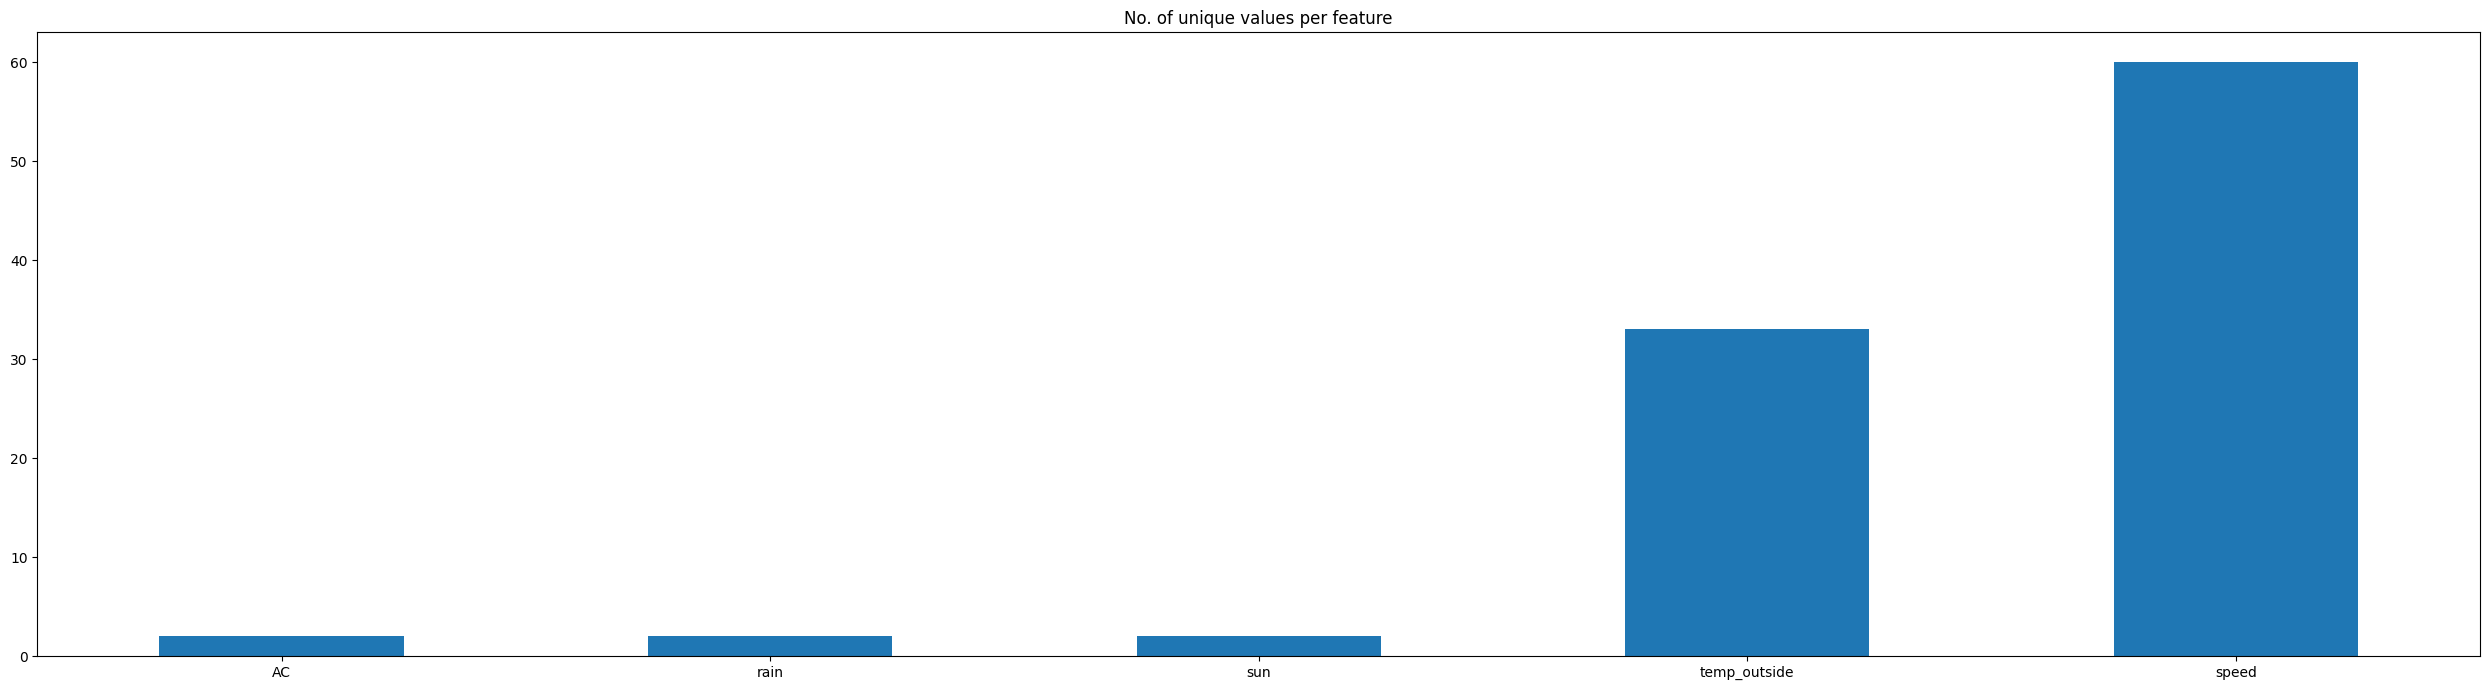

In [6]:
profiler.plotUniques(csv)

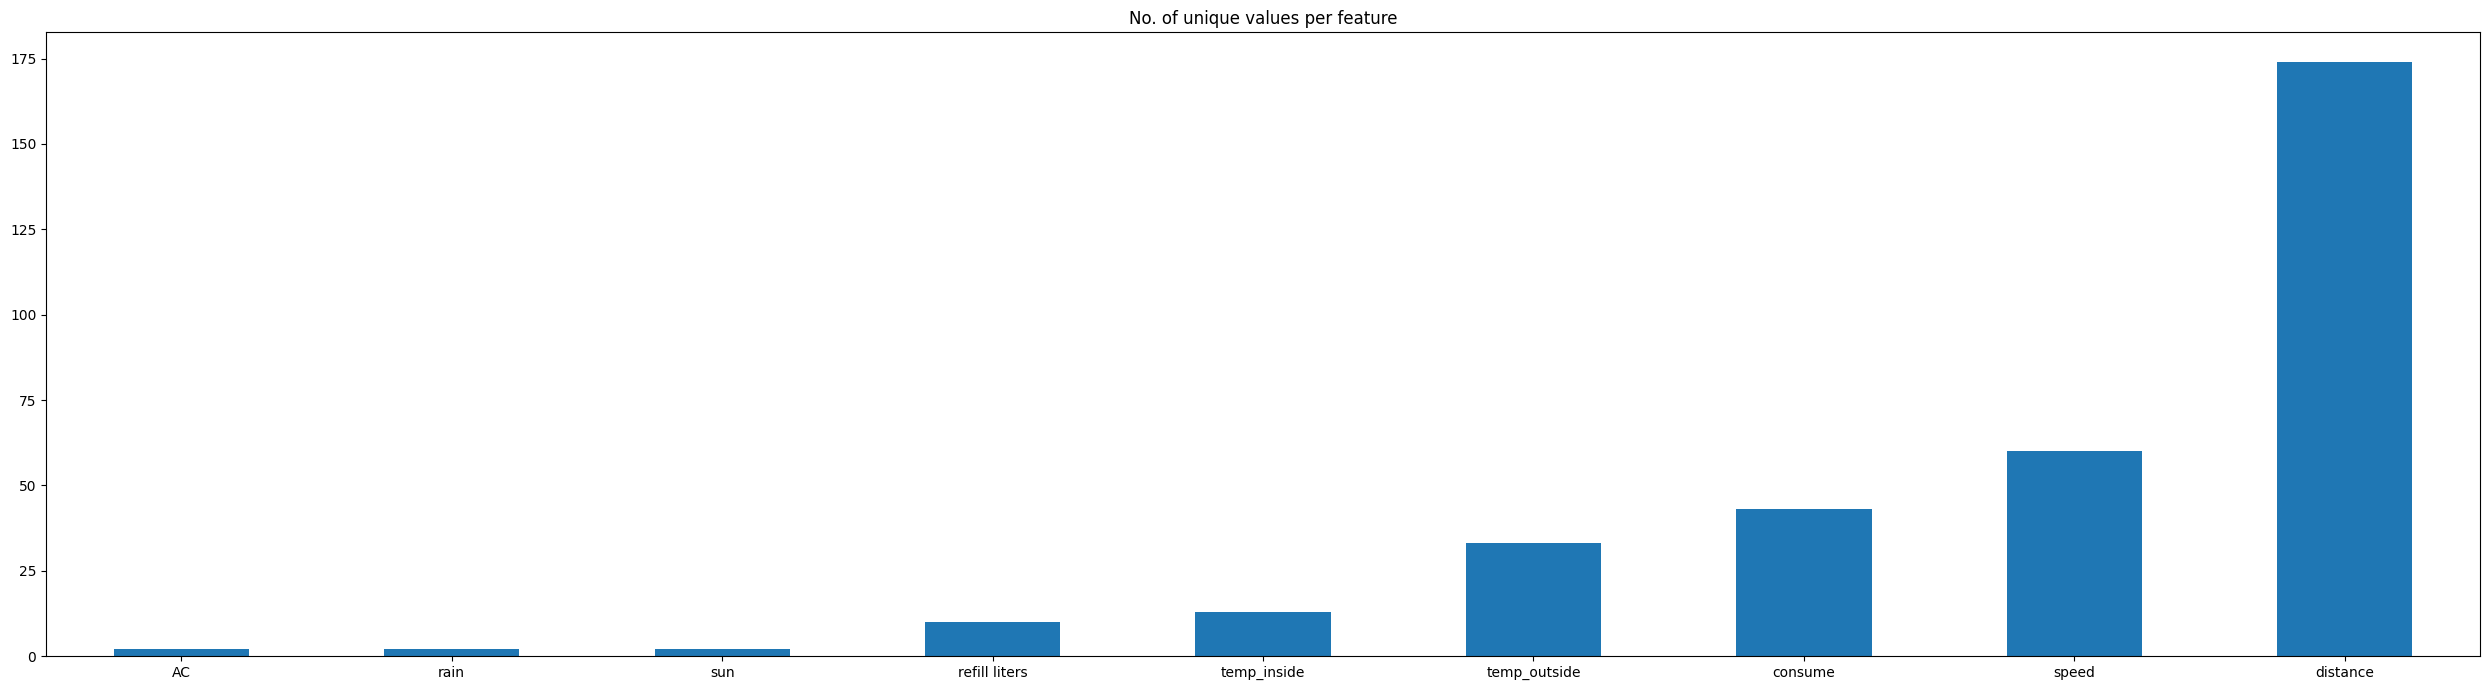

In [7]:
profiler.plotUniques(xls)

Check shape and data types for each dataset

In [8]:
display(csv.shape, csv.dtypes)

(388, 12)

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [9]:
display(xls.shape, xls.dtypes)

(388, 12)

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

Chekc null values for each column for each dataset

VISAULIZE MISSNG VALUES :
-------------------------------------------------------------------------------------------------------------
METHOD 1


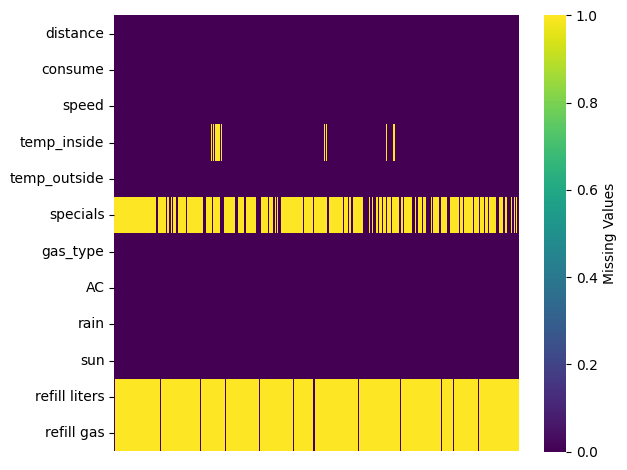



METHOD 2




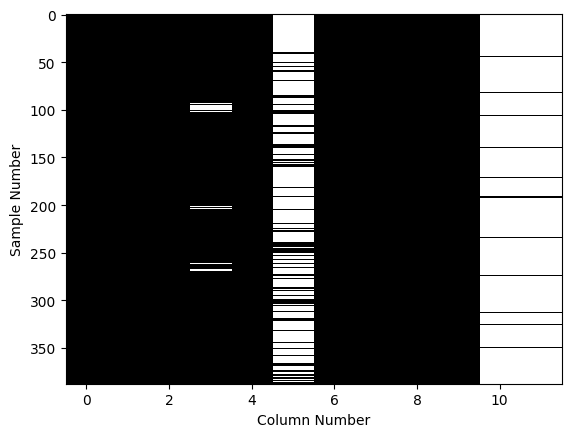

In [10]:
profiler.visualizeNulls(csv)

VISAULIZE MISSNG VALUES :
-------------------------------------------------------------------------------------------------------------
METHOD 1


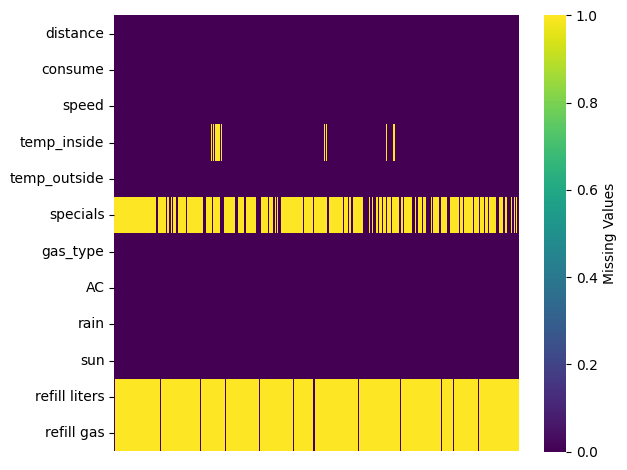



METHOD 2




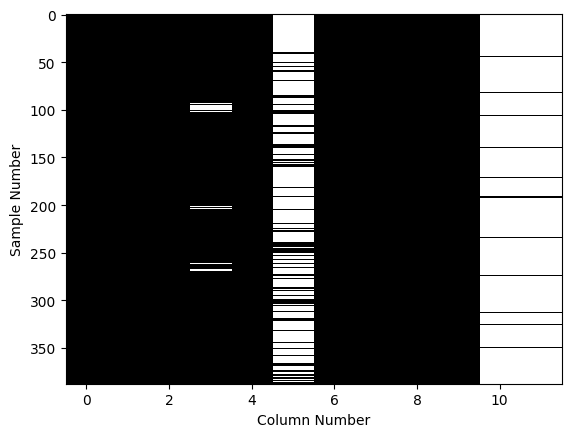

In [11]:
profiler.visualizeNulls(xls)

In [12]:
profiler.nullColumns(csv)


TOTAL MISSING VALUES FOR EACH COLUMN :


MISSING VALUES
distance                    0
consume                     0
speed                       0
temp_inside                12
temp_outside                0
specials                  295
gas_type                    0
AC                          0
rain                        0
sun                         0
refill liters             375
refill gas                375

% null values
distance                0.00
consume                 0.00
speed                   0.00
temp_inside             3.09
temp_outside            0.00
specials               76.03
gas_type                0.00
AC                      0.00
rain                    0.00
sun                     0.00
refill liters          96.65
refill gas             96.65

In [13]:
profiler.nullColumns(xls)


TOTAL MISSING VALUES FOR EACH COLUMN :


MISSING VALUES
distance                    0
consume                     0
speed                       0
temp_inside                12
temp_outside                0
specials                  295
gas_type                    0
AC                          0
rain                        0
sun                         0
refill liters             375
refill gas                375

% null values
distance                0.00
consume                 0.00
speed                   0.00
temp_inside             3.09
temp_outside            0.00
specials               76.03
gas_type                0.00
AC                      0.00
rain                    0.00
sun                     0.00
refill liters          96.65
refill gas             96.65

Both data are the same, but the `xls` file is more effciient since its data types are more coherent. So we will use this from now on.

Let's first handle the missing values

### Data cleaning

In [14]:
liter_values = len(xls) - xls["refill liters"].isnull().sum()
gas_values = len(xls) - xls["refill gas"].isnull().sum()
specials_values = len(xls) - xls["specials"].isnull().sum()

print(f"There are only {liter_values} (non-missing) values for 'refill liters' column out of {len(xls)}")
print(f"There are only {gas_values} (non-missing) values for 'refill gas' column out of {len(xls)}")
print(f"There are only {specials_values} (non-missing) values for 'specials' column out of {len(xls)}")

concerns = ["refill liters", "refill gas", "specials"]

for concern in concerns:
    print()
    print(f"Unique values for {concern}: {(xls[concern].unique())}")

There are only 13 (non-missing) values for 'refill liters' column out of 388
There are only 13 (non-missing) values for 'refill gas' column out of 388
There are only 93 (non-missing) values for 'specials' column out of 388

Unique values for refill liters: [45.   nan 37.6 37.7 38.  38.3 10.  39.  41.  37.  37.2]

Unique values for refill gas: ['E10' nan 'SP98']

Unique values for specials: [nan 'AC rain' 'AC' 'rain' 'snow' 'AC snow' 'half rain half sun' 'sun'
 'AC sun' 'sun ac' 'ac' 'AC Sun' 'ac rain']


There are only 13 non missing values for both `refill liters` and `refill gas` columns out of 388 rows. Since it doesn't really provide any further inofrmation to perfom futher analysis, we will drop them.

We also do not need the `specials` columns since we only have 93 values out of 388. And as seen above, the values aren't uniform nor clear enough for us to be able to use it in our further analysis, so we will also drop it.

In [15]:
data = xls.drop(columns=["specials", "refill liters", "refill gas"])
data.head()

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  sun
0      28.0      5.0     26         21.5            12      E10   0     0    0
1      12.0      4.2     30         21.5            13      E10   0     0    0
2      11.2      5.5     38         21.5            15      E10   0     0    0
3      12.9      3.9     36         21.5            14      E10   0     0    0
4      18.5      4.5     46         21.5            15      E10   0     0    0

Let's check again

VISAULIZE MISSNG VALUES :
-------------------------------------------------------------------------------------------------------------
METHOD 1


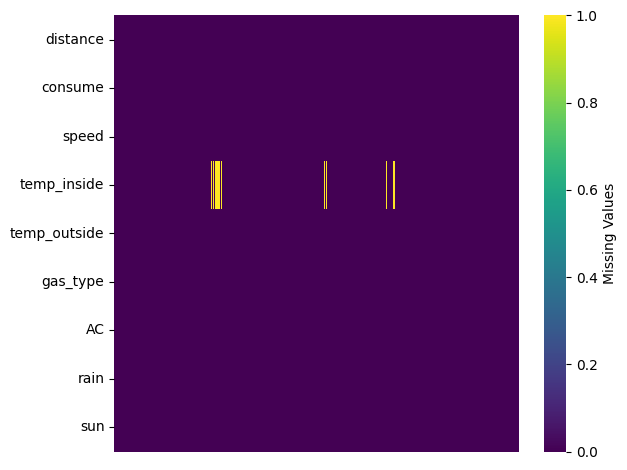



METHOD 2




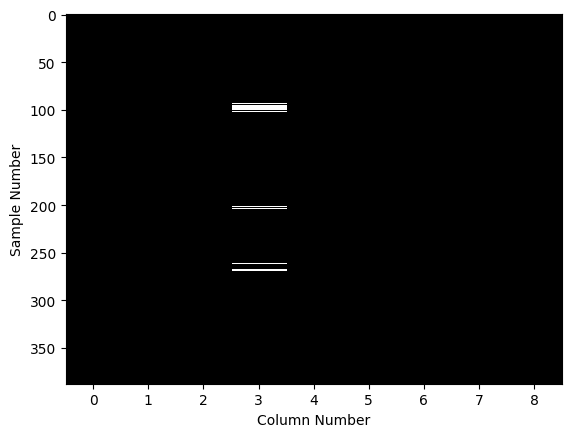

In [16]:
profiler.visualizeNulls(data)

In [17]:
profiler.nullColumns(data)


TOTAL MISSING VALUES FOR EACH COLUMN :


MISSING VALUES
distance                   0
consume                    0
speed                      0
temp_inside               12
temp_outside               0
gas_type                   0
AC                         0
rain                       0
sun                        0

% null values
distance               0.00
consume                0.00
speed                  0.00
temp_inside            3.09
temp_outside           0.00
gas_type               0.00
AC                     0.00
rain                   0.00
sun                    0.00

For the `temp_inside` column, we can either use KNNImputer, mean, median or mode to impute the missing values.

In [18]:
data["temp_inside"].describe().to_frame().T

count       mean       std   min   25%   50%   75%   max
temp_inside  376.0  21.929521  1.010455  19.0  21.5  22.0  22.5  25.5

In [19]:
temp_inside = data["temp_inside"].copy()

print(f"mean: {round(temp_inside.mean(), 2)}")
print(f"median: {round(temp_inside.median(), 2)}")
print(f"mode: {round(temp_inside.mode(), 2)}")

mean: 21.93
median: 22.0
mode: 0    21.5
Name: temp_inside, dtype: float64


Let's check if we have outliers

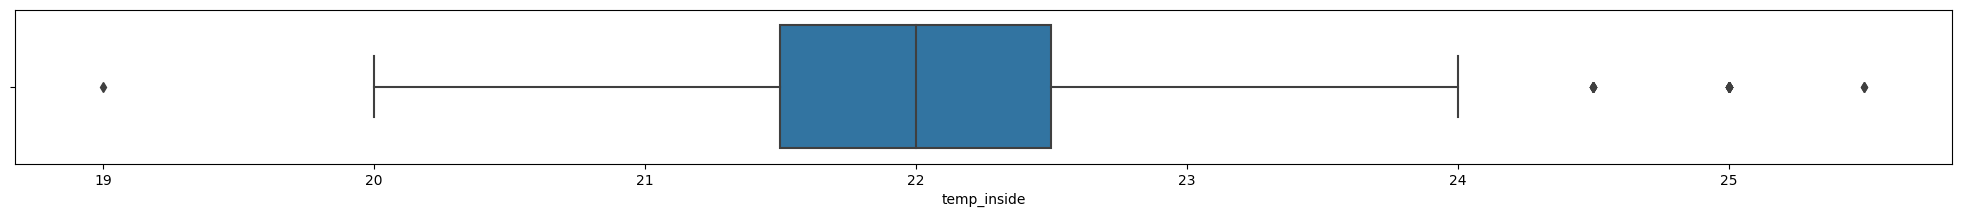

In [20]:
plt.figure(figsize=(25,2))

sns.boxplot(x=data["temp_inside"])

plt.show()

Since we have outliers, we won't be using the mean since it's sensitive to extreme values and might skew the data.

In [21]:
data.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
AC                int64
rain              int64
sun               int64
dtype: object

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
AC                int64
rain              int64
sun               int64
dtype: object


TOTAL MISSING VALUES FOR EACH COLUMN :


MISSING VALUES
distance                   0
consume                    0
speed                      0
temp_inside                0
temp_outside               0
gas_type                   0
AC                         0
rain                       0
sun                        0

% null values
distance                0.0
consume                 0.0
speed                   0.0
temp_inside             0.0
temp_outside            0.0
gas_type                0.0
AC                      0.0
rain                    0.0
sun                     0.0



VISAULIZE MISSNG VALUES :
-------------------------------------------------------------------------------------------------------------
METHOD 1


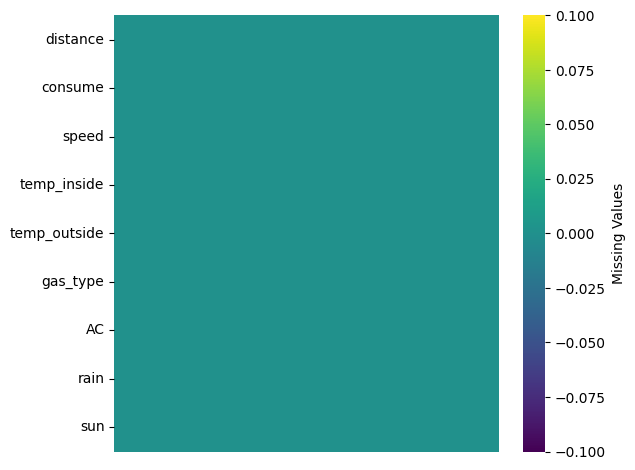



METHOD 2




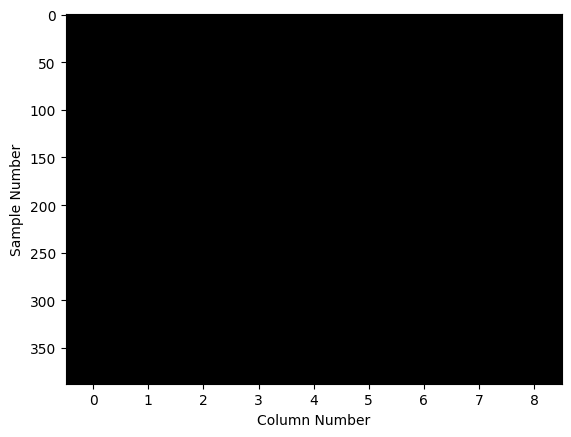

In [22]:
median_temp_inside = data["temp_inside"].median()
data["temp_inside"].fillna(median_temp_inside, inplace=True)


(display(data.dtypes))
profiler.nullColumns(data)
profiler.visualizeNulls(data)

## Export cleaned data

In [23]:
data.to_csv("data.csv", index=False)

## Data augmentation

In [24]:
# Creating new features
# data["driving_efficiency"] = data["distance"] / data["consume"]
data["fuel_used"] = data["distance"] * data["consume"] / 100
data["temp_difference"] = data["temp_inside"] - data["temp_outside"]
data["weather_conditions"] = data["rain"] | data["sun"]
data["AC_and_weather"] = data["AC"] & data["weather_conditions"]

# Checking the first few rows of the data
data.head()

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
0      28.0      5.0     26         21.5            12      E10   0     0   
1      12.0      4.2     30         21.5            13      E10   0     0   
2      11.2      5.5     38         21.5            15      E10   0     0   
3      12.9      3.9     36         21.5            14      E10   0     0   
4      18.5      4.5     46         21.5            15      E10   0     0   

   sun  fuel_used  temp_difference  weather_conditions  AC_and_weather  
0    0     1.4000              9.5                   0               0  
1    0     0.5040              8.5                   0               0  
2    0     0.6160              6.5                   0               0  
3    0     0.5031              7.5                   0               0  
4    0     0.8325              6.5                   0               0

In the process of analyzing the fuel consumption data, we have created some new features that might be helpful for further analysis. Here is a detailed explanation of these new features:

1. **Temperature Difference:** This feature is the difference between the inside and outside temperatures (`temp_inside - temp_outside`). The use of heating or air conditioning to maintain the inside temperature could affect fuel consumption. A larger temperature difference might indicate more energy used for heating or air conditioning.

2. **Weather Conditions:** This is a binary feature that indicates whether there were any weather conditions (rain or sun) during the trip. It is calculated as `rain | sun` (using the bitwise OR operator). A value of 1 means there were weather conditions (either rain or sun), and a value of 0 means there were no specific weather conditions.

3. **AC and Weather:** This is a binary feature that indicates whether the air conditioning was on and there were weather conditions. It is calculated as `AC & (rain | sun)` (using the bitwise AND and OR operators). A value of 1 means the air conditioning was on and there were weather conditions, and a value of 0 means either the air conditioning was off or there were no specific weather conditions.

These new features provide additional information that could be useful for understanding the factors that affect fuel consumption.

In [25]:
data.describe()

distance     consume       speed  temp_inside  temp_outside  \
count  388.000000  388.000000  388.000000   388.000000    388.000000   
mean    19.652835    4.912371   41.927835    21.931701     11.358247   
std     22.667837    1.033172   13.598524     0.994741      6.991542   
min      1.300000    3.300000   14.000000    19.000000     -5.000000   
25%     11.800000    4.300000   32.750000    21.500000      7.000000   
50%     14.600000    4.700000   40.500000    22.000000     10.000000   
75%     19.000000    5.300000   50.000000    22.500000     16.000000   
max    216.100000   12.200000   90.000000    25.500000     31.000000   

               AC        rain         sun   fuel_used  temp_difference  \
count  388.000000  388.000000  388.000000  388.000000       388.000000   
mean     0.077320    0.123711    0.082474    0.935294        10.573454   
std      0.267443    0.329677    0.275441    1.115967         6.698404   
min      0.000000    0.000000    0.000000    0.120000        -8.000000   
25%      0.000000    0.000000    0.000000    0.551650         6.375000   
50%      0.000000    0.000000    0.000000    0.680600        11.500000   
75%      0.000000    0.000000    0.000000    0.916500        14.625000   
max      1.000000    1.000000    1.000000   11.453300        26.000000   

       weather_conditions  AC_and_weather  
count          388.000000      388.000000  
mean             0.206186        0.043814  
std              0.405088        0.204946  
min              0.000000        0.000000  
25%              0.000000        0.000000  
50%              0.000000        0.000000  
75%              0.000000        0.000000  
max              1.000000        1.000000

In [26]:
data.describe(include="object")

gas_type
count       388
unique        2
top        SP98
freq        228

In [27]:
profiler.uniqueColumns(data)

UNIQUE VALUES FOR EACH COLUMN :
-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'distance' : 174 including NaN values, 174 excluding Nan values

[ 28.   12.   11.2  12.9  18.5   8.3   7.8  12.3   4.9  11.9  12.4  11.8
  24.7  17.3  33.4  25.9  25.3  14.2  17.9  18.4  18.3  32.6  19.   12.1
  20.    4.5  11.7  10.2   5.4   2.   16.   27.3  10.6  11.6  13.1   6.1
 153.5   2.9   2.1   9.8   6.8  14.   13.9   9.7  24.8  34.8   5.2  10.5
  13.2  13.   12.2  12.5  15.7   6.4   5.3  26.2  18.8  22.9 162.7  16.6
  15.9   5.1  22.4  31.1  16.1   4.2  17.4  23.5   7.   20.1  20.8   1.7
  35.9  36.9  16.8   9.9  36.6  44.9  21.6  39.4  26.6  53.2  18.9  43.5
  16.4  21.1  22.7  44.4  35.8  40.6  14.1  58.7  16.2  31.8  51.6  38.6
  81.2 130.3  67.2  43.7  56.1  39.   38.5  28.2  19.6  22.2  13.6  12.6
   8.7   7.9   2.4  18.1   1.3  13.4  12.8  29.   31.4  27.1  25.2  14.3
  16.9   9.2  31.5  24.9  17.    7.4  

## Visualization

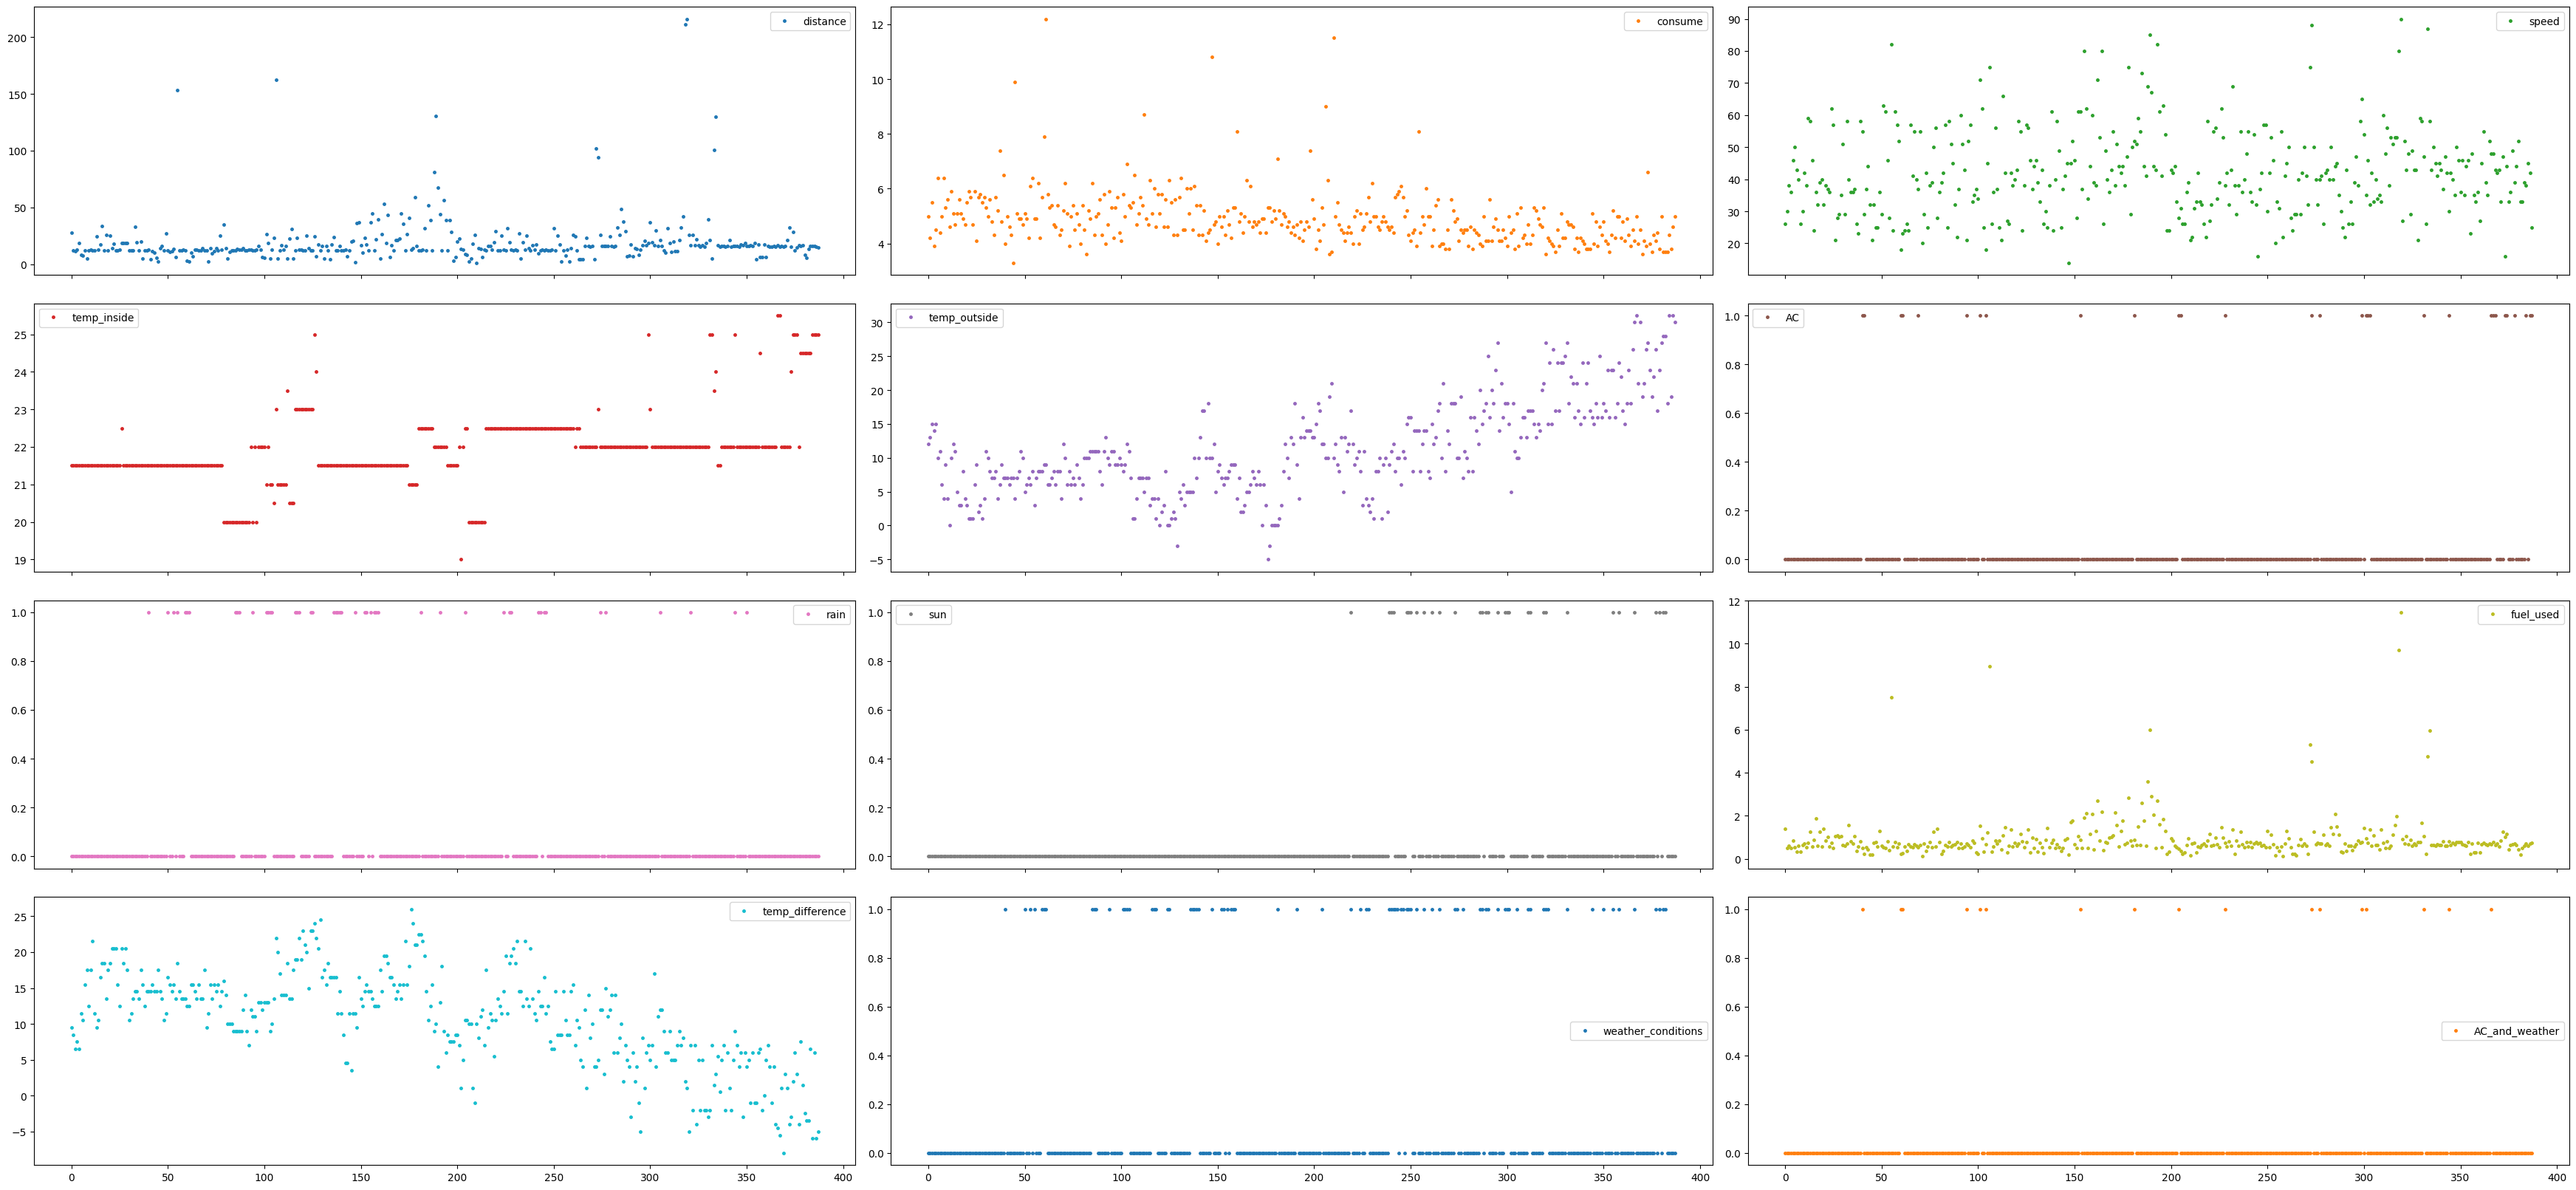

In [28]:
data.plot(lw=0, marker=".", layout=(5,3), subplots=True, markersize=5, figsize=(35, 20))
plt.tight_layout()
plt.show()

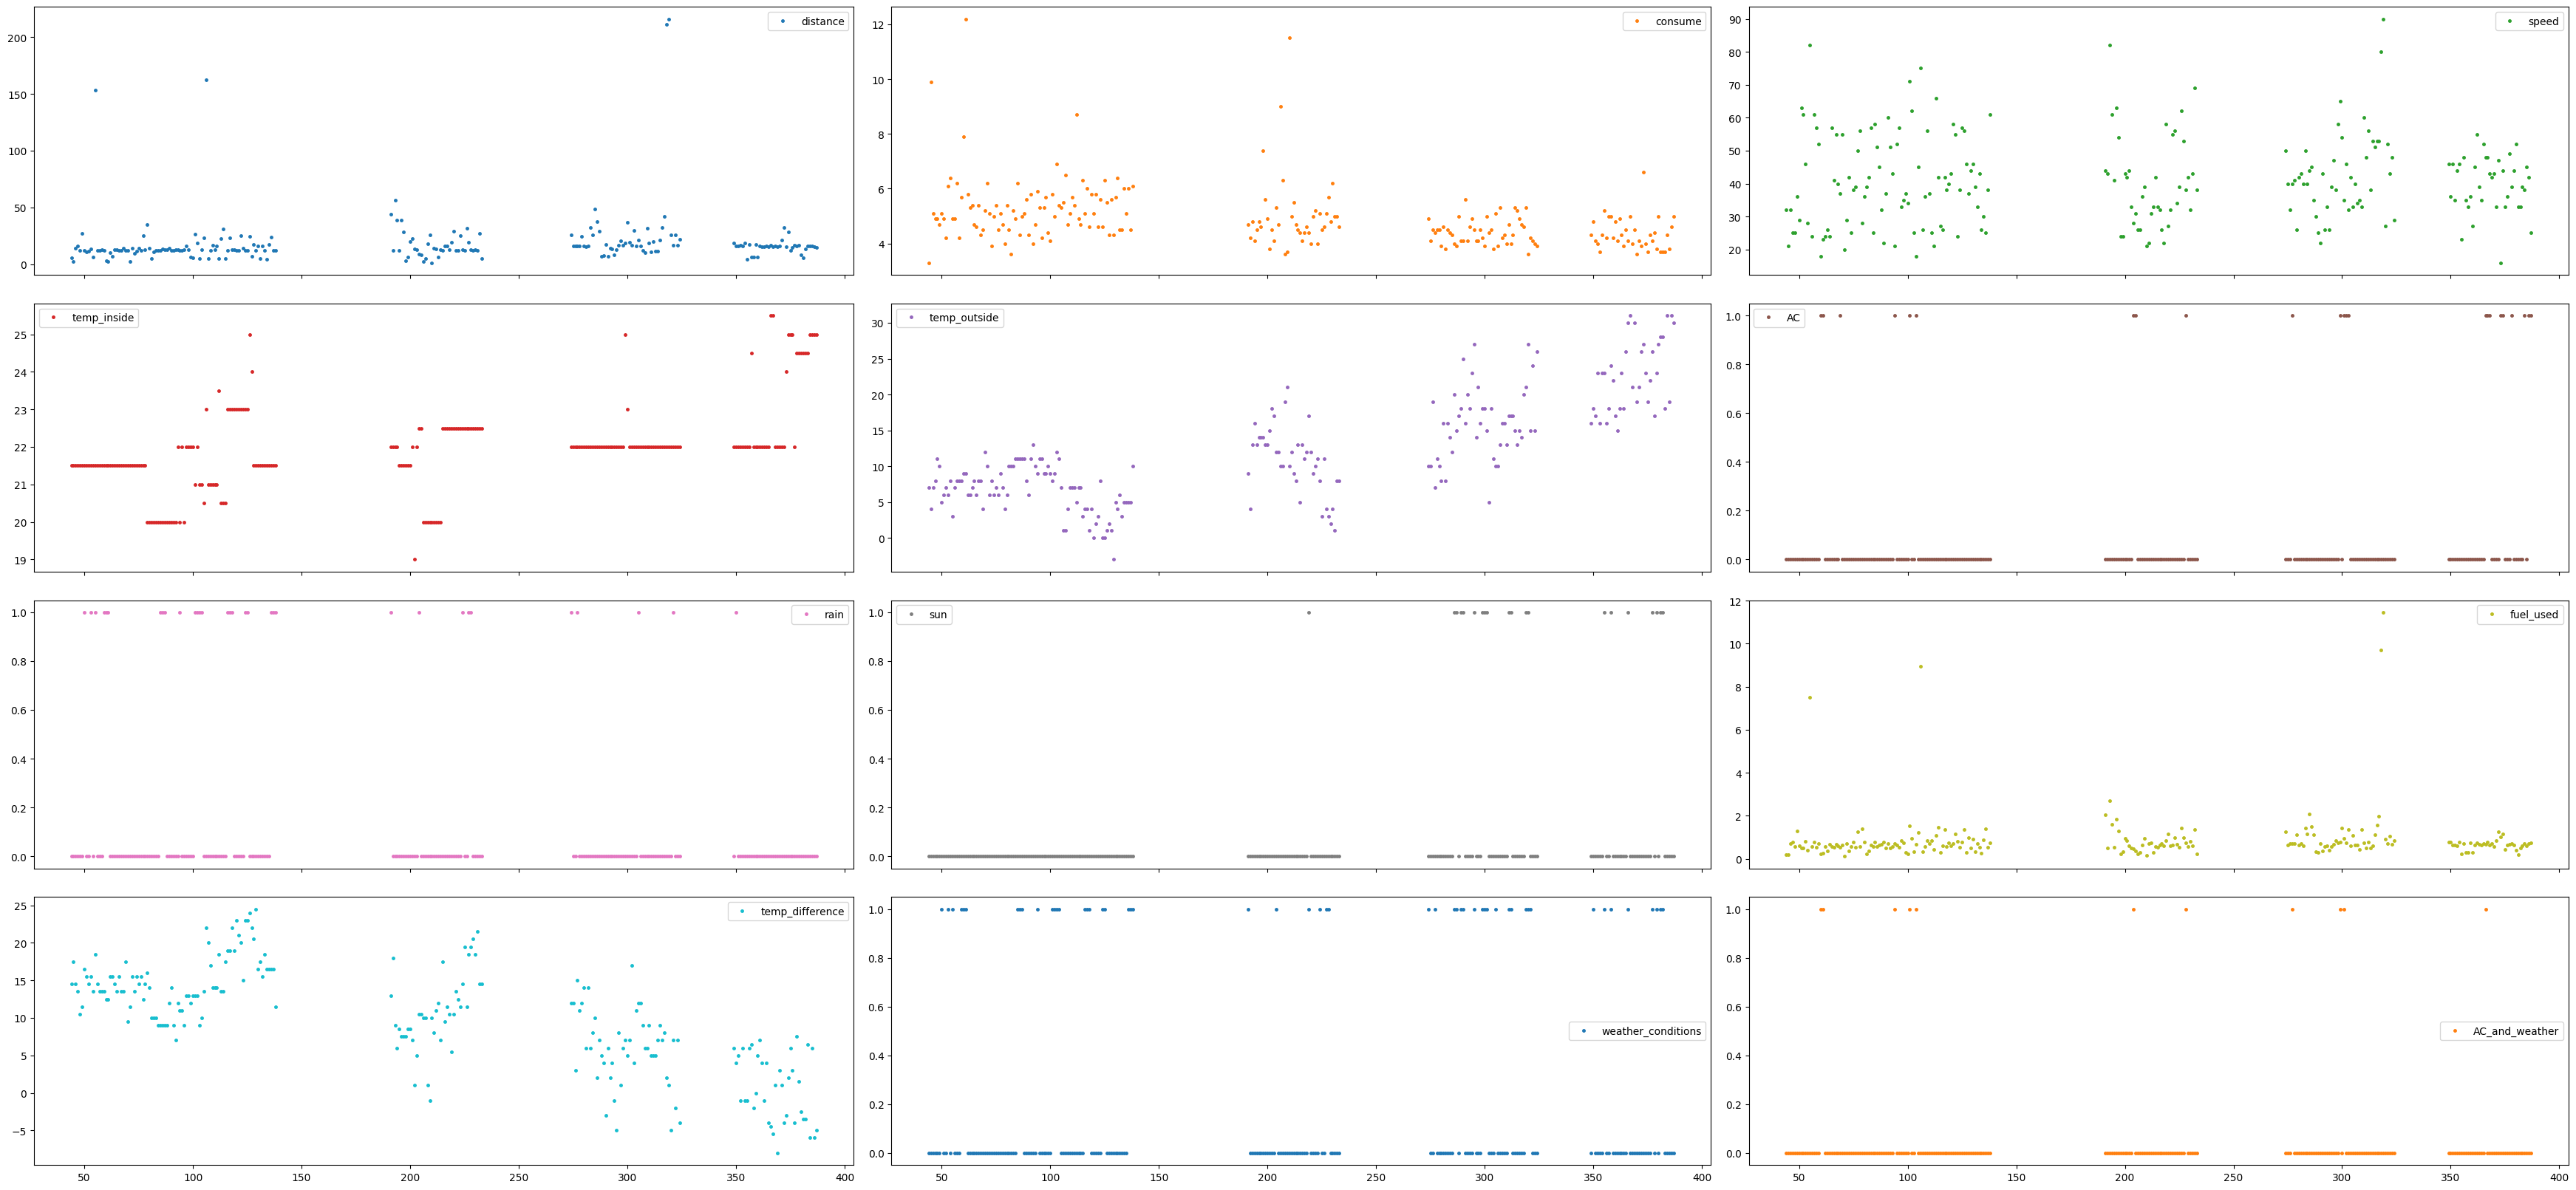

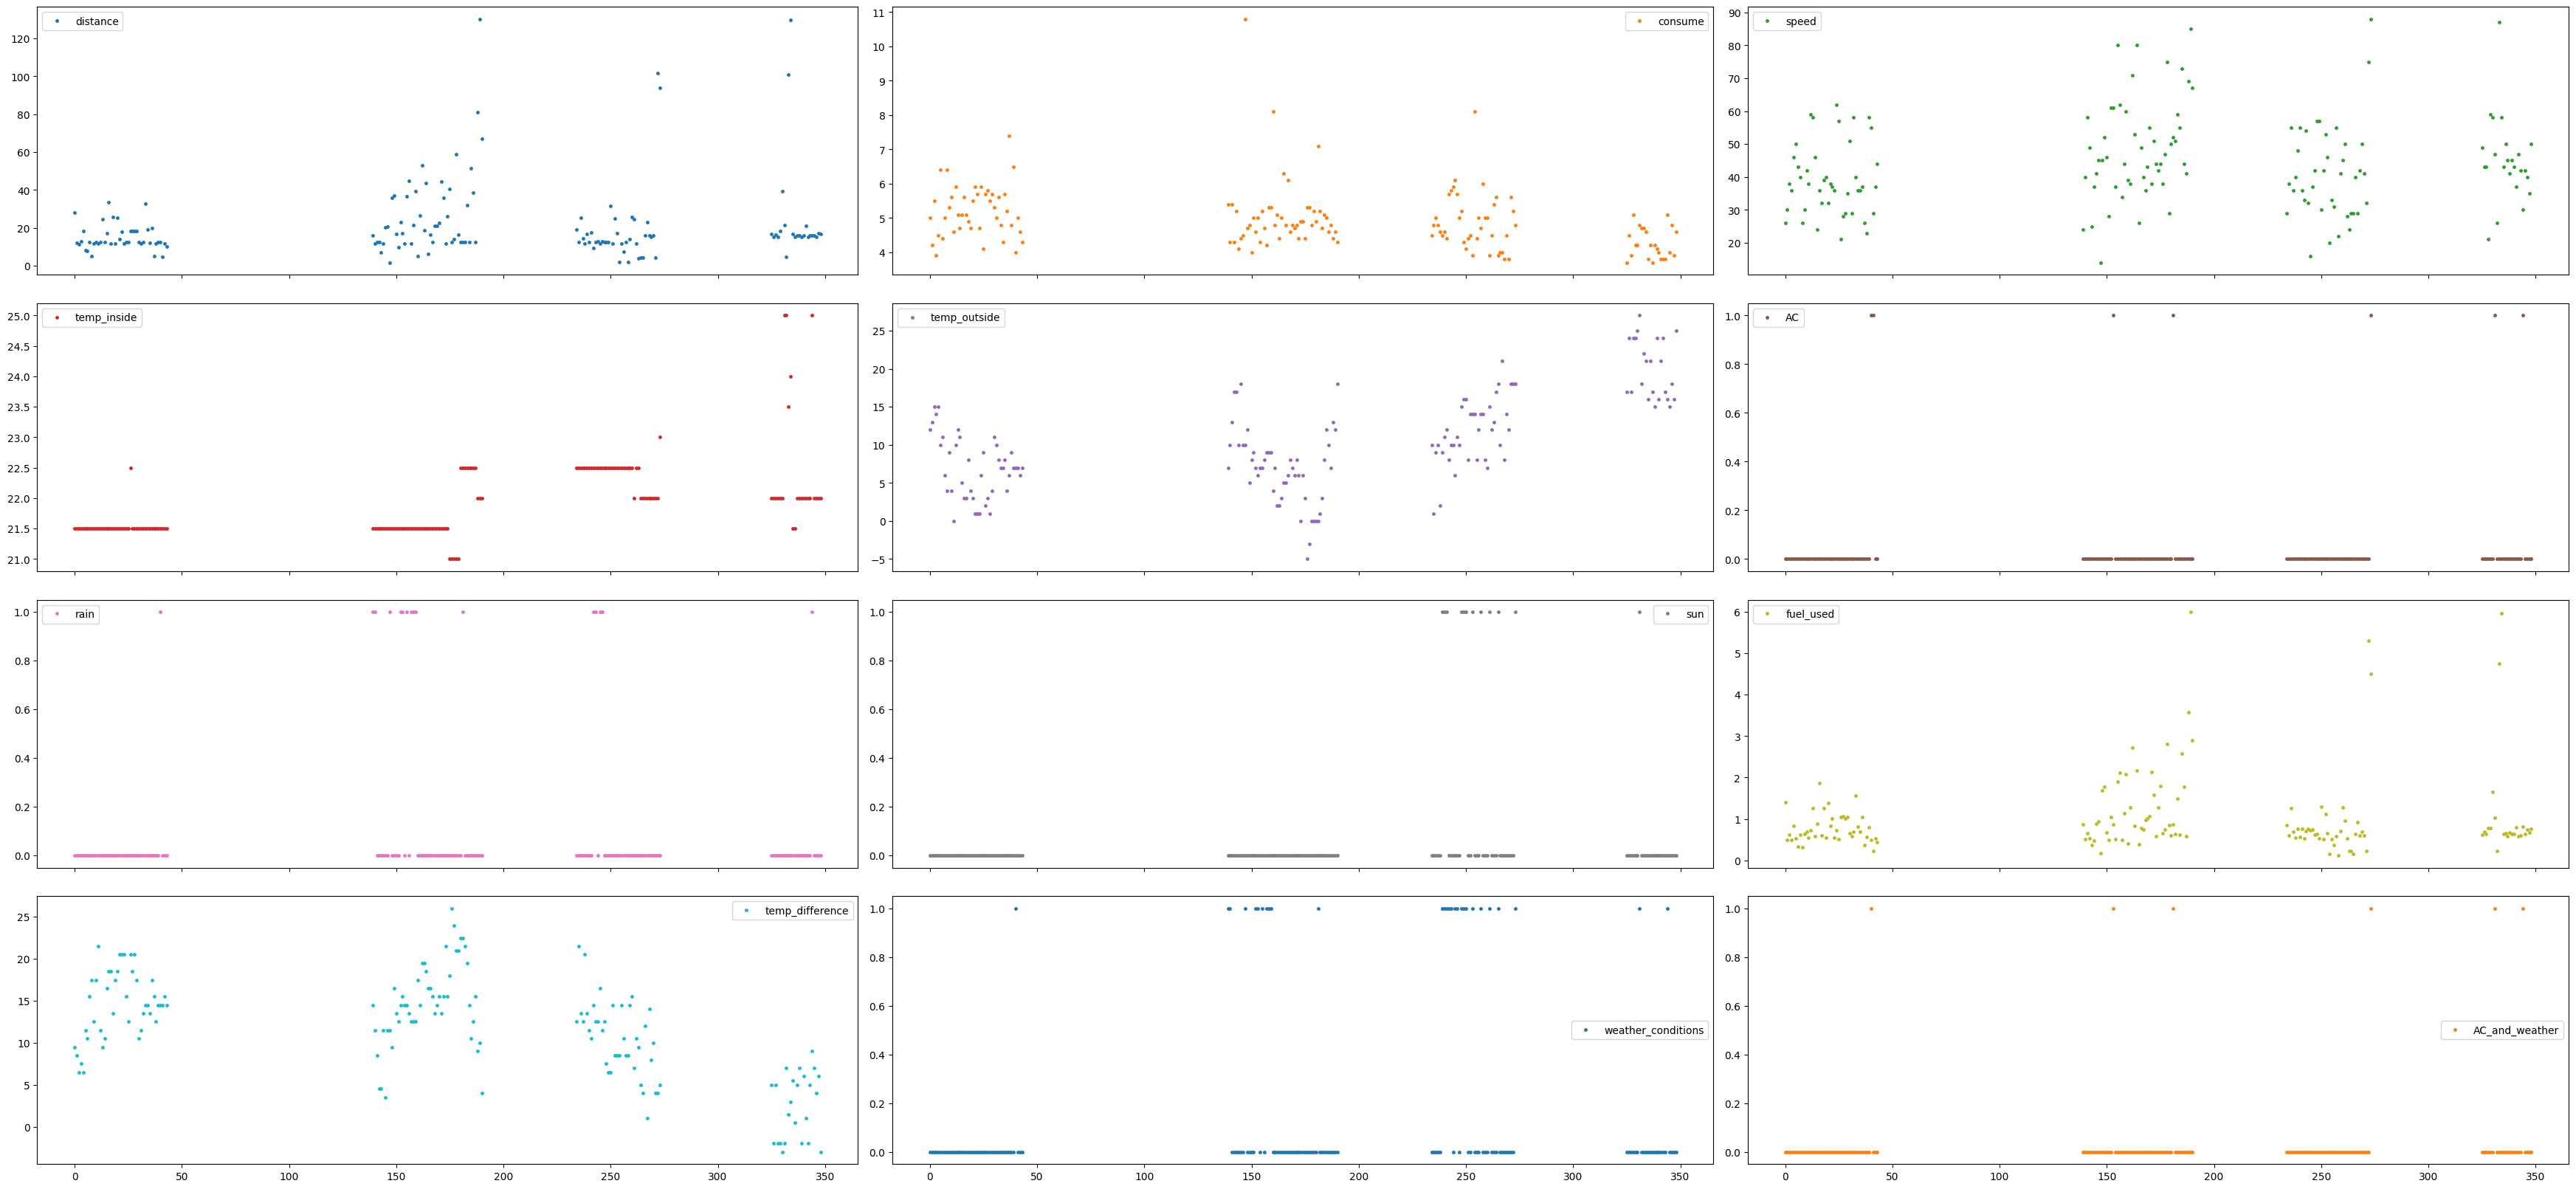

In [29]:
# Filter the data
data_SP98 = data[data['gas_type'] == 'SP98']
data_E10 = data[data['gas_type'] == 'E10']

data_SP98.plot(lw=0, marker=".", layout=(5,3), subplots=True, markersize=5, figsize=(35, 20))
plt.tight_layout()
plt.show()

data_E10.plot(lw=0, marker=".", layout=(5,3), subplots=True, markersize=5, figsize=(35, 20))
plt.tight_layout()
plt.show()

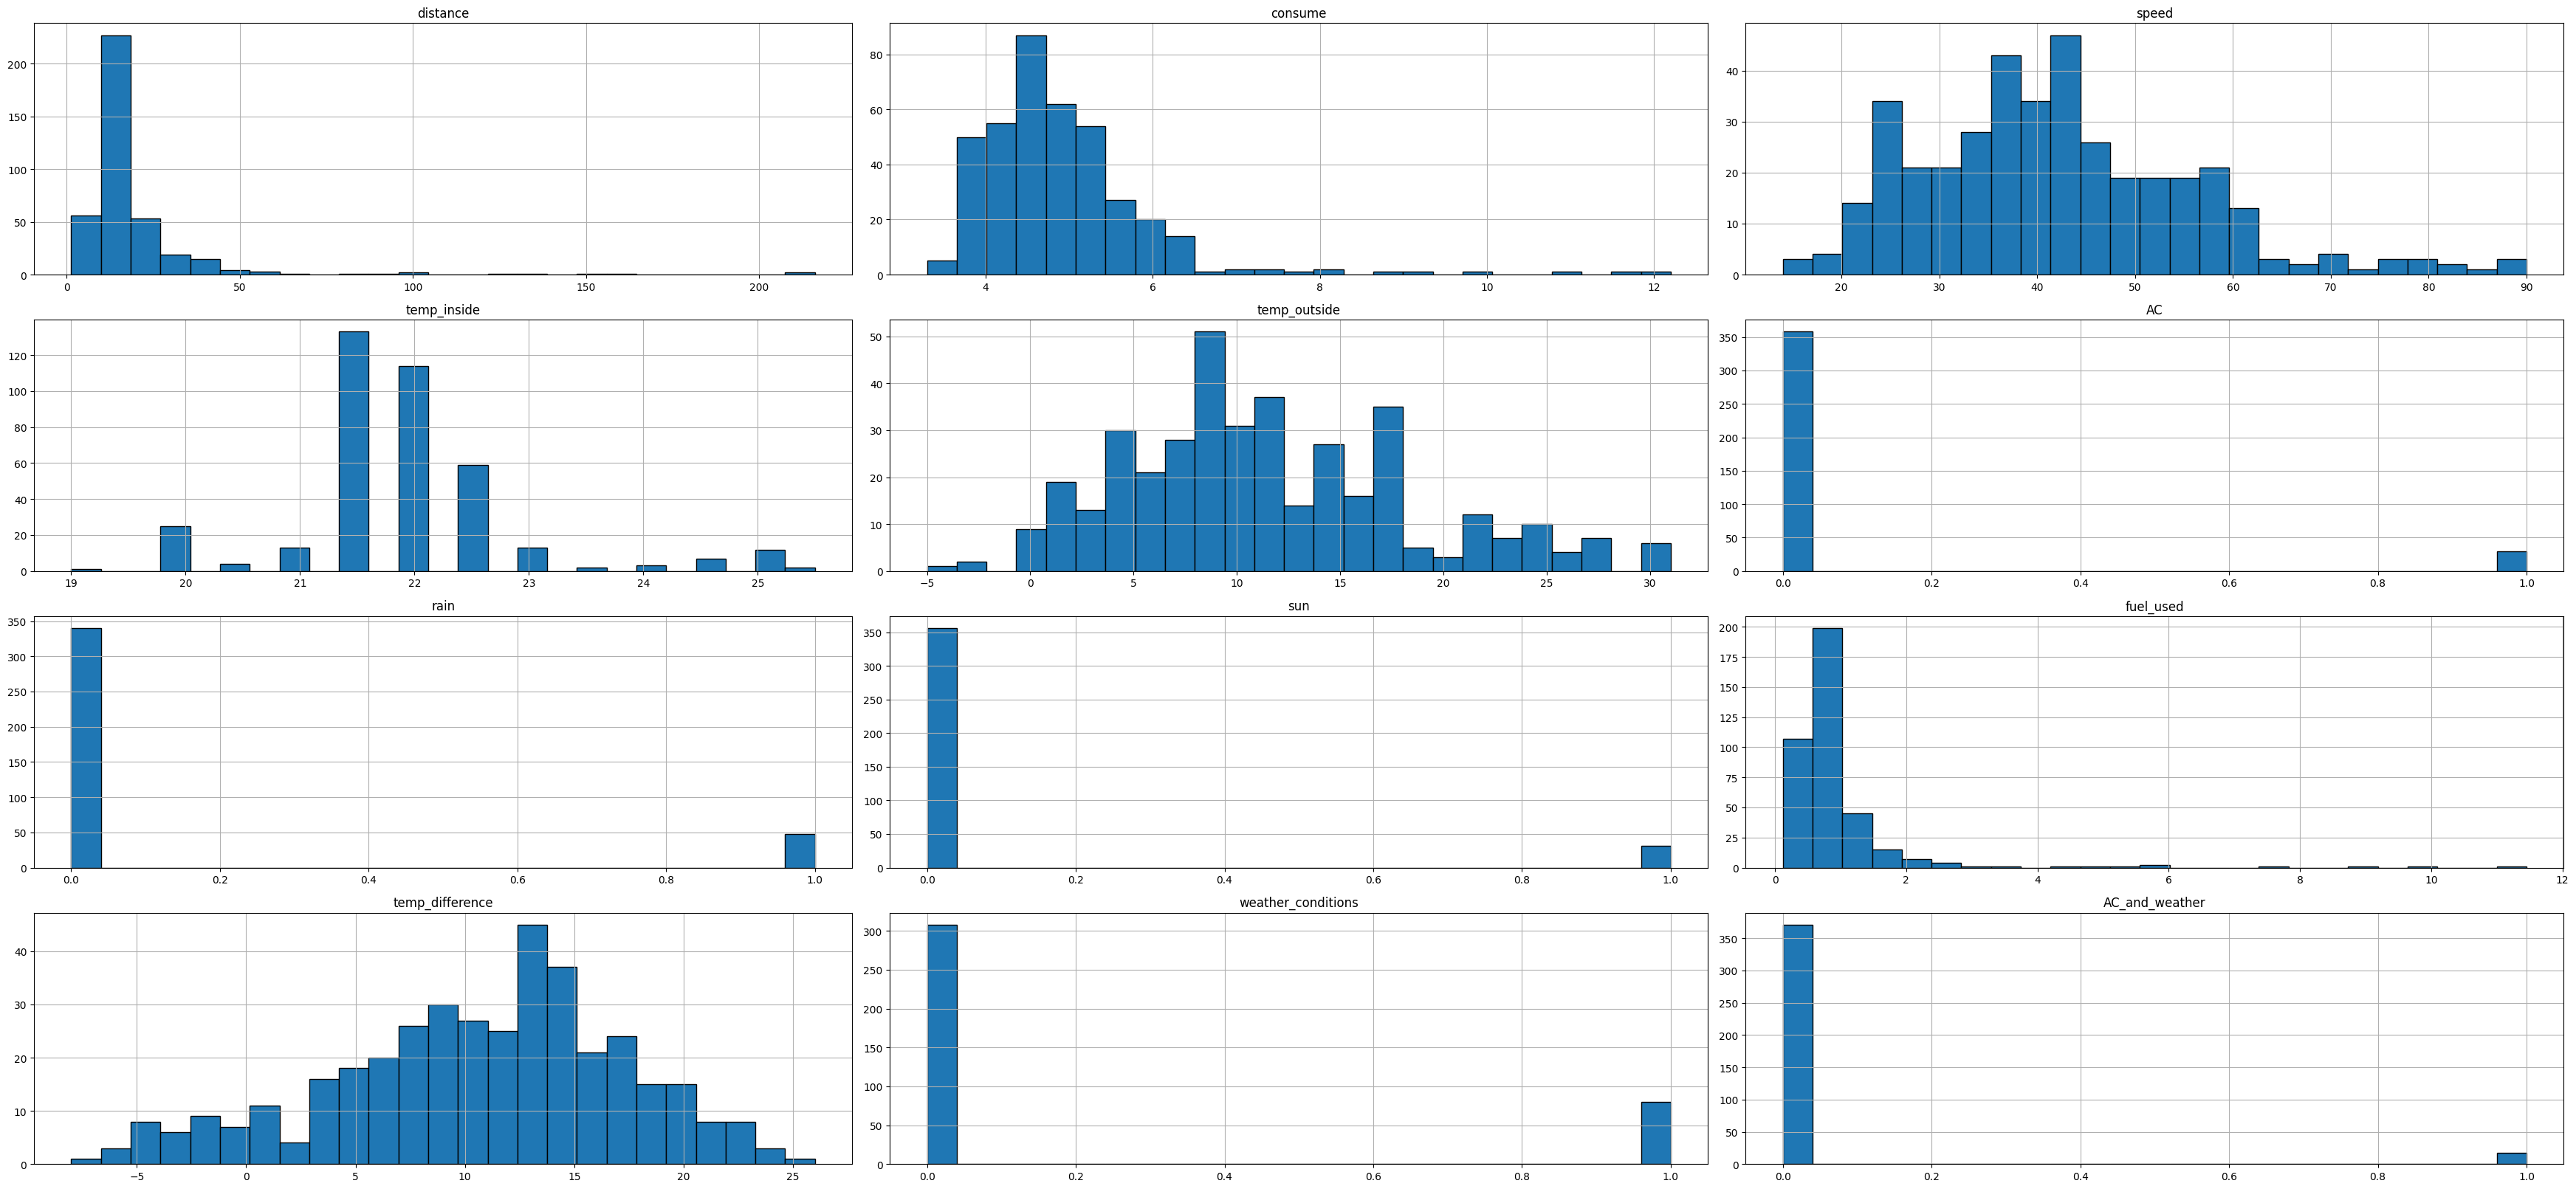

In [30]:
data.hist(bins=25, layout=(5, 3), edgecolor="black", figsize=(35, 20))
plt.tight_layout()
plt.show()

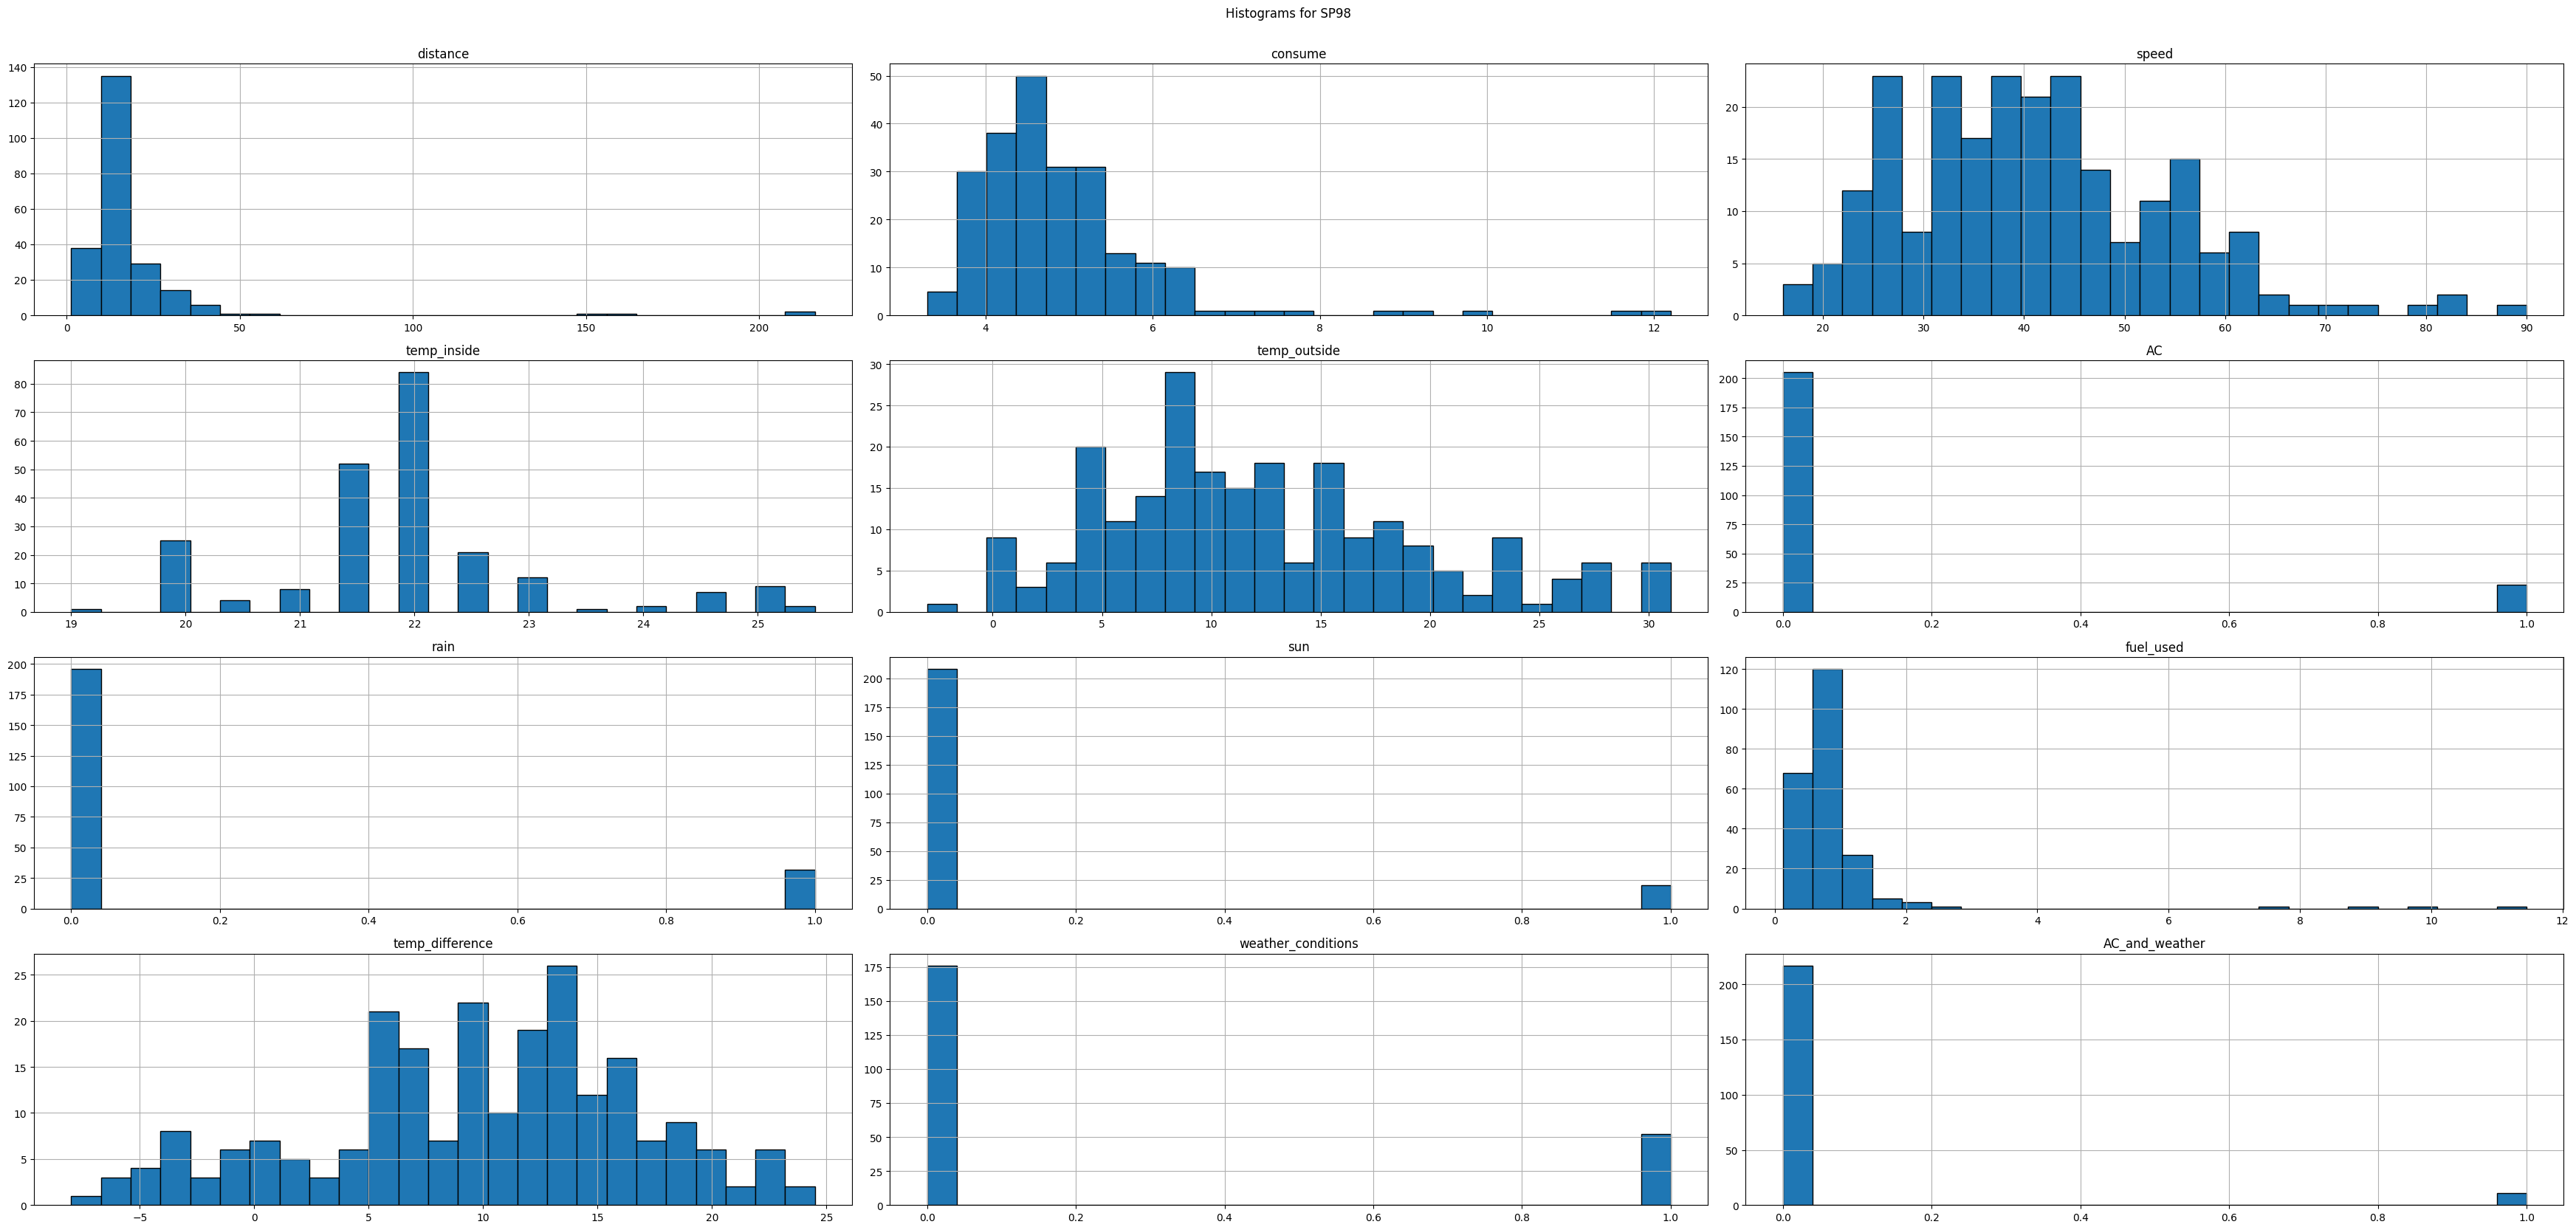

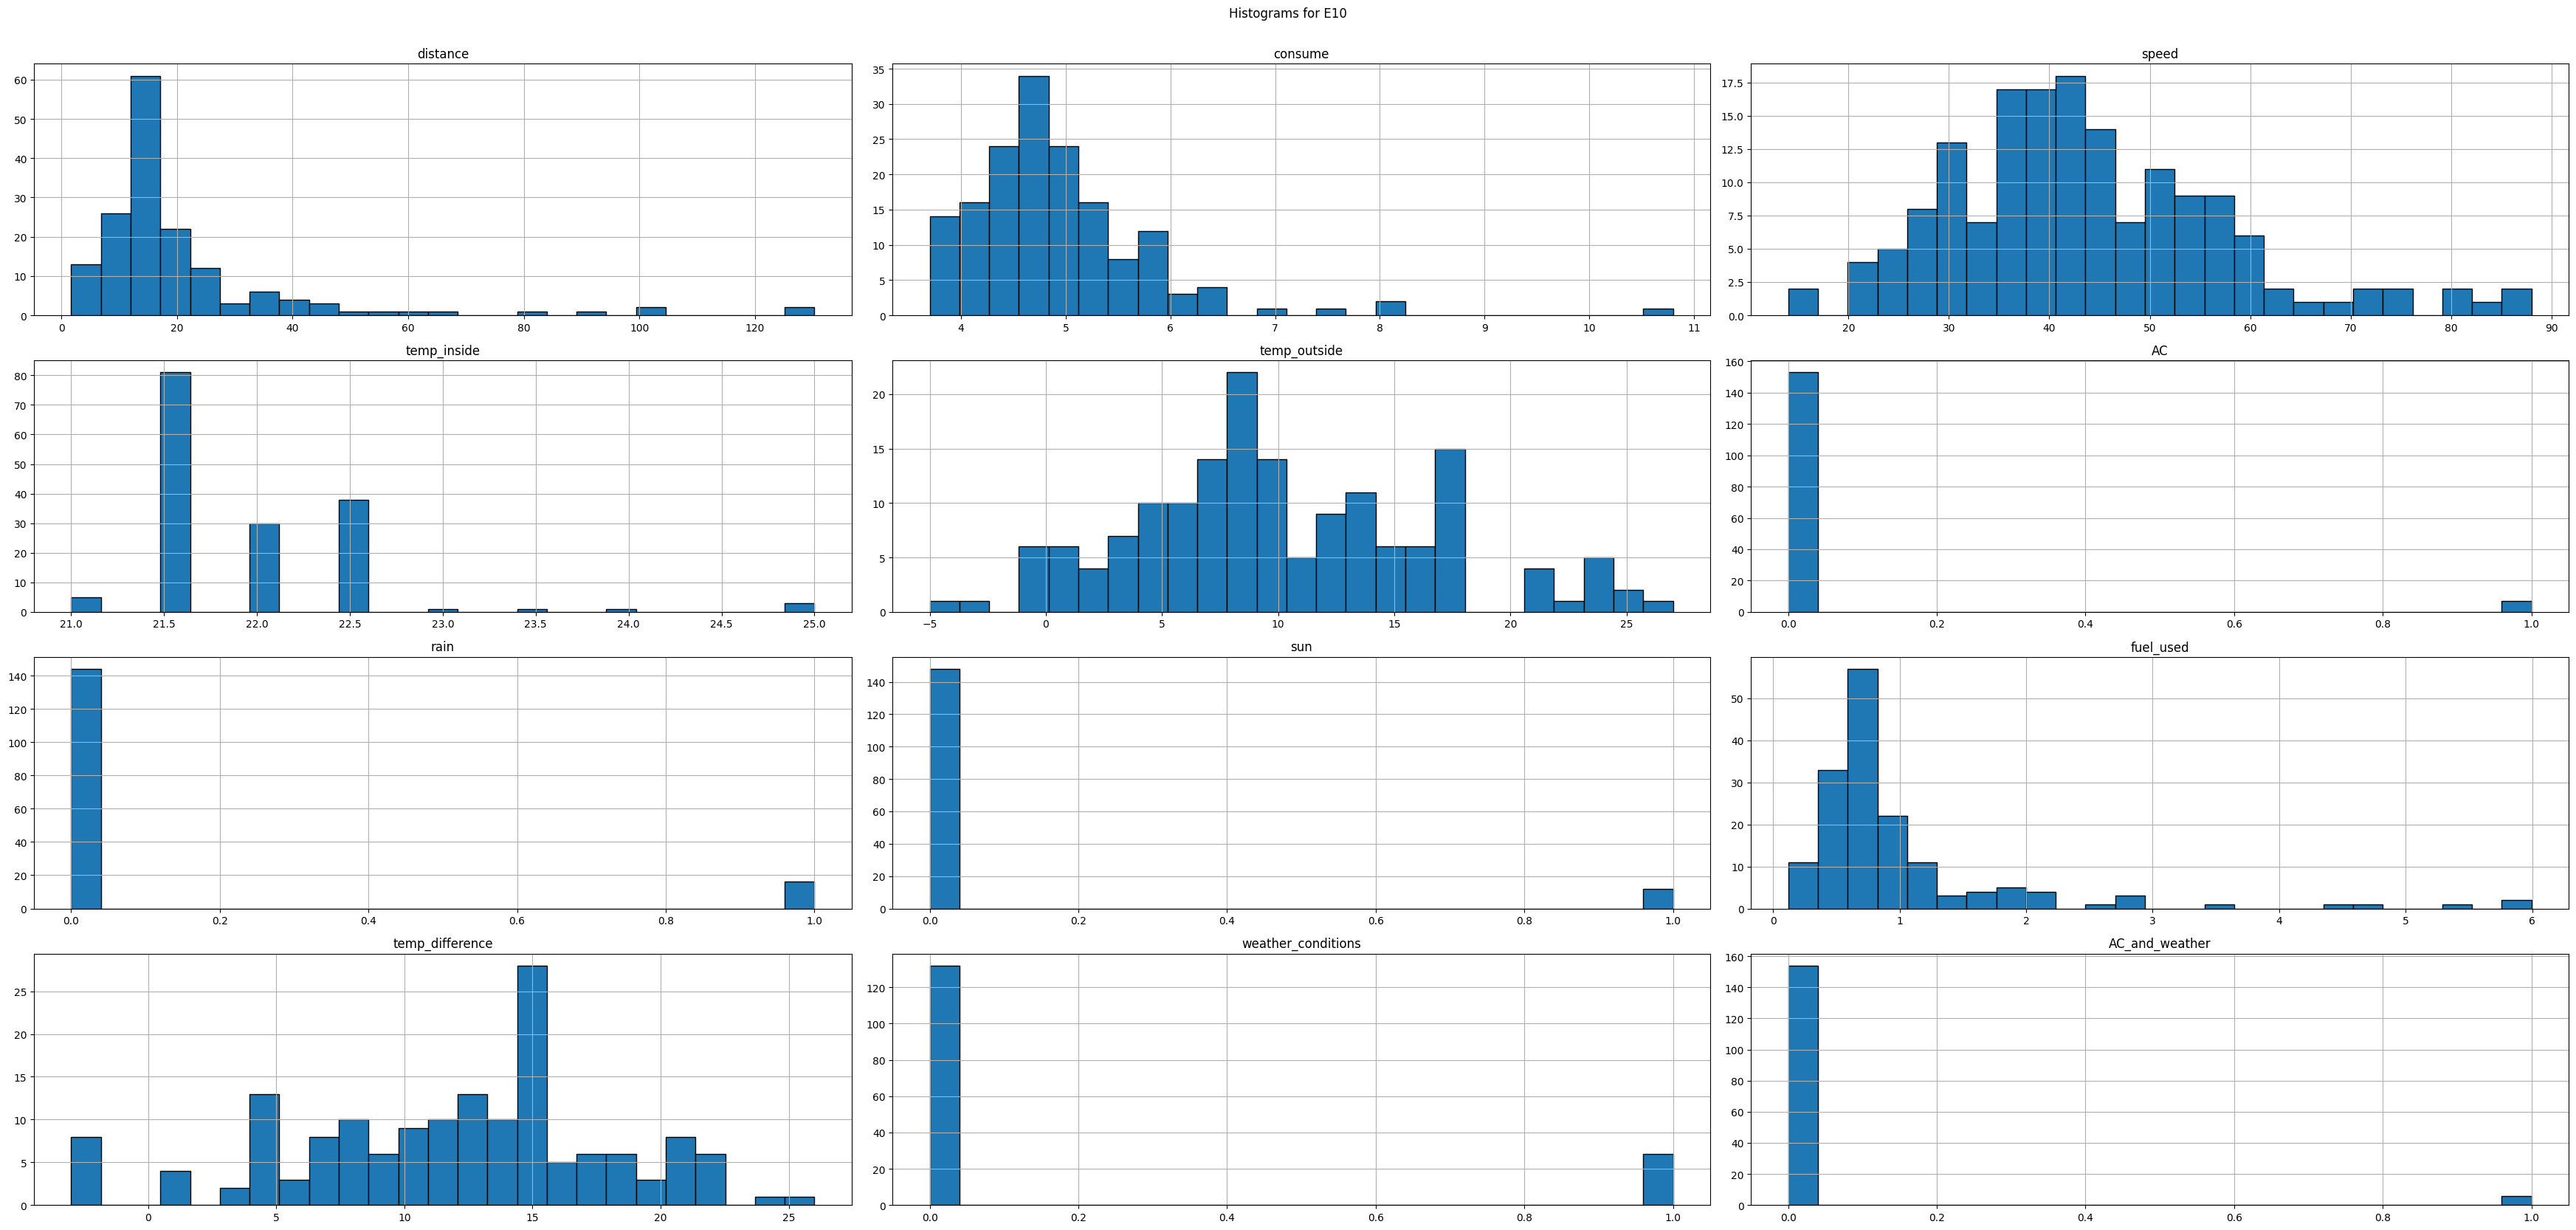

In [31]:
import matplotlib.pyplot as plt

# Filter the data
data_SP98 = data[data['gas_type'] == 'SP98']
data_E10 = data[data['gas_type'] == 'E10']

# Generate histograms for SP98
data_SP98.hist(bins=25, layout=(5, 3), edgecolor="black", figsize=(35, 20))
plt.tight_layout()
plt.suptitle('Histograms for SP98', y=1.02)
plt.show()

# Generate histograms for E10
data_E10.hist(bins=25, layout=(5, 3), edgecolor="black", figsize=(35, 20))
plt.tight_layout()
plt.suptitle('Histograms for E10', y=1.02)
plt.show()


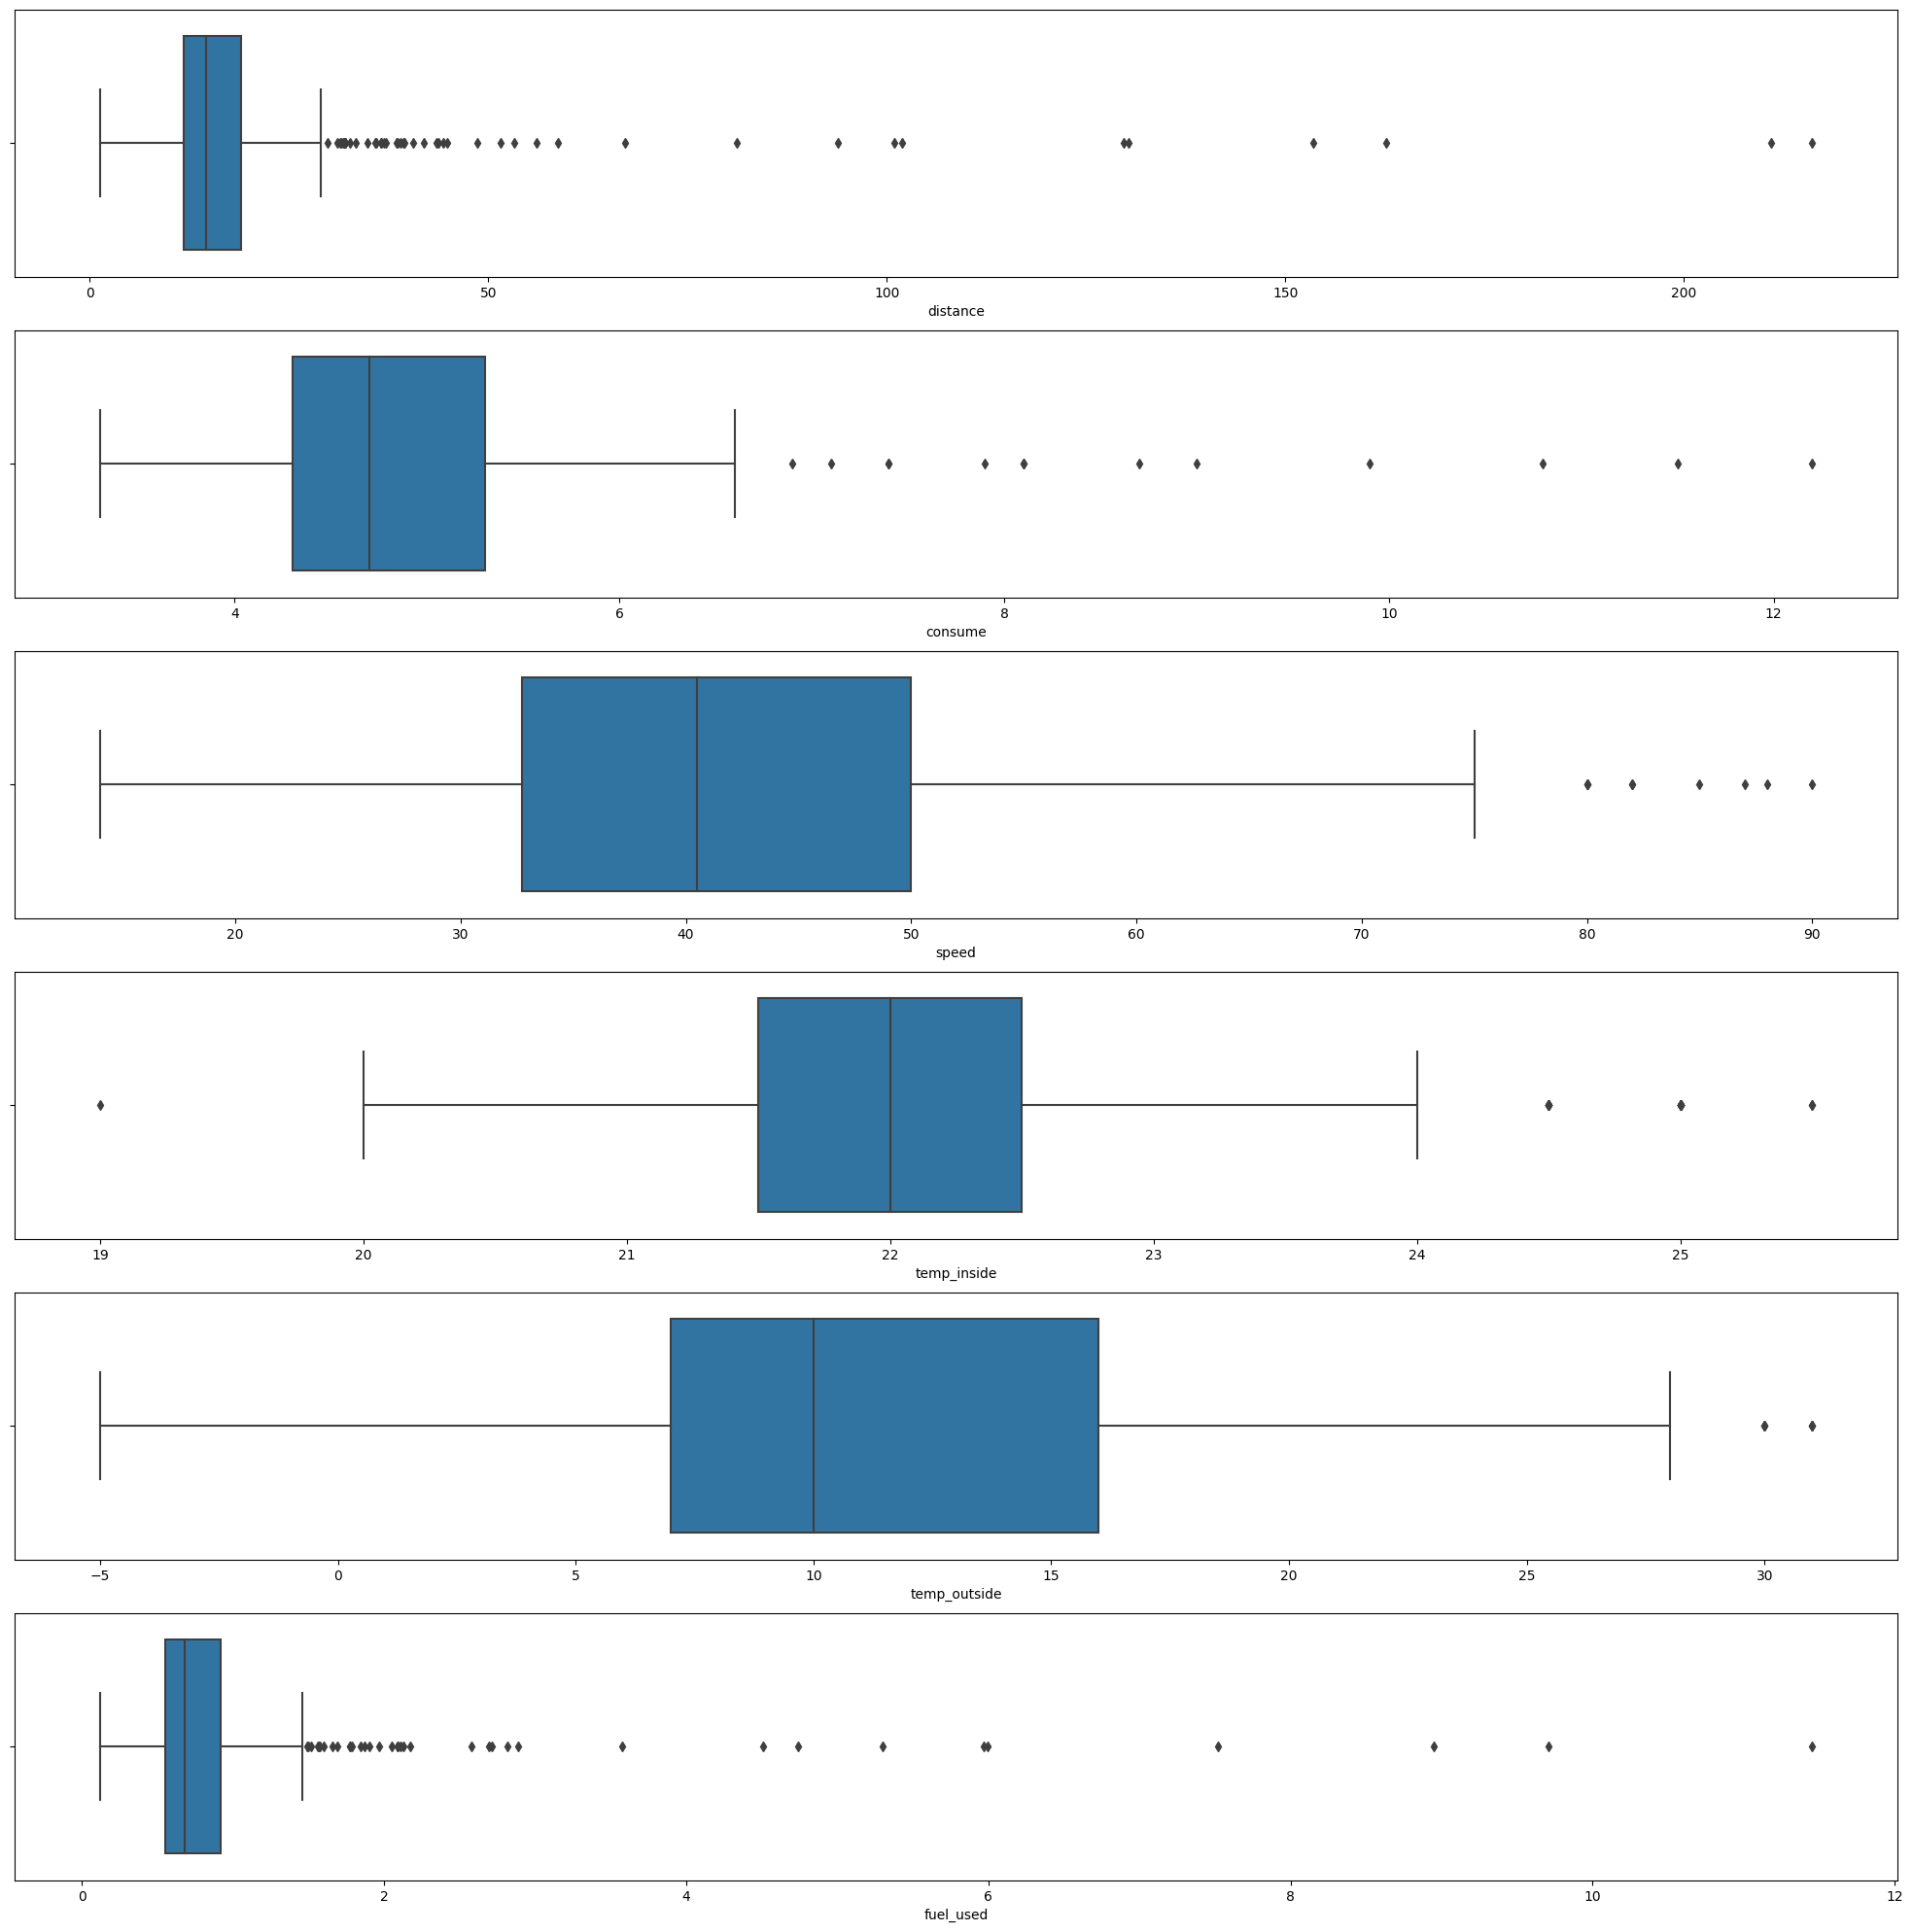

In [32]:
fig, axs = plt.subplots(6, figsize=(25,25))
sns.boxplot(x=data["distance"], ax=axs[0])
sns.boxplot(x=data["consume"], ax=axs[1])
sns.boxplot(x=data["speed"], ax=axs[2])
sns.boxplot(x=data["temp_inside"], ax=axs[3])
sns.boxplot(x=data["temp_outside"], ax=axs[4])
# sns.boxplot(x=data["driving_efficiency"], ax=axs[5])
sns.boxplot(x=data["fuel_used"], ax=axs[5])
plt.show()

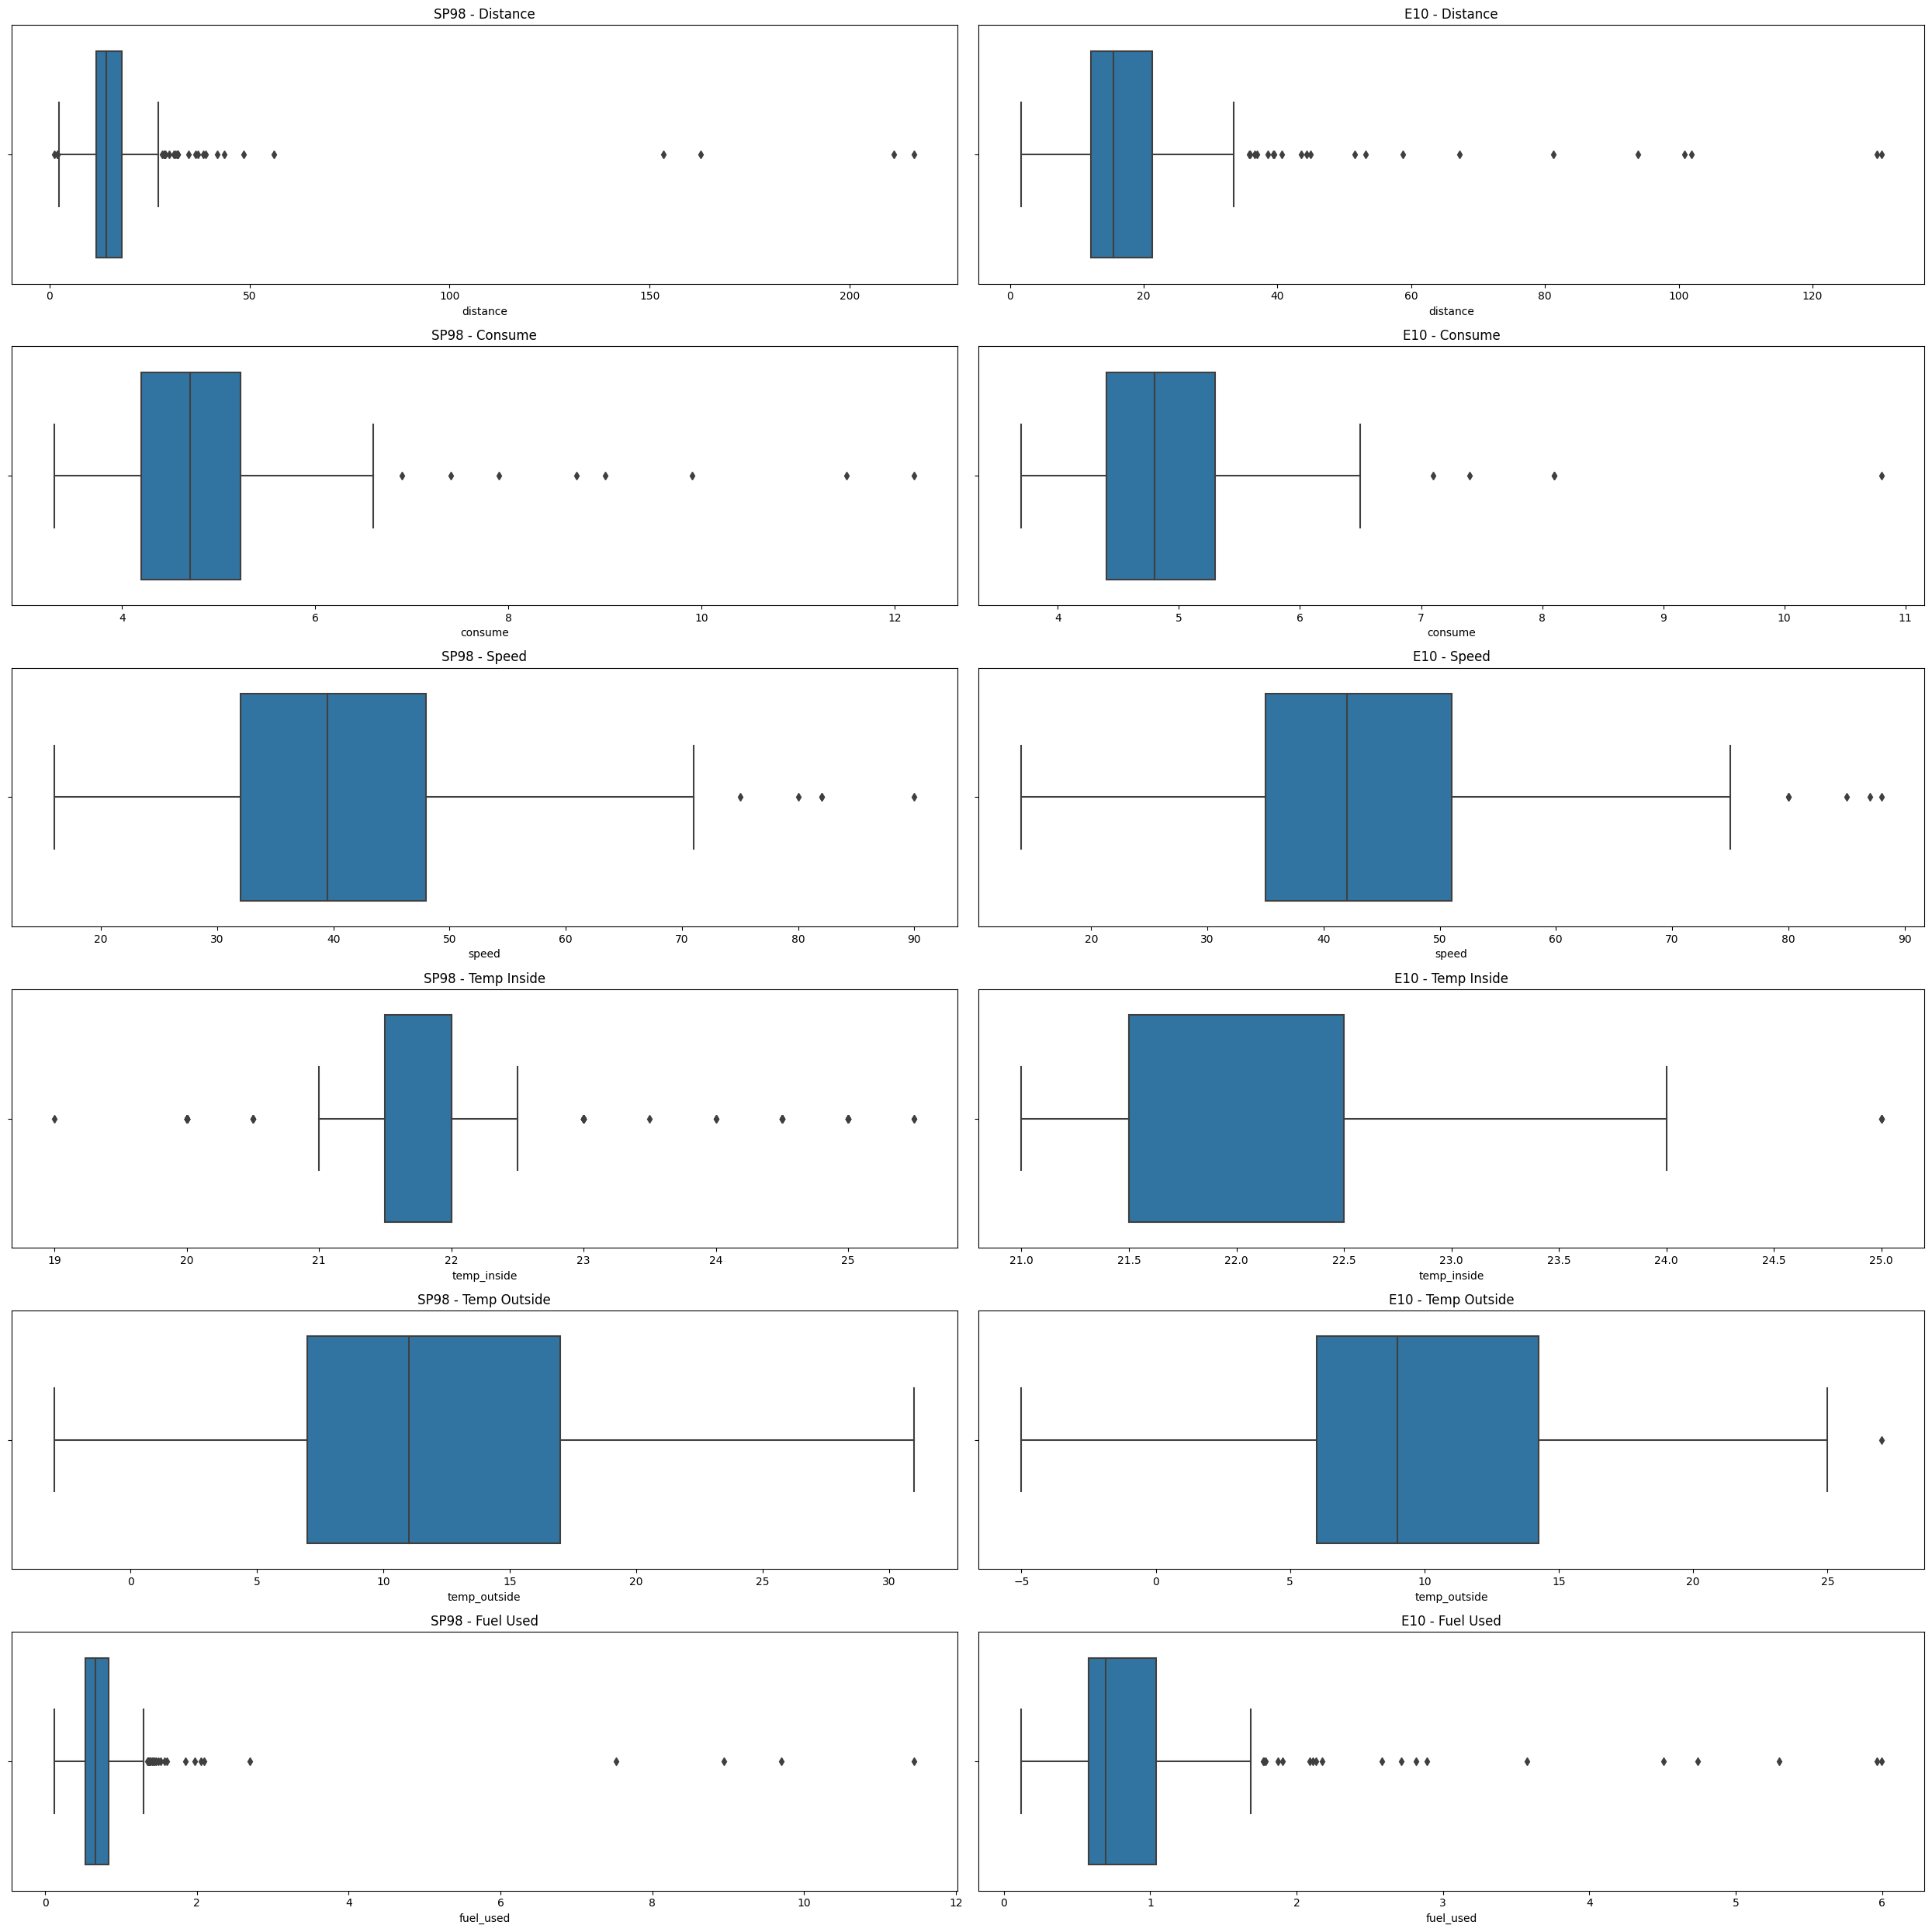

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
data_SP98 = data[data['gas_type'] == 'SP98']
data_E10 = data[data['gas_type'] == 'E10']

# Create boxplots for each gas type
fig, axs = plt.subplots(6, 2, figsize=(25, 25))

# For SP98
sns.boxplot(x=data_SP98["distance"], ax=axs[0, 0]).set_title('SP98 - Distance')
sns.boxplot(x=data_SP98["consume"], ax=axs[1, 0]).set_title('SP98 - Consume')
sns.boxplot(x=data_SP98["speed"], ax=axs[2, 0]).set_title('SP98 - Speed')
sns.boxplot(x=data_SP98["temp_inside"], ax=axs[3, 0]).set_title('SP98 - Temp Inside')
sns.boxplot(x=data_SP98["temp_outside"], ax=axs[4, 0]).set_title('SP98 - Temp Outside')
sns.boxplot(x=data_SP98["fuel_used"], ax=axs[5, 0]).set_title('SP98 - Fuel Used')

# For E10
sns.boxplot(x=data_E10["distance"], ax=axs[0, 1]).set_title('E10 - Distance')
sns.boxplot(x=data_E10["consume"], ax=axs[1, 1]).set_title('E10 - Consume')
sns.boxplot(x=data_E10["speed"], ax=axs[2, 1]).set_title('E10 - Speed')
sns.boxplot(x=data_E10["temp_inside"], ax=axs[3, 1]).set_title('E10 - Temp Inside')
sns.boxplot(x=data_E10["temp_outside"], ax=axs[4, 1]).set_title('E10 - Temp Outside')
sns.boxplot(x=data_E10["fuel_used"], ax=axs[5, 1]).set_title('E10 - Fuel Used')

plt.tight_layout()
plt.show()


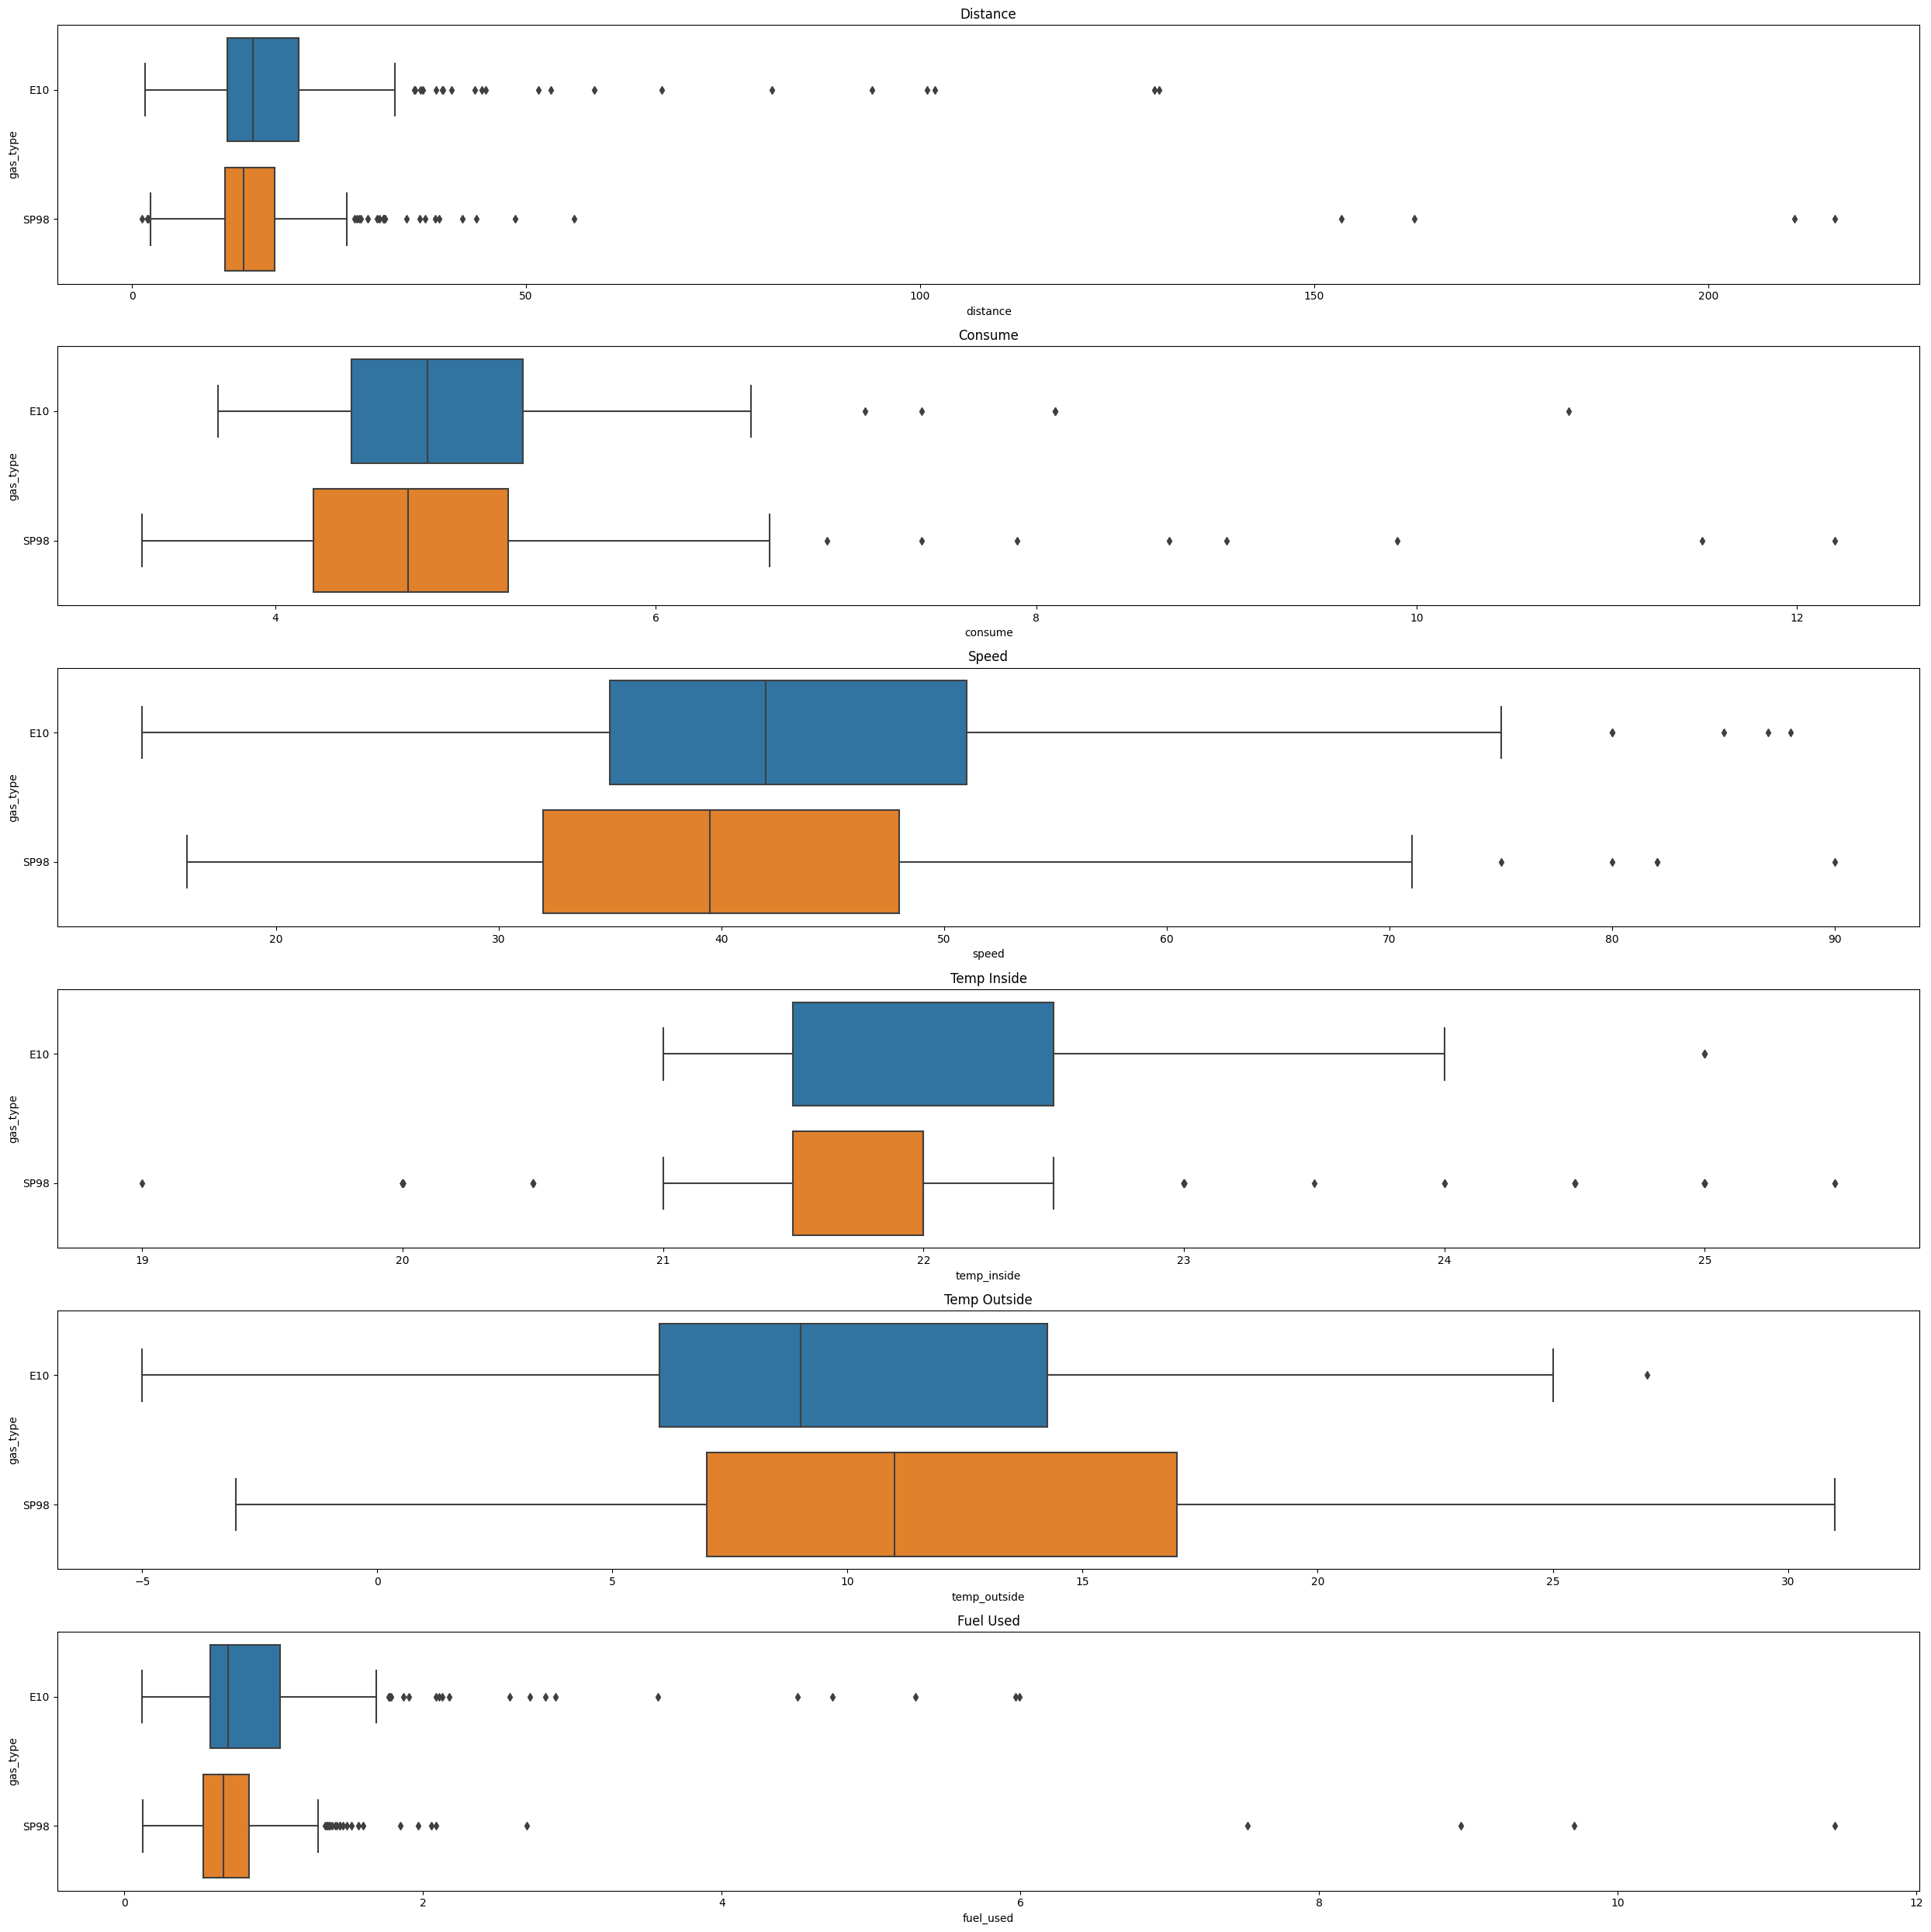

In [34]:
fig, axs = plt.subplots(6, figsize=(25, 25))

# Create boxplots for each variable
sns.boxplot(x=data["distance"], y=data["gas_type"], ax=axs[0])
sns.boxplot(x=data["consume"], y=data["gas_type"], ax=axs[1])
sns.boxplot(x=data["speed"], y=data["gas_type"], ax=axs[2])
sns.boxplot(x=data["temp_inside"], y=data["gas_type"], ax=axs[3])
sns.boxplot(x=data["temp_outside"], y=data["gas_type"], ax=axs[4])
sns.boxplot(x=data["fuel_used"], y=data["gas_type"], ax=axs[5])

axs[0].set_title('Distance')
axs[1].set_title('Consume')
axs[2].set_title('Speed')
axs[3].set_title('Temp Inside')
axs[4].set_title('Temp Outside')
axs[5].set_title('Fuel Used')

plt.tight_layout()
plt.show()

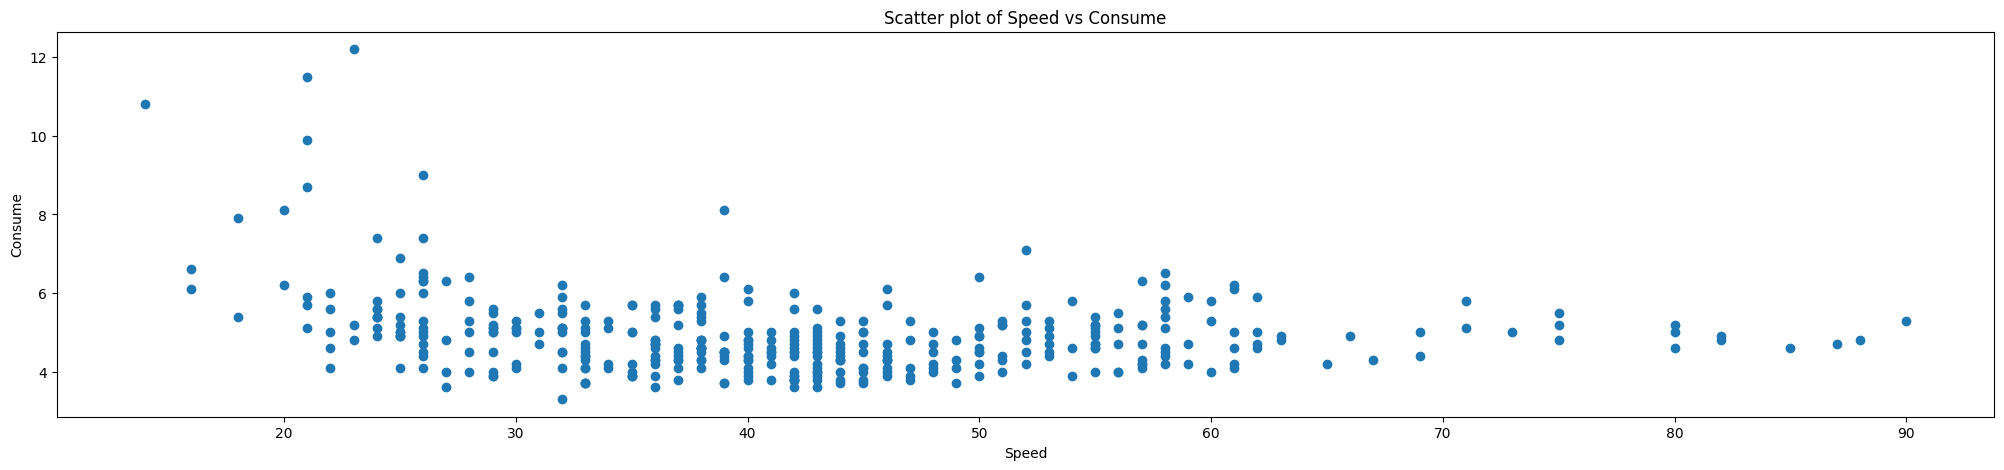

In [35]:
plt.figure(figsize=(25,5))
plt.scatter(data["speed"], data["consume"])
plt.title("Scatter plot of Speed vs Consume")
plt.xlabel("Speed")
plt.ylabel("Consume")
plt.show()

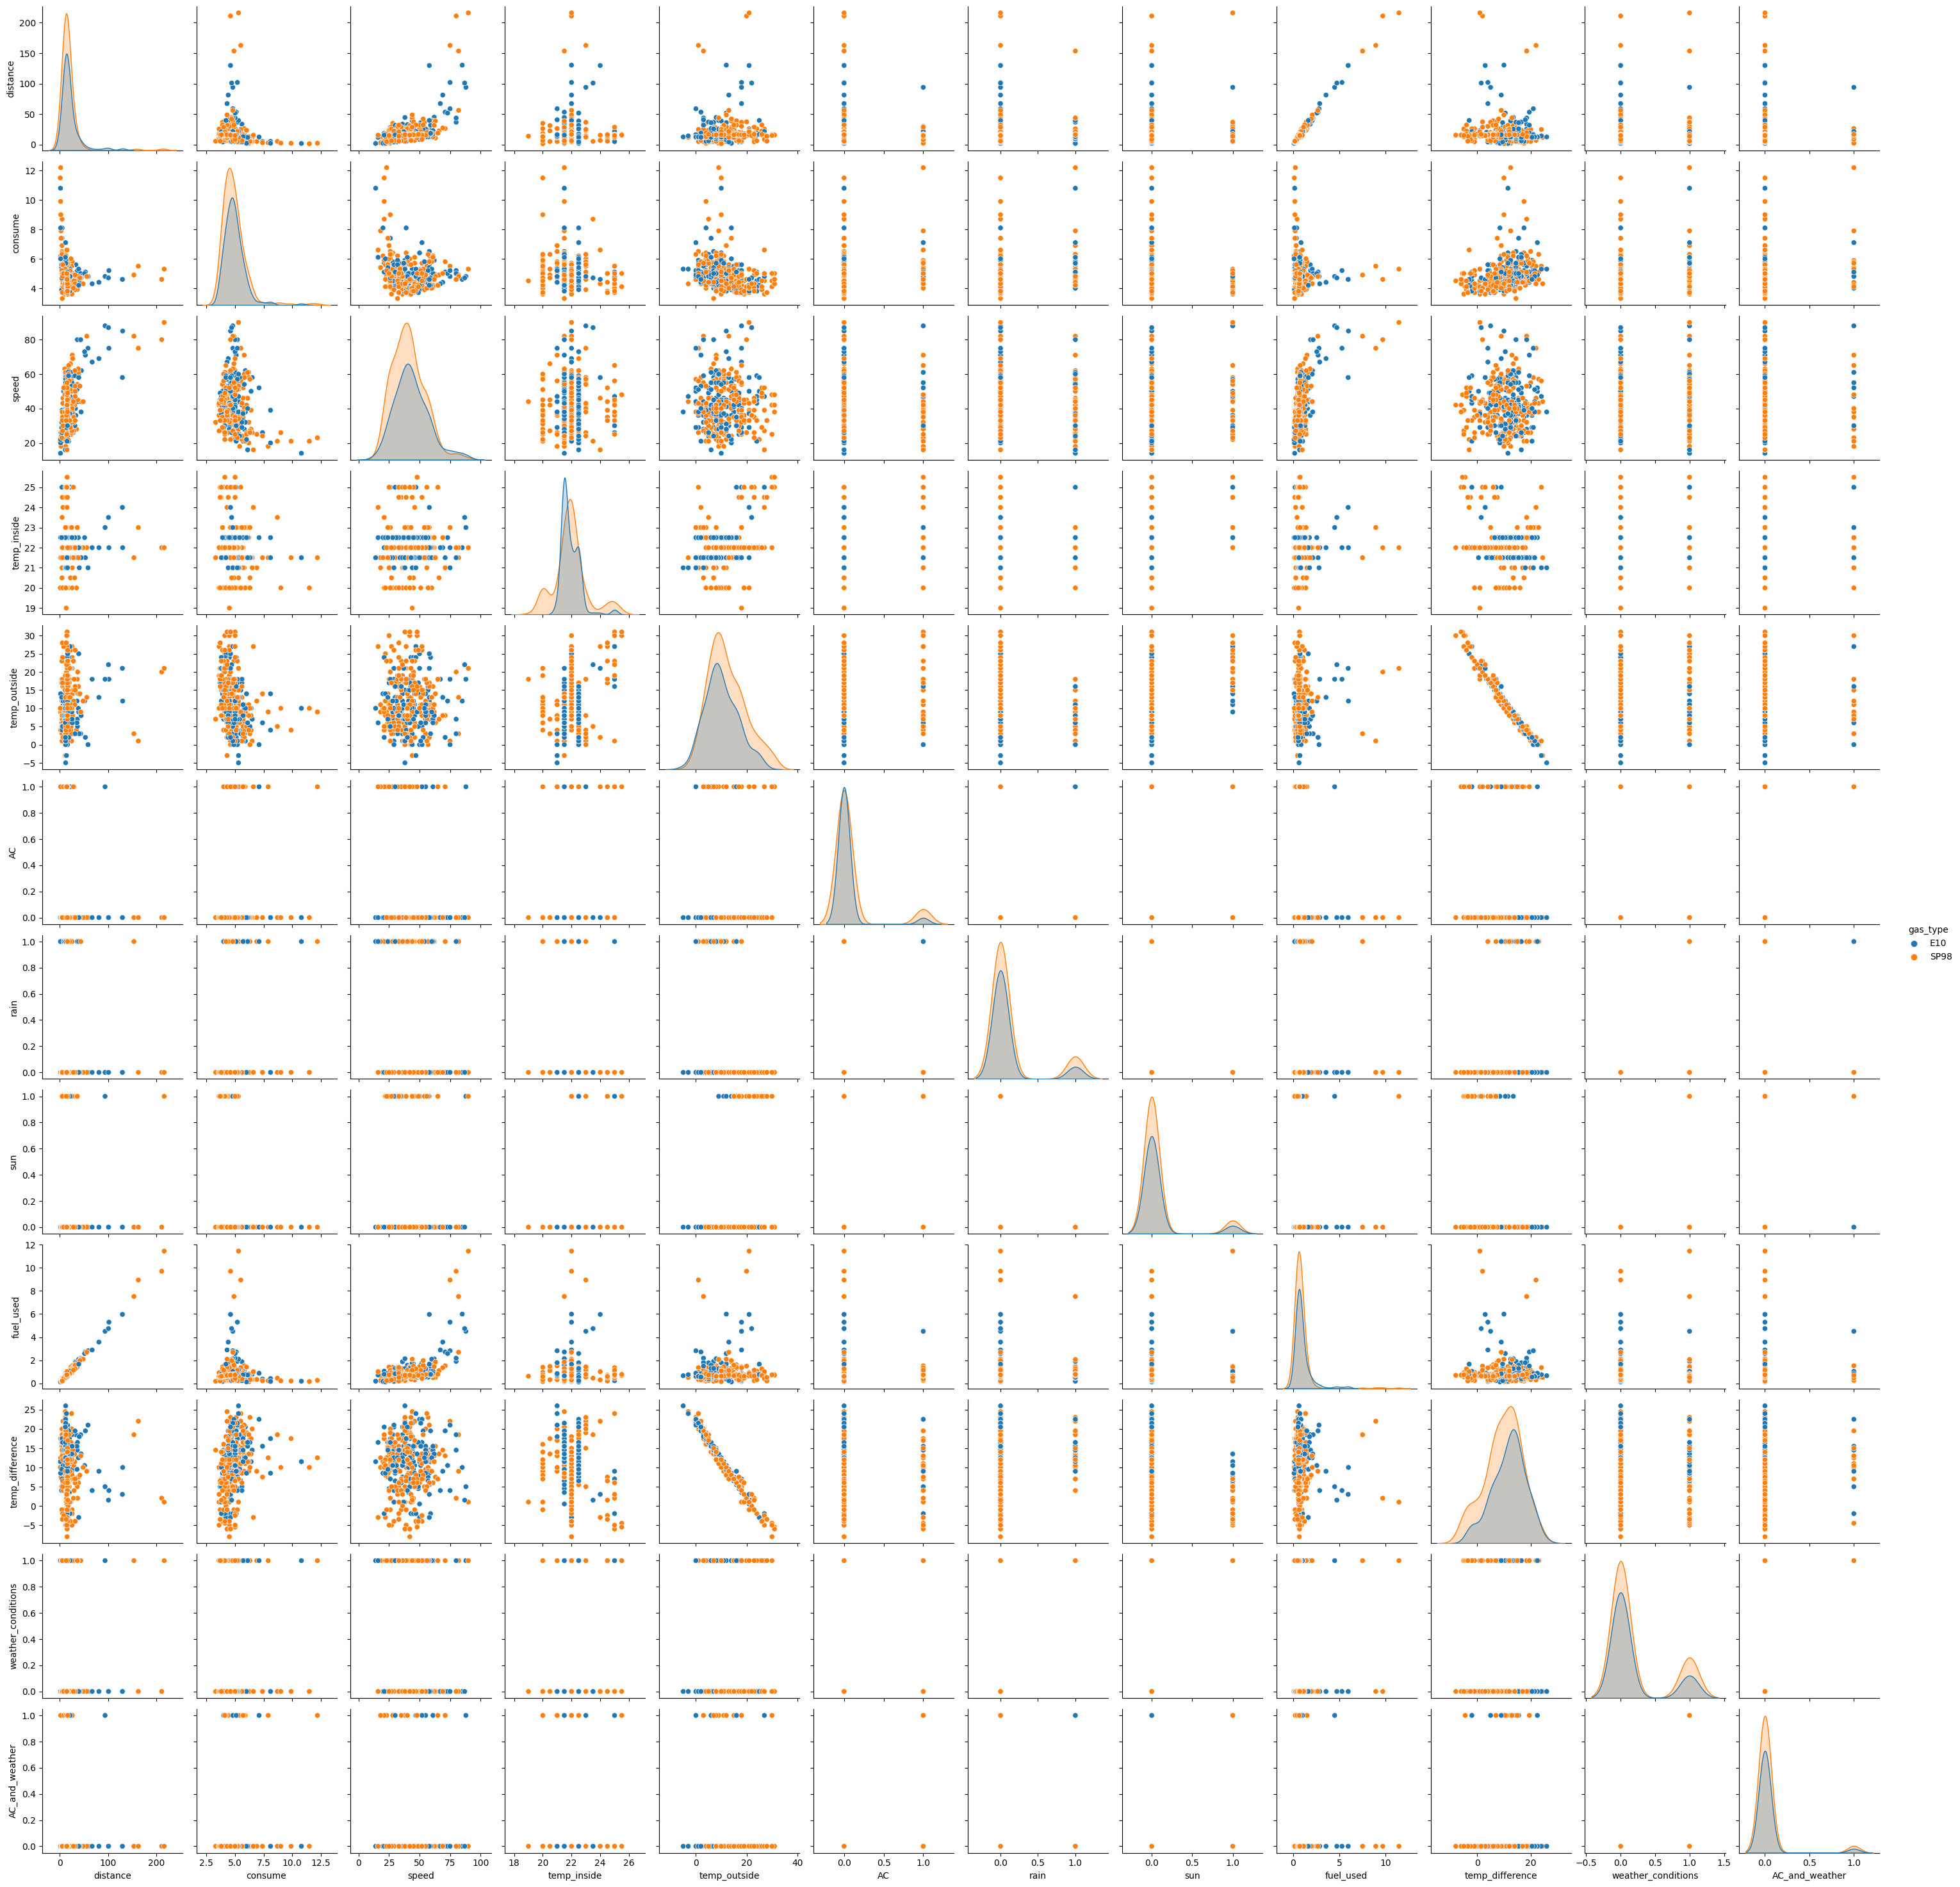

In [36]:
sns.pairplot(data, hue="gas_type")

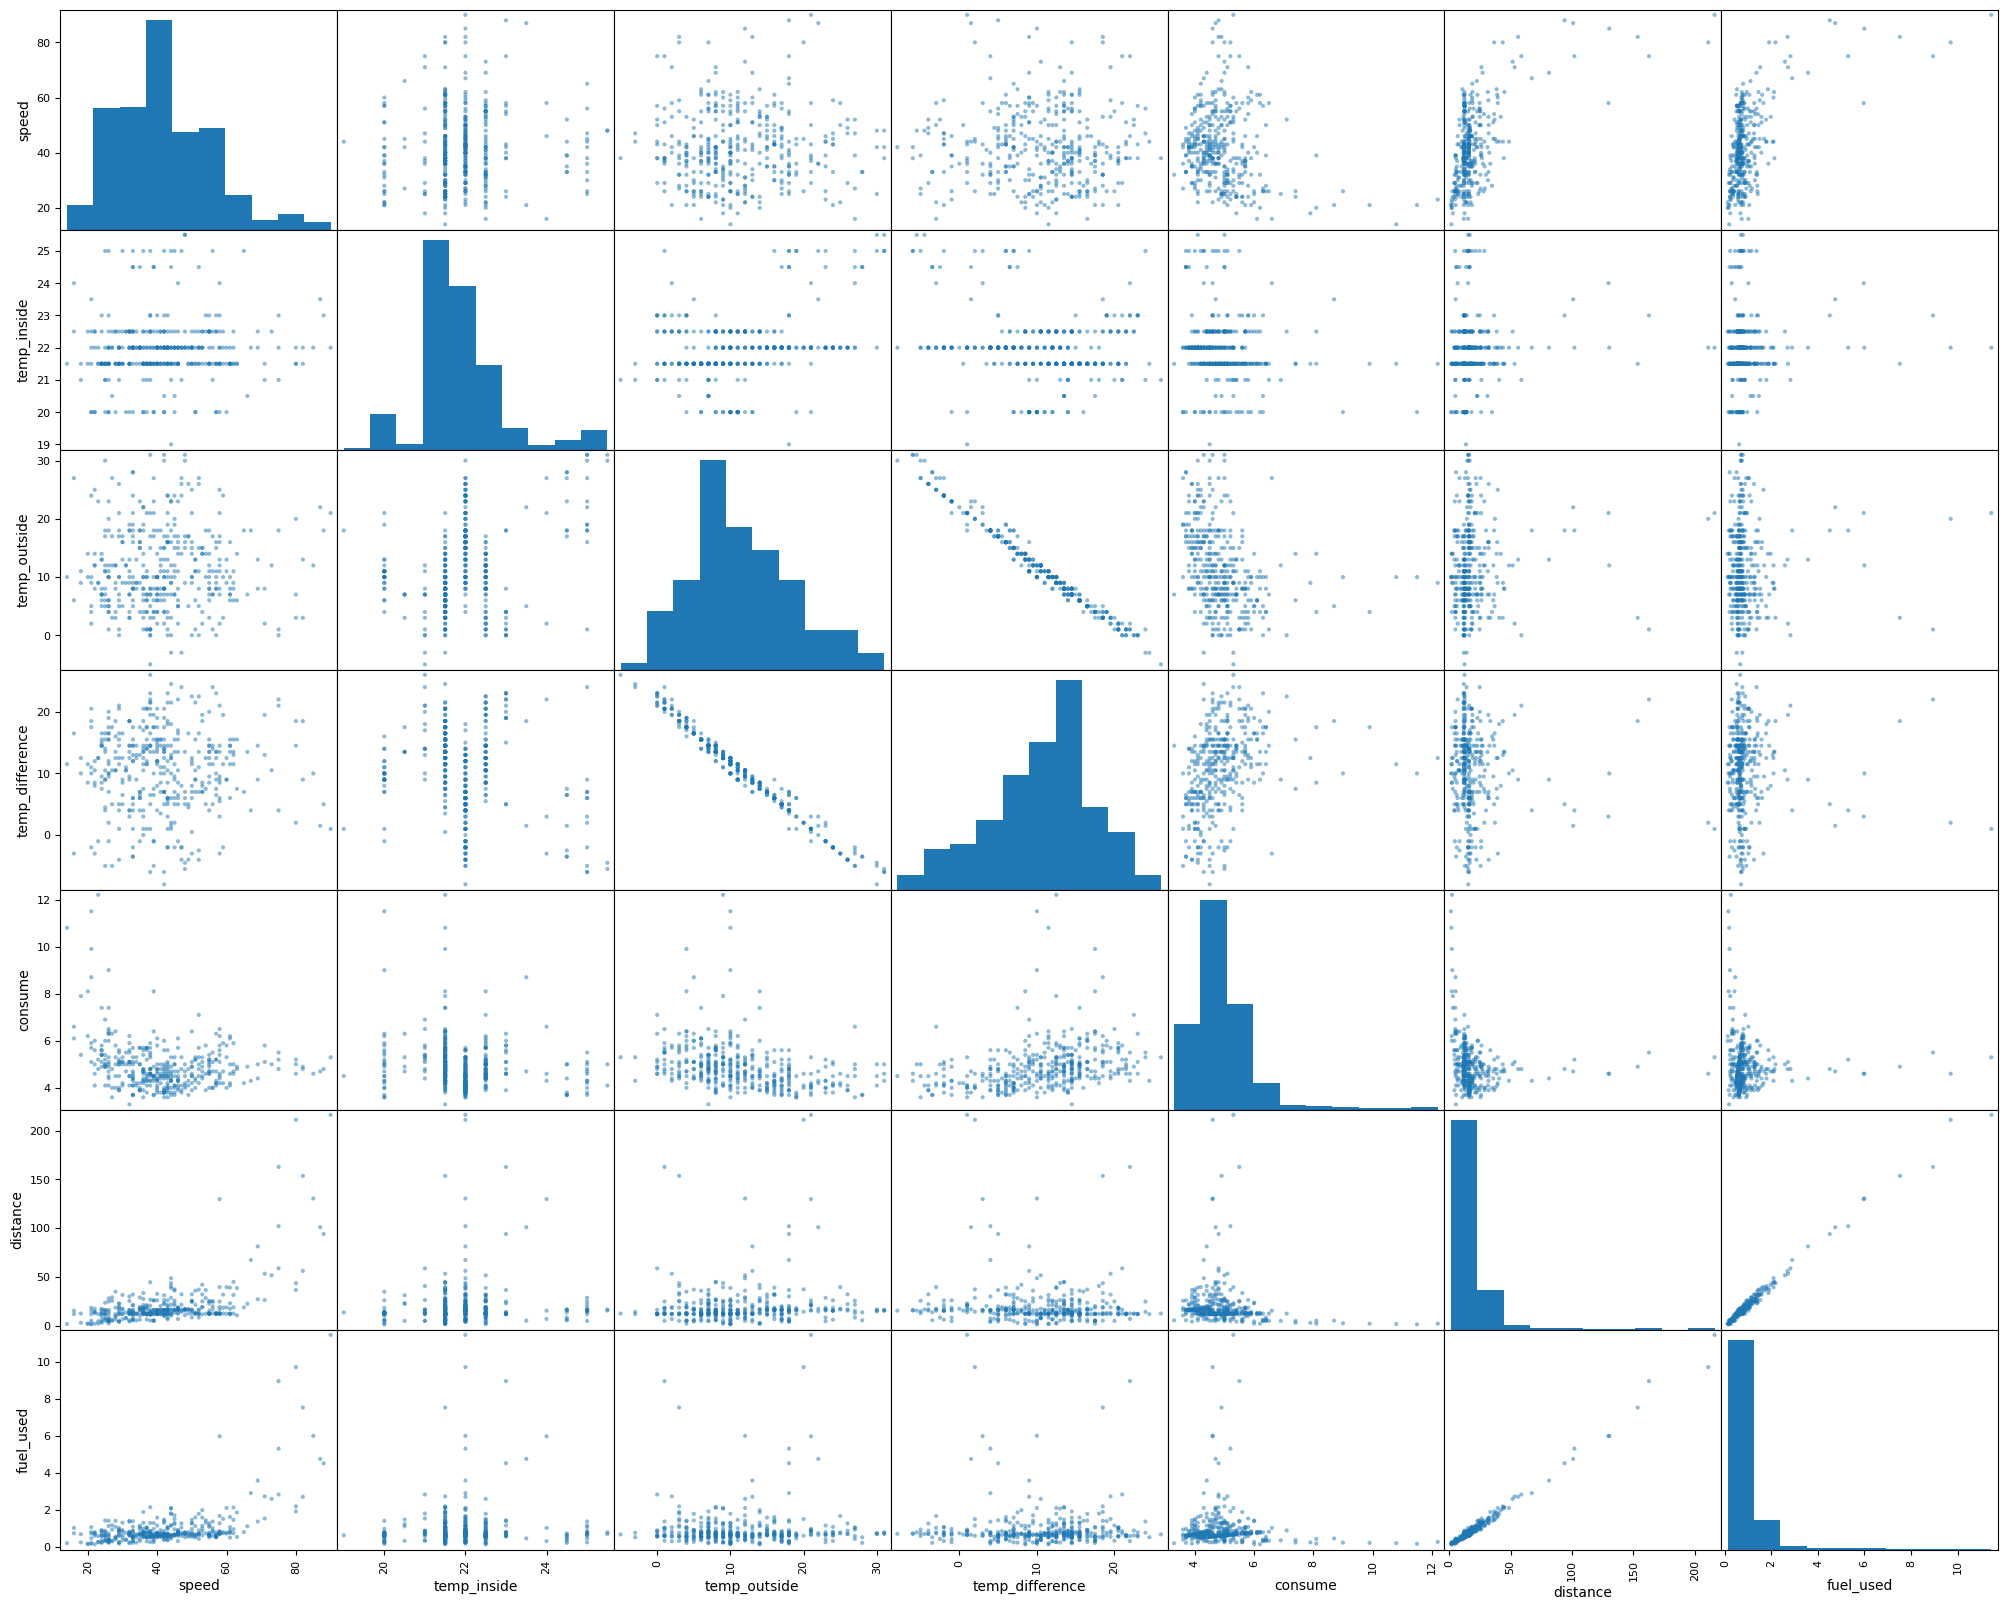

In [37]:
from pandas.plotting import scatter_matrix

scatter_matrix(data[["speed", "temp_inside", "temp_outside", "temp_difference", "consume", "distance", "fuel_used"]], figsize=(25,20))
plt.show()

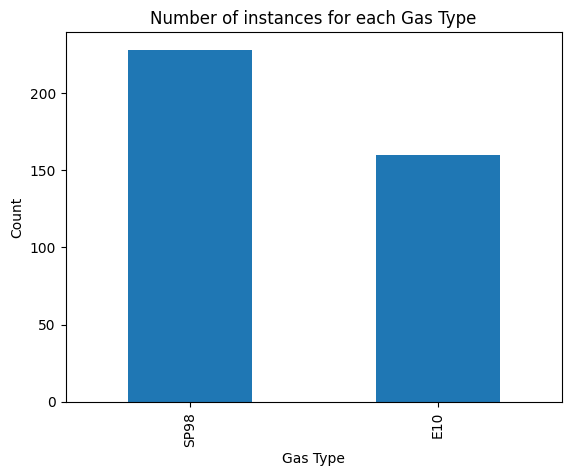

In [38]:
data["gas_type"].value_counts().plot(kind="bar")
plt.title("Number of instances for each Gas Type")
plt.xlabel("Gas Type")
plt.ylabel("Count")
plt.show()

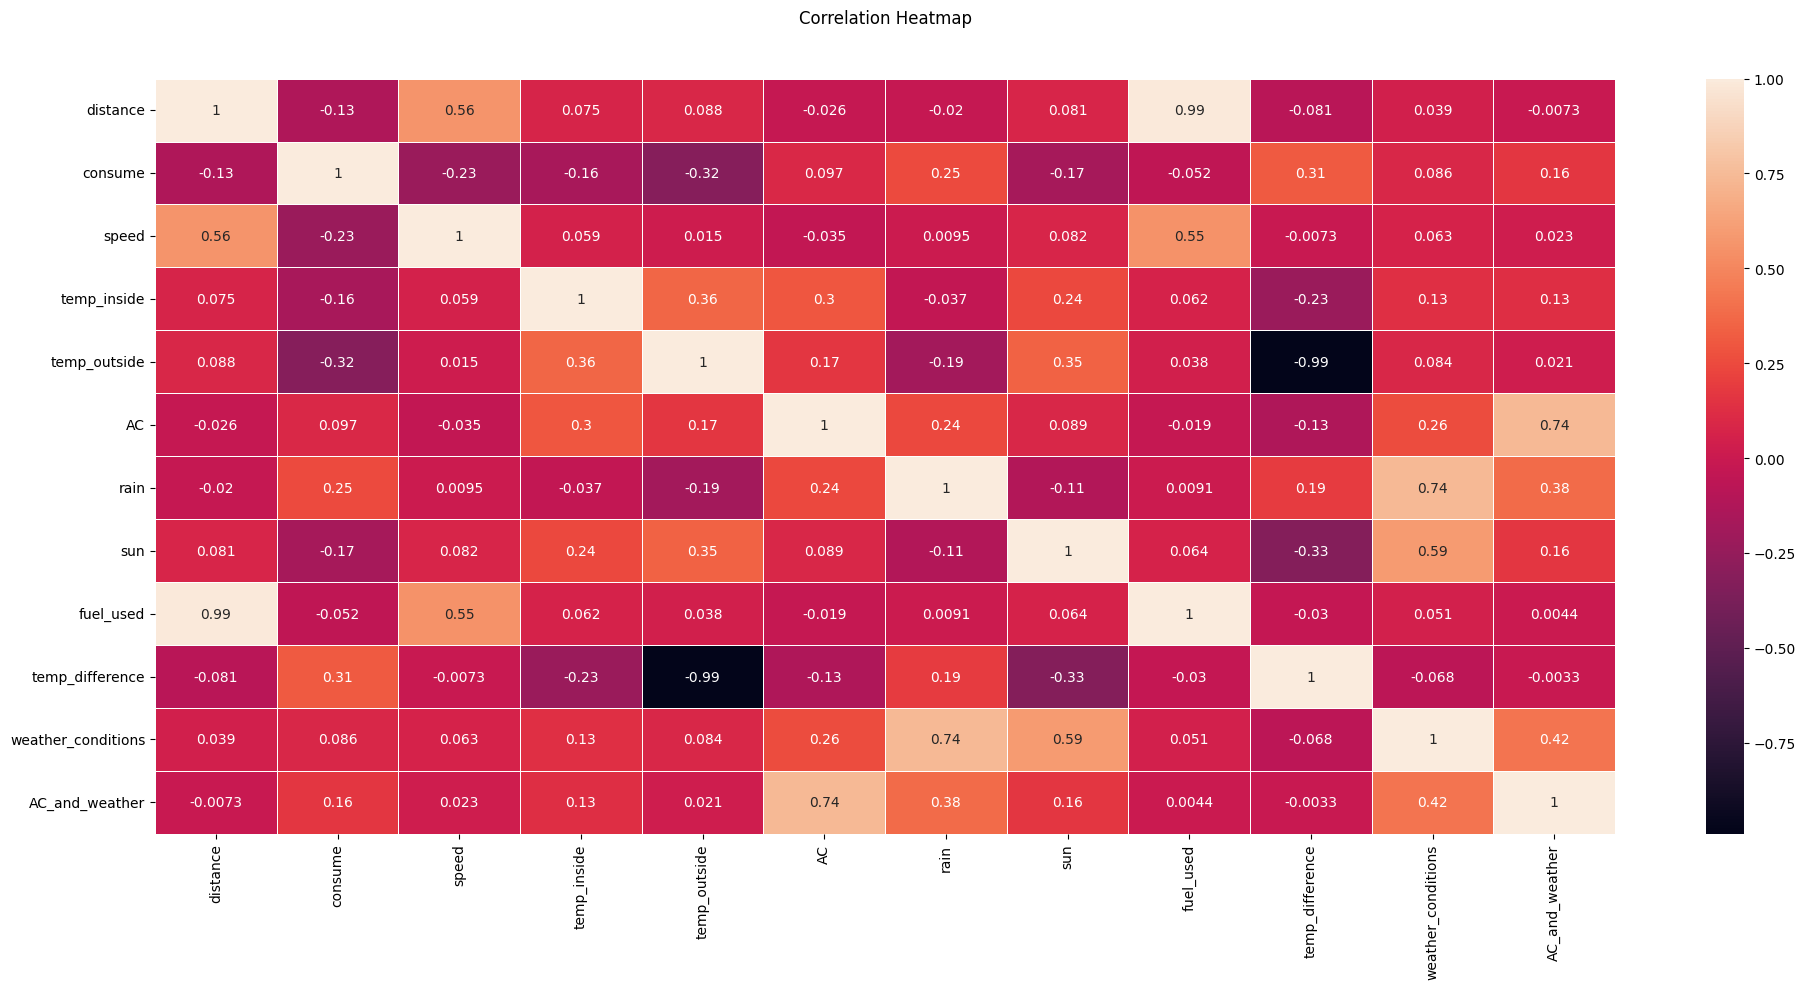

In [39]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5)
plt.title("Correlation Heatmap", pad=40)
plt.tight_layout()
plt.show()

In [40]:
data.corr(numeric_only=True)

distance   consume     speed  temp_inside  temp_outside  \
distance            1.000000 -0.128967  0.562299     0.074734      0.088175   
consume            -0.128967  1.000000 -0.227866    -0.161470     -0.320811   
speed               0.562299 -0.227866  1.000000     0.059139      0.015411   
temp_inside         0.074734 -0.161470  0.059139     1.000000      0.359649   
temp_outside        0.088175 -0.320811  0.015411     0.359649      1.000000   
AC                 -0.025738  0.096591 -0.035408     0.296719      0.167562   
rain               -0.019791  0.248118  0.009489    -0.037204     -0.186315   
sun                 0.081120 -0.170667  0.081618     0.242237      0.346903   
fuel_used           0.992101 -0.052188  0.551847     0.061849      0.037877   
temp_difference    -0.080936  0.310871 -0.007303    -0.226884     -0.990353   
weather_conditions  0.039051  0.085882  0.063220     0.134432      0.084248   
AC_and_weather     -0.007341  0.160957  0.023389     0.128789      0.021477   

                          AC      rain       sun  fuel_used  temp_difference  \
distance           -0.025738 -0.019791  0.081120   0.992101        -0.080936   
consume             0.096591  0.248118 -0.170667  -0.052188         0.310871   
speed              -0.035408  0.009489  0.081618   0.551847        -0.007303   
temp_inside         0.296719 -0.037204  0.242237   0.061849        -0.226884   
temp_outside        0.167562 -0.186315  0.346903   0.037877        -0.990353   
AC                  1.000000  0.242915  0.088598  -0.018700        -0.130831   
rain                0.242915  1.000000 -0.112650   0.009125         0.188944   
sun                 0.088598 -0.112650  1.000000   0.064247        -0.326112   
fuel_used          -0.018700  0.009125  0.064247   1.000000        -0.030350   
temp_difference    -0.130831  0.188944 -0.326112  -0.030350         1.000000   
weather_conditions  0.257937  0.737244  0.588275   0.051111        -0.067971   
AC_and_weather      0.739466  0.378495  0.164693   0.004377        -0.003292   

                    weather_conditions  AC_and_weather  
distance                      0.039051       -0.007341  
consume                       0.085882        0.160957  
speed                         0.063220        0.023389  
temp_inside                   0.134432        0.128789  
temp_outside                  0.084248        0.021477  
AC                            0.257937        0.739466  
rain                          0.737244        0.378495  
sun                           0.588275        0.164693  
fuel_used                     0.051111        0.004377  
temp_difference              -0.067971       -0.003292  
weather_conditions            1.000000        0.420018  
AC_and_weather                0.420018        1.000000

1. `distance` and `fuel_used`: The correlation is 0.992101, which is also very close to 1. This means that the longer the distance of the trip, the more fuel is used. This makes sense because longer trips would naturally require more fuel.

2. `consume` and `temp_difference`: The correlation is 0.310871, which is a moderate positive correlation. This suggests that the larger the difference in temperature inside and outside the car, the higher the fuel consumption. This could be because the air conditioning or heating system has to work harder when there's a large temperature difference.

3. `temp_inside` and `AC`: The correlation is 0.296719, which is a moderate positive correlation. This suggests that when the inside temperature is high, the air conditioning is more likely to be turned on.

4. `temp_outside` and `temp_difference`: The correlation is -0.990353, which is very close to -1. This means that the larger the outside temperature, the smaller the difference in temperature inside and outside the car. This makes sense because if it's hot outside, it's likely to be hot inside the car as well, and vice versa.

5. `AC` and `AC_and_weather`: The correlation is 0.739466, which is a strong positive correlation. This suggests that when the air conditioning is on, it's more likely that the weather conditions are such that air conditioning is needed (for example, it's hot outside).

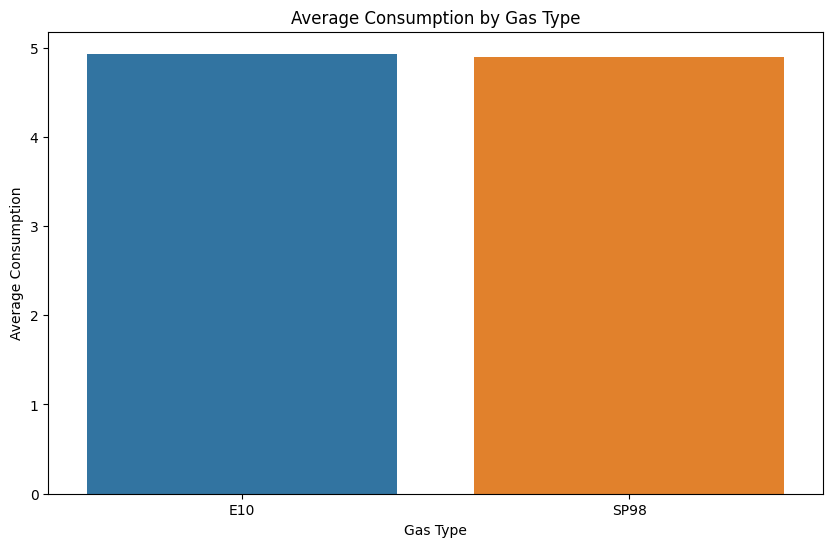

gas_type
E10     4.931250
SP98    4.899123
Name: consume, dtype: float64


In [41]:
# Group by 'gas_type' and calculate mean of 'consume'
average_consumption = data.groupby('gas_type')['consume'].mean()

# Plot the average consumption
plt.figure(figsize=(10, 6))
sns.barplot(x=average_consumption.index, y=average_consumption.values)
plt.title('Average Consumption by Gas Type')
plt.xlabel('Gas Type')
plt.ylabel('Average Consumption')
plt.show()

print(average_consumption)

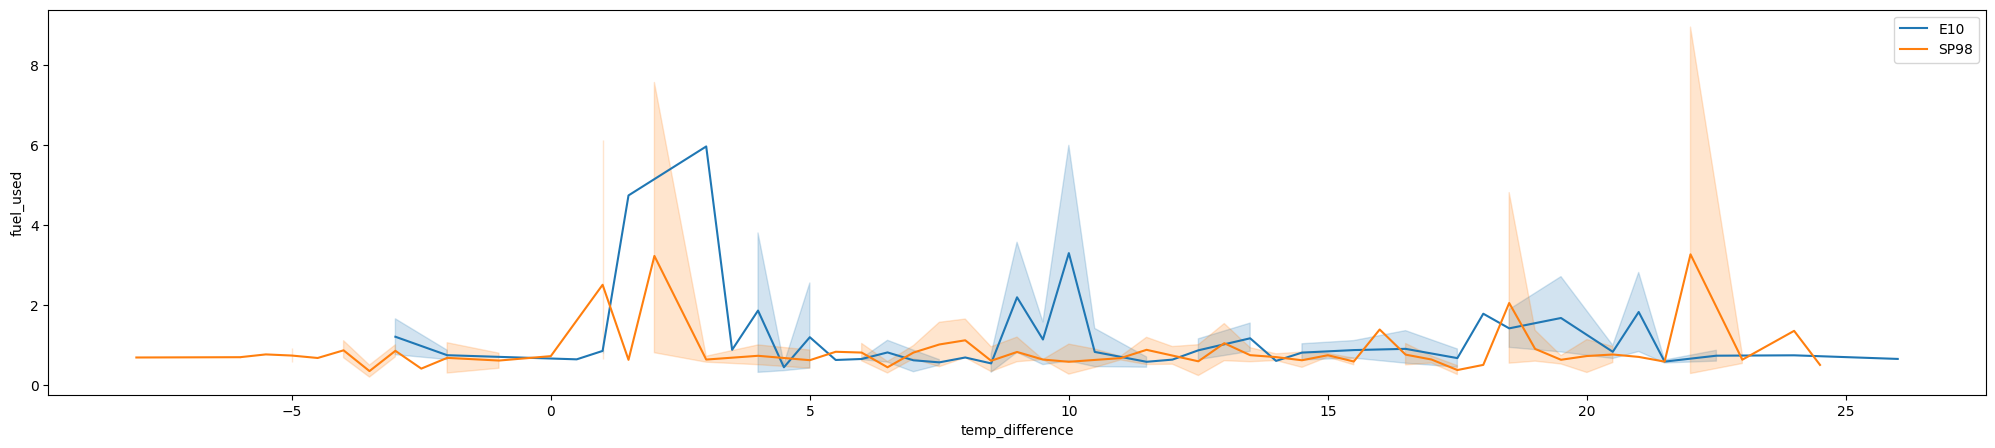

In [42]:
fig,ax = plt.subplots(figsize=(25,5))

ax1 = sns.lineplot(data=data_E10, x=data_E10["temp_difference"], y=data_E10["fuel_used"], label = 'E10')
ax2 = sns.lineplot(data=data_SP98, x=data_SP98["temp_difference"], y=data_SP98["fuel_used"], label = 'SP98')

plt.legend()
plt.show()

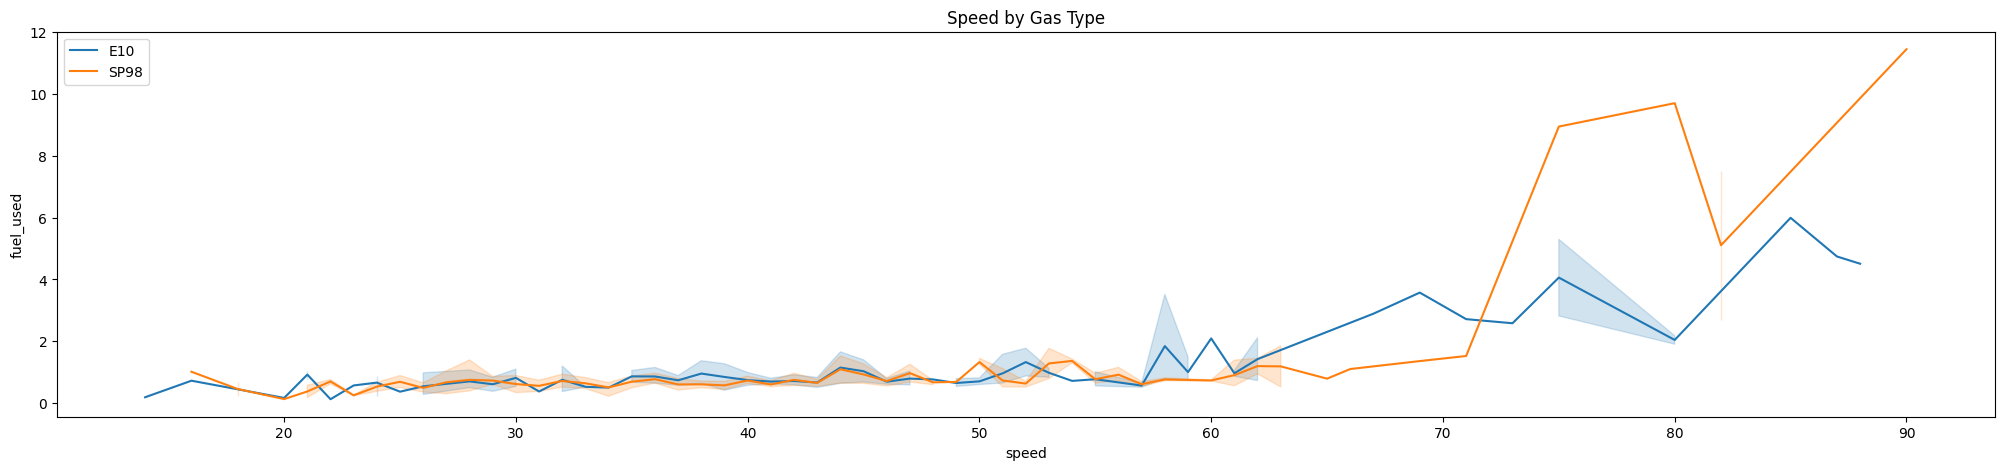

In [43]:
fig,ax = plt.subplots(figsize=(25, 5))

ax1 = sns.lineplot(data=data_E10, x=data_E10["speed"], y=data_E10["fuel_used"], label = 'E10')
ax2 = sns.lineplot(data=data_SP98, x=data_SP98["speed"], y=data_SP98["fuel_used"], label = 'SP98')

plt.title('Speed by Gas Type')
plt.legend(loc="upper left")
plt.show()

Much more fuel is used when driving above 72 km/h on SP98 (the higher the speed, the more fuel is used)

## Hypothesis testing

Several hypotheses could be tested:

1. **Fuel Consumption:**
    - Null Hypothesis (H0): There is no significant difference in the average fuel consumption between the two gas types (SP48 and E10).
    - Alternative Hypothesis (H1): There is a significant difference in the average fuel consumption between the two gas types (SP48 and E10).

2. **Effect of Temperature on Fuel Consumption:**
    - Null Hypothesis (H0): The outside temperature does not significantly affect fuel consumption.
    - Alternative Hypothesis (H1): The outside temperature significantly affects fuel consumption.

3. **Effect of AC Use on Fuel Consumption:**
    - Null Hypothesis (H0): The use of AC does not significantly affect fuel consumption.
    - Alternative Hypothesis (H1): The use of AC significantly affects fuel consumption.

4. **Effect of Weather Conditions on Speed:**
    - Null Hypothesis (H0): Weather conditions (rain or sun) do not significantly affect the speed of the car.
    - Alternative Hypothesis (H1): Weather conditions (rain or sun) significantly affect the speed of the car.

5. **Effect of Temperature Difference on Fuel Used:**
    - Null Hypothesis (H0): There is no significant relationship between the temperature difference (inside and outside) and the amount of fuel used.
    - Alternative Hypothesis (H1): There is a significant relationship between the temperature difference (inside and outside) and the amount of fuel used.

In [44]:
from scipy.stats import ttest_ind, pearsonr, f_oneway

alpha = 0.05

1. **Fuel Consumption:**

We can use an Independent Samples t-test here as we are comparing the means of two independent groups.

In [45]:
from scipy.stats import ttest_ind

# Filter the data
data_SP48 = data[data['gas_type'] == 'SP48']['consume']
data_E10 = data[data['gas_type'] == 'E10']['consume']

t_stat, p_val = ttest_ind(data_SP48, data_E10)

print(f"t-statistic: {t_stat}, p-value: {p_val}")
print()

if p_val < alpha:
    print(f"For fuel consumption, we reject the null hypothesis with a p-value of {p_val}. \nThis indicates that there is a significant difference in the average fuel consumption between the two gas types.")
else:
    print(f"For fuel consumption, we fail to reject the null hypothesis with a p-value of {p_val}. \nThis indicates that there is no significant difference in the average fuel consumption between the two gas types.")

t-statistic: nan, p-value: nan

For fuel consumption, we fail to reject the null hypothesis with a p-value of nan. 
This indicates that there is no significant difference in the average fuel consumption between the two gas types.


2. **Effect of Temperature on Fuel Consumption:**

Here we can use Pearson Correlation as we are testing the relationship between two continuous variables.

In [46]:
from scipy.stats import pearsonr

corr, p_val = pearsonr(data['temp_outside'], data['consume'])

print(f"Pearson correlation: {corr}, p-value: {p_val}")
print()

if p_val < alpha:
    print(f"For effect of temperature on fuel consumption, we reject the null hypothesis with a p-value of {p_val}. \nThis suggests that the outside temperature significantly affects fuel consumption.")
else:
    print(f"For effect of temperature on fuel consumption, we fail to reject the null hypothesis with a p-value of {p_val}. \nThis suggests that the outside temperature does not significantly affect fuel consumption.")

Pearson correlation: -0.32081058814609714, p-value: 9.757138542590863e-11

For effect of temperature on fuel consumption, we reject the null hypothesis with a p-value of 9.757138542590863e-11. 
This suggests that the outside temperature significantly affects fuel consumption.


3. **Effect of AC Use on Fuel Consumption:**

For this one, we can use an Independent Samples t-test as we are comparing the means of two independent groups.

In [47]:
data_AC_on = data[data['AC'] == 1]['consume']
data_AC_off = data[data['AC'] == 0]['consume']

t_stat, p_val = ttest_ind(data_AC_on, data_AC_off)

print(f"t-statistic: {t_stat}, p-value: {p_val}")
print()

if p_val < alpha:
    print(f"For effect of AC use on fuel consumption, we reject the null hypothesis with a p-value of {p_val}. \nThis indicates that the use of AC significantly affects fuel consumption.")
else:
    print(f"For effect of AC use on fuel consumption, we fail to reject the null hypothesis with a p-value of {p_val}. \nThis indicates that the use of AC does not significantly affect fuel consumption.")

t-statistic: 1.9066350212227863, p-value: 0.05731012014594965

For effect of AC use on fuel consumption, we fail to reject the null hypothesis with a p-value of 0.05731012014594965. 
This indicates that the use of AC does not significantly affect fuel consumption.


4. **Effect of Weather Conditions on Speed:**

Here we can use ANOVA as we are comparing the means of multiple groups.

In [48]:
from scipy.stats import f_oneway

data_sun = data[data['sun'] == 1]['speed']
data_rain = data[data['rain'] == 1]['speed']
data_normal = data[(data['sun'] == 0) & (data['rain'] == 0)]['speed']

F, p_val = f_oneway(data_sun, data_rain, data_normal)

print(f"F-statistic: {F}, p-value: {p_val}")
print()

if p_val < alpha:
    print(f"For effect of weather conditions on speed, we reject the null hypothesis with a p-value of {p_val}. \nThis suggests that weather conditions (rain or sun) significantly affect the speed of the car.")
else:
    print(f"For effect of weather conditions on speed, we fail to reject the null hypothesis with a p-value of {p_val}. \nThis suggests that weather conditions (rain or sun) do not significantly affect the speed of the car.")

F-statistic: 1.3599495428719883, p-value: 0.257903898691902

For effect of weather conditions on speed, we fail to reject the null hypothesis with a p-value of 0.257903898691902. 
This suggests that weather conditions (rain or sun) do not significantly affect the speed of the car.


5. **Effect of Temperature Difference on Fuel Used:**

Again, we can use Pearson Correlation as we are testing the relationship between two continuous variables.

In [49]:
corr, p_val = pearsonr(data['temp_difference'], data['fuel_used'])

print(f"Pearson correlation: {corr}, p-value: {p_val}")
print()

if p_val < alpha:
    print(f"For effect of temperature difference on fuel used, we reject the null hypothesis with a p-value of {p_val}. \nThis suggests that there is a significant relationship between the temperature difference (inside and outside) and the amount of fuel used.")
else:
    print(f"For effect of temperature difference on fuel used, we fail to reject the null hypothesis with a p-value of {p_val}. \nThis suggests that there is no significant relationship between the temperature difference (inside and outside) and the amount of fuel used.")

Pearson correlation: -0.030349920846657687, p-value: 0.5511534563603689

For effect of temperature difference on fuel used, we fail to reject the null hypothesis with a p-value of 0.5511534563603689. 
This suggests that there is no significant relationship between the temperature difference (inside and outside) and the amount of fuel used.


## Data preprocessing

### Multicolinearity

Multicollinearity refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related. In the context of machine learning, multicollinearity can affect the following models:

1. **Linear Regression**: Linear regression models are sensitive to multicollinearity. When predictor variables are highly correlated, it becomes difficult for the model to determine the effect of each predictor variable on the response variable independently because the predictor variables are changing together. This can lead to unstable estimates and large standard errors.

2. **Logistic Regression**: Similar to linear regression, logistic regression models can also be affected by multicollinearity. It can cause the estimates of the coefficients to be highly sensitive to small changes in the model.

3. **K-Nearest Neighbors (KNN)**: KNN is not directly affected by multicollinearity. It's a non-parametric method that uses the feature space to find the 'k' closest training examples. However, if the scale of the features is not normalized, features with larger scales may dominate the distance metric, which can indirectly lead to issues related to multicollinearity.

4. **Decision Trees**: Decision trees, including their ensemble versions like Random Forests and Gradient Boosting Machines (GBMs), are generally immune to multicollinearity by nature. They make splits based on the feature that provides the most information gain and do not rely on the relationships between features.

In our case, if we are using linear regression or logistic regression, we might want to check for multicollinearity using methods like Variance Inflation Factor (VIF) or correlation matrices and handle it appropriately, if necessary. If we are using KNN, we should make sure to normalize our features. If we are using decision trees, we generally don't need to worry about multicollinearity.

In [50]:
data.corr()

<ipython-input-50-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


distance   consume     speed  temp_inside  temp_outside  \
distance            1.000000 -0.128967  0.562299     0.074734      0.088175   
consume            -0.128967  1.000000 -0.227866    -0.161470     -0.320811   
speed               0.562299 -0.227866  1.000000     0.059139      0.015411   
temp_inside         0.074734 -0.161470  0.059139     1.000000      0.359649   
temp_outside        0.088175 -0.320811  0.015411     0.359649      1.000000   
AC                 -0.025738  0.096591 -0.035408     0.296719      0.167562   
rain               -0.019791  0.248118  0.009489    -0.037204     -0.186315   
sun                 0.081120 -0.170667  0.081618     0.242237      0.346903   
fuel_used           0.992101 -0.052188  0.551847     0.061849      0.037877   
temp_difference    -0.080936  0.310871 -0.007303    -0.226884     -0.990353   
weather_conditions  0.039051  0.085882  0.063220     0.134432      0.084248   
AC_and_weather     -0.007341  0.160957  0.023389     0.128789      0.021477   

                          AC      rain       sun  fuel_used  temp_difference  \
distance           -0.025738 -0.019791  0.081120   0.992101        -0.080936   
consume             0.096591  0.248118 -0.170667  -0.052188         0.310871   
speed              -0.035408  0.009489  0.081618   0.551847        -0.007303   
temp_inside         0.296719 -0.037204  0.242237   0.061849        -0.226884   
temp_outside        0.167562 -0.186315  0.346903   0.037877        -0.990353   
AC                  1.000000  0.242915  0.088598  -0.018700        -0.130831   
rain                0.242915  1.000000 -0.112650   0.009125         0.188944   
sun                 0.088598 -0.112650  1.000000   0.064247        -0.326112   
fuel_used          -0.018700  0.009125  0.064247   1.000000        -0.030350   
temp_difference    -0.130831  0.188944 -0.326112  -0.030350         1.000000   
weather_conditions  0.257937  0.737244  0.588275   0.051111        -0.067971   
AC_and_weather      0.739466  0.378495  0.164693   0.004377        -0.003292   

                    weather_conditions  AC_and_weather  
distance                      0.039051       -0.007341  
consume                       0.085882        0.160957  
speed                         0.063220        0.023389  
temp_inside                   0.134432        0.128789  
temp_outside                  0.084248        0.021477  
AC                            0.257937        0.739466  
rain                          0.737244        0.378495  
sun                           0.588275        0.164693  
fuel_used                     0.051111        0.004377  
temp_difference              -0.067971       -0.003292  
weather_conditions            1.000000        0.420018  
AC_and_weather                0.420018        1.000000

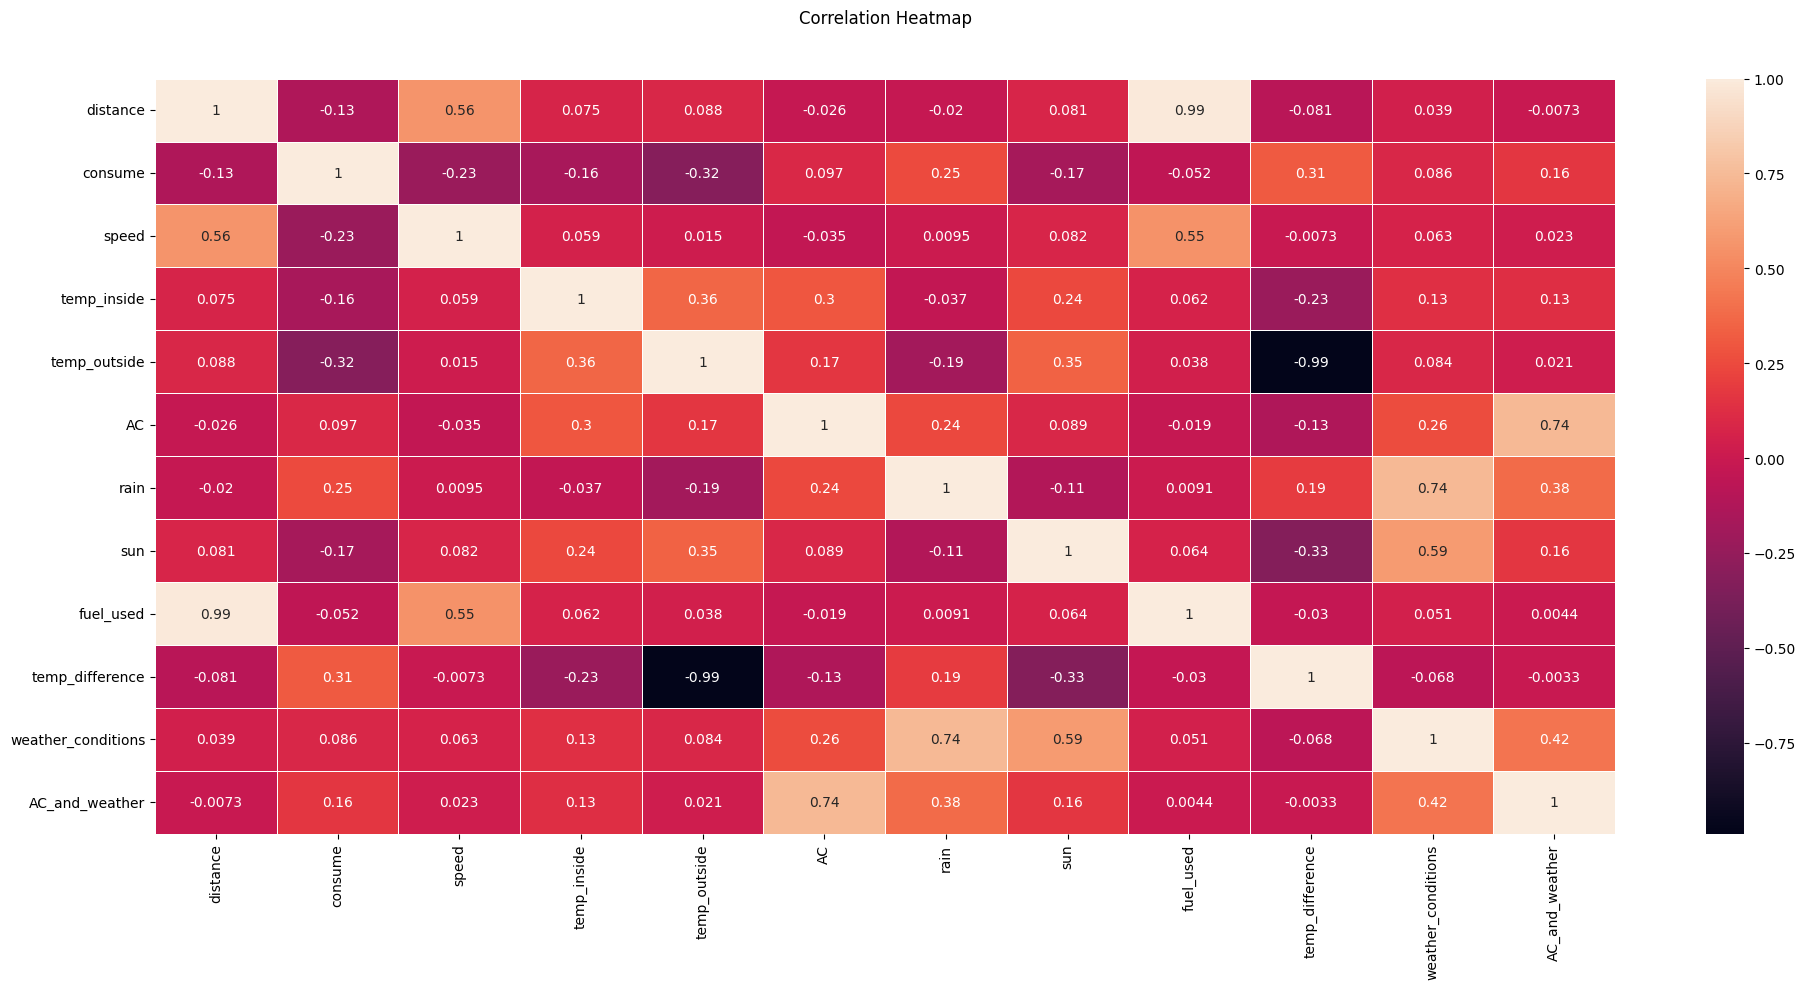

In [51]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5)
plt.title("Correlation Heatmap", pad=40)
plt.tight_layout()
plt.show()

In [52]:
data_model = data.drop(["temp_difference", "fuel_used", "weather_conditions", "AC_and_weather"], axis=1)
data_model

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
0        28.0      5.0     26         21.5            12      E10   0     0   
1        12.0      4.2     30         21.5            13      E10   0     0   
2        11.2      5.5     38         21.5            15      E10   0     0   
3        12.9      3.9     36         21.5            14      E10   0     0   
4        18.5      4.5     46         21.5            15      E10   0     0   
..        ...      ...    ...          ...           ...      ...  ..   ...   
383      16.0      3.7     39         24.5            18     SP98   0     0   
384      16.1      4.3     38         25.0            31     SP98   1     0   
385      16.0      3.8     45         25.0            19     SP98   0     0   
386      15.4      4.6     42         25.0            31     SP98   1     0   
387      14.7      5.0     25         25.0            30     SP98   1     0   

     sun  
0      0  
1      0  
2      0  
3      0  
4      0  
..   ...  
383    0  
384    0  
385    0  
386    0  
387    0  

[388 rows x 9 columns]

### Feature engineering

In [53]:
# Calculate the median
median_consume = data_model["consume"].median()

# Create a new binary variable
data_model["fuel_consumption"] = (data_model["consume"] > median_consume).astype(int)
data_model

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
0        28.0      5.0     26         21.5            12      E10   0     0   
1        12.0      4.2     30         21.5            13      E10   0     0   
2        11.2      5.5     38         21.5            15      E10   0     0   
3        12.9      3.9     36         21.5            14      E10   0     0   
4        18.5      4.5     46         21.5            15      E10   0     0   
..        ...      ...    ...          ...           ...      ...  ..   ...   
383      16.0      3.7     39         24.5            18     SP98   0     0   
384      16.1      4.3     38         25.0            31     SP98   1     0   
385      16.0      3.8     45         25.0            19     SP98   0     0   
386      15.4      4.6     42         25.0            31     SP98   1     0   
387      14.7      5.0     25         25.0            30     SP98   1     0   

     sun  fuel_consumption  
0      0                 1  
1      0                 0  
2      0                 1  
3      0                 0  
4      0                 0  
..   ...               ...  
383    0                 0  
384    0                 0  
385    0                 0  
386    0                 0  
387    0                 1  

[388 rows x 10 columns]

If the 'consume' value is greater than the median, we assign a 1 (indicating high consumption), <br>
otherwise we assign a 0 (indicating low consumption)

### Encoding

It's generally a good practice to perform encoding before splitting the data into training and test sets. This is because encoding is a form of data preprocessing, and we want to ensure that the same preprocessing steps are applied consistently to both our training and test data.

For the forecasting, all of the following models, except decision trees, require encoding of categorical variables.

1. **K-Nearest Neighbors (KNN)**: KNN calculates the distance between instances to make predictions. It does not understand categorical data, so categorical data needs to be transformed into a numerical format. One common way to do this is one-hot encoding.

2. **Linear Regression**: Linear regression models also require numerical input. They calculate the weighted sum of the input features, so categorical data needs to be encoded into a numerical format. Again, one-hot encoding is a common method.

3. **Logistic Regression**: Like linear regression, logistic regression also calculates a weighted sum of the input features. Therefore, categorical data needs to be encoded into a numerical format.

4. **Decision Trees**: Decision trees are capable of handling categorical data without encoding. They make splits based on the categories in the data. However, many implementations of decision trees (including the popular scikit-learn library in Python) do not support categorical data directly and require numerical input. In these cases, we would still need to encode our categorical data.

So, for our `gas_type` column, we would typically use one-hot encoding (or another encoding method) to transform the `E10` and `SP98` values into a numerical format. This would involve creating a new binary (0 or 1) feature for each unique value in the `gas_type` column.

In [54]:
from sklearn.preprocessing import OneHotEncoder

# Perform one-hot encoding
encoded = pd.get_dummies(data_model, columns=["gas_type"])
encoded

distance  consume  speed  temp_inside  temp_outside  AC  rain  sun  \
0        28.0      5.0     26         21.5            12   0     0    0   
1        12.0      4.2     30         21.5            13   0     0    0   
2        11.2      5.5     38         21.5            15   0     0    0   
3        12.9      3.9     36         21.5            14   0     0    0   
4        18.5      4.5     46         21.5            15   0     0    0   
..        ...      ...    ...          ...           ...  ..   ...  ...   
383      16.0      3.7     39         24.5            18   0     0    0   
384      16.1      4.3     38         25.0            31   1     0    0   
385      16.0      3.8     45         25.0            19   0     0    0   
386      15.4      4.6     42         25.0            31   1     0    0   
387      14.7      5.0     25         25.0            30   1     0    0   

     fuel_consumption  gas_type_E10  gas_type_SP98  
0                   1             1              0  
1                   0             1              0  
2                   1             1              0  
3                   0             1              0  
4                   0             1              0  
..                ...           ...            ...  
383                 0             0              1  
384                 0             0              1  
385                 0             0              1  
386                 0             0              1  
387                 1             0              1  

[388 rows x 11 columns]

**Do we have to drop the other column after encoding?**

Yes, when using one-hot encoding, it's common to drop one of the encoded columns to avoid multicollinearity. This is known as "dummy variable trap". Multicollinearity refers to a situation in which two or more variables are highly correlated; in simple terms, one variable can be predicted from the others.

In the context of linear regression, multicollinearity can lead to unstable estimates of the model coefficients (making it hard to interpret the coefficients), and it can inflate the standard errors of the coefficients, leading to them being deemed not statistically significant.

However, not all models are affected by multicollinearity. For instance:

1. **Decision Trees and Random Forests**: These models are not affected by multicollinearity because they do not rely on the correlation between features. They make splits based on the feature that provides the most information gain, regardless of its correlation with other features.

2. **K-Nearest Neighbors (KNN)**: KNN is a distance-based algorithm that doesn't make assumptions about the relationships between features, so it's not affected by multicollinearity.

3. **Neural Networks**: While the presence of correlated features can slow down the learning process, neural networks are generally robust to multicollinearity.

In contrast, models like Linear Regression, Logistic Regression, and other regression-based models can be significantly affected by multicollinearity. For these models, it's a good idea to drop one of the one-hot encoded columns to avoid the issue.

In [55]:
# Drop one of the one-hot encoded columns
encoded = encoded.drop("gas_type_SP98", axis=1)
encoded

distance  consume  speed  temp_inside  temp_outside  AC  rain  sun  \
0        28.0      5.0     26         21.5            12   0     0    0   
1        12.0      4.2     30         21.5            13   0     0    0   
2        11.2      5.5     38         21.5            15   0     0    0   
3        12.9      3.9     36         21.5            14   0     0    0   
4        18.5      4.5     46         21.5            15   0     0    0   
..        ...      ...    ...          ...           ...  ..   ...  ...   
383      16.0      3.7     39         24.5            18   0     0    0   
384      16.1      4.3     38         25.0            31   1     0    0   
385      16.0      3.8     45         25.0            19   0     0    0   
386      15.4      4.6     42         25.0            31   1     0    0   
387      14.7      5.0     25         25.0            30   1     0    0   

     fuel_consumption  gas_type_E10  
0                   1             1  
1                   0             1  
2                   1             1  
3                   0             1  
4                   0             1  
..                ...           ...  
383                 0             0  
384                 0             0  
385                 0             0  
386                 0             0  
387                 1             0  

[388 rows x 10 columns]

### Do we split or scale first?

The correct procedure is to split the data into training and test sets first, and then apply scaling.

The reason for this is that the test data is supposed to be a stand-in for future data that the model will encounter. In practice, we won't have access to this future data when training our model, and so it shouldn't influence the way we prepare our training data.

If we scale our data before splitting it, information about the distribution of the test set (which is part of the full dataset) will leak into the training set. This is because scaling procedures like standardization and normalization adjust the scale of our features based on the minimum, maximum, mean, or standard deviation of the data.

By splitting first, we ensure that the scaling parameters are computed only based on the training data, which is what we want, as it simulates the real-world scenario where we have to scale new observations based on the scaling parameters learned from the training data.

### Train and test split

In [56]:
# Defining the feature variables and the target variable for Regression models
X = encoded.drop("consume", axis=1)
y = encoded["consume"]

# Splitting the data into a training set and a test set for Regression models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Regression models")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print()
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Regression models
X_train: (310, 9)
X_test: (78, 9)

y_train: (310,)
y_test: (78,)


In [57]:
# Defining the feature variables and the target variable for Classification models
X_binary = encoded.drop("fuel_consumption", axis=1)
y_binary = encoded["fuel_consumption"]

# Splitting the data into a training set and a test set for Classification models
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

print("Classification models")
print(f"X_train_binary: {X_train_binary.shape}")
print(f"X_test_binary: {X_test_binary.shape}")
print()
print(f"y_train_binary: {y_train_binary.shape}")
print(f"y_test_binary: {y_test_binary.shape}")

Classification models
X_train_binary: (310, 9)
X_test_binary: (78, 9)

y_train_binary: (310,)
y_test_binary: (78,)


### Scaling

The choice of scaling method often depends on the specific characteristics of the data and the requirements of the model.

1. **Standardization (Z-score normalization):** This method transforms the data to have a mean of 0 and a standard deviation of 1. It is useful when the data follows a Gaussian distribution (or is close to it). Standardization is not bounded (the values can be any real number), and it preserves the shape of the original distribution (not the data ranges). It is often used in linear regression, logistic regression, and support vector machines.

2. **Min-Max Scaling (Normalization):** This method transforms the data to a range between 0 and 1. It is useful when the data does not follow a Gaussian distribution. It is also sensitive to outliers, so if there are outliers in the data, it might be better to use standardization.

3. **Robust Scaling:** This method is similar to standardization, but it uses the median and the interquartile range (instead of the mean and standard deviation) to scale the data. It is useful when the data has outliers, as it is not sensitive to them.

For our data, since it doesn't follow a Gaussian distribution and does contain outliers, robust scaling could be the best choice.

It's also worth noting that some models, like decision trees and random forests, do not require feature scaling, while others, like K-nearest neighbors, linear regression, and neural networks, can benefit from it.

In [58]:
from sklearn.preprocessing import RobustScaler

# Standardizing the features
robust_scaler = RobustScaler()

**REGRESSION MODEL**

In [59]:
# Transform the training data
X_train_scaled = robust_scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = robust_scaler.transform(X_test)

# Print the shapes of the scaled data for Regression models
print("Regression models")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")

Regression models
X_train_scaled: (310, 9)
X_test_scaled: (78, 9)


**CLASSIFICATION MODEL**

In [60]:
# Transform the training data
X_train_binary_scaled = robust_scaler.fit_transform(X_train_binary)

# Transform the test data
X_test_binary_scaled = robust_scaler.transform(X_test_binary)

# Print the shapes of the scaled data for Classification models
print("Classification models")
print(f"X_train_binary_scaled: {X_train_binary_scaled.shape}")
print(f"X_test_binary_scaled: {X_test_binary_scaled.shape}")

Classification models
X_train_binary_scaled: (310, 9)
X_test_binary_scaled: (78, 9)


## Predictions

### What does each model do to our data?

The following machine learning models serves different purposes and is best suited to different types of problems:

1. **Linear Regression**: This is like trying to draw a straight line that fits as closely as possible to all the points on a graph. In our case, we're trying to use information like speed, temperature, and whether the AC is on to predict how much fuel the car will consume. The line helps us predict the fuel consumption based on these factors.

2. **Logistic Regression**: This is similar to linear regression, but instead of predicting a continuous amount (like fuel consumption), it predicts whether something will happen or not. For our data, we would need to change our question to something like "Will the car consume a high amount of fuel or not?".

3. **K-Nearest Neighbors (KNN)**: This is like asking your neighbors for advice. For predicting fuel consumption, the model would look at similar trips the car has made in the past (the 'neighbors') and use those to make a prediction. If we were trying to classify, like in the high/low fuel consumption example, it would look at what category the most similar trips fell into.

4. **Decision Trees**: This is like playing a game of 20 questions. The model asks a series of yes/no questions about the data (like "Is the speed above 30?") until it arrives at a prediction. For our data, the end result of the questions would be a prediction of the car's fuel consumption.

### Which models can we use in our data?

Given our data, we can use all four models for different purposes:

1. **Linear Regression**: We can use this model to predict the 'consume' variable, which is a continuous variable. The model will use the other features in our dataset to predict fuel consumption as a continuous value.

2. **Logistic Regression**: This model can be used to predict the 'fuel_consumption' variable, which is a binary variable we created. The model will use the other features in our dataset to predict whether fuel consumption is high or low.

3. **K-Nearest Neighbors (KNN)**: This model can be used for both regression and classification tasks. We can use KNN to predict the 'consume' variable (regression) or the 'fuel_consumption' variable (classification).

4. **Decision Trees**: This model can also be used for both regression and classification tasks. We can use a decision tree to predict the 'consume' variable (regression) or the 'fuel_consumption' variable (classification).

The choice of model depends on the specific question we're trying to answer:

- If we want to predict the exact fuel consumption, use a regression model like Linear Regression or KNN.

- If we want to predict whether fuel consumption is high or low, use a classification model like Logistic Regression, KNN, or Decision Trees.

### Linear regression

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test_scaled)

# Calculate the Mean Squared Error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error (MSE): 0.5643706750574788
R-squared Score: 0.37797099898557085


The Mean Squared Error (MSE) and the R-squared score are two common metrics used to evaluate the performance of a regression model.

1. **Mean Squared Error (MSE)**: This is a measure of the average squared difference between the actual and predicted values. The MSE is approximately 0.564.

- This means that, on average, the squared difference between the actual and predicted fuel consumption is 0.564.

- The closer the MSE is to 0, the better the model is performing.

- However, the MSE is highly dependent on the scale of our target variable, so it's often more useful for comparing different models or model configurations rather than as an absolute measure of performance.

2. **R-squared Score**: This is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It ranges from 0 to 1, where 1 indicates that the model perfectly predicts the target variable, and 0 indicates that the model does not explain any of the variability of the target variable around its mean.

The R-squared score is approximately 0.378, which means that about 37.8% of the variability in fuel consumption can be explained by our model. The closer the R-squared score is to 1, the better the model is performing.

**CONCLUSION**

In summary, our model has a moderate level of predictive power. There's room for improvement, which could potentially be achieved by using a more complex model.

### Logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train_binary_scaled, y_train_binary)

# Make predictions on the test data
y_pred_binary = log_reg.predict(X_test_binary_scaled)

# Print the classification report
print(classification_report(y_test_binary, y_pred_binary))

# Print the confusion matrix
print(confusion_matrix(y_test_binary, y_pred_binary))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        41

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78

[[37  0]
 [ 0 41]]


The results we're seeing are a classification report and a confusion matrix, which are commonly used to evaluate the performance of a classification model. Here's what each part means:

1. **Precision**: This is the ratio of true positives (correct predictions of the positive class) to the sum of true positives and false positives (incorrect predictions of the positive class). A precision of 1.00 for both classes means that every time the model predicted a class, it was always correct.

2. **Recall**: This is the ratio of true positives to the sum of true positives and false negatives (instances of the positive class that were incorrectly predicted as the negative class). A recall of 1.00 for both classes means that the model correctly identified all instances of each class.

3. **F1-score**: This is the harmonic mean of precision and recall, and it provides a single metric that balances both concerns. An F1-score of 1.00 for both classes means that the model achieved perfect balance between precision and recall.

4. **Support**: This is the number of instances of each class in the test set. We had 37 instances of class 0 and 41 instances of class 1.

5. **Accuracy**: This is the ratio of correct predictions to total predictions. An accuracy of 1.00 means that the model made correct predictions for all instances.

6. **Macro avg**: This is the average of the metric for each class, without considering the class imbalance. In our case, it's 1.00 for precision, recall, and F1-score.

7. **Weighted avg**: This is the average of the metric for each class, but this time considering the class imbalance. In our case, it's also 1.00 for precision, recall, and F1-score.

The confusion matrix is a 2x2 matrix that shows the number of true positives, true negatives, false positives, and false negatives. In our case:

- True negatives (top left): The model correctly predicted 37 instances of class 0.
- False positives (top right): The model incorrectly predicted 0 instances of class 1.
- False negatives (bottom left): The model incorrectly predicted 0 instances of class 0.
- True positives (bottom right): The model correctly predicted 41 instances of class 1.

In summary, our model achieved perfect performance on the test set, correctly classifying all instances. This is quite rare in practice and might suggest that our test set was very similar to our training set, or that the problem was very easy to solve.

### K-Nearest Neighbors (KNN)

#### KNN for regression

In [63]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix

# KNN for regression
knn_reg = KNeighborsRegressor(n_neighbors=5)  # start with 5 neighbors
knn_reg.fit(X_train_scaled, y_train)
y_pred_reg = knn_reg.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_reg)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.45571794871794863


**KNN Regression before parameter tuning:**

The Mean Squared Error (MSE) is 0.4557. MSE is a measure of how close the model's predictions are to the actual values. It does this by squaring the differences between the predicted and actual values, which penalizes larger errors more than smaller ones. The closer the MSE is to 0, the better the model's performance.

Hyperparameter tuning

In [64]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter values that should be searched
k_range = list(range(1, 31))

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid
grid = GridSearchCV(knn_reg, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit the grid with data
grid.fit(X_train_scaled, y_train)

# View the complete results
grid.cv_results_

# Examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print()

# Perform cross-validation
cross_val_score(knn_reg, X_train_scaled, y_train, cv=10)

-0.4630788530465949
{'n_neighbors': 6}
KNeighborsRegressor(n_neighbors=6)



array([0.77199959, 0.49190426, 0.72868234, 0.51777346, 0.34895631,
       0.46313718, 0.53170538, 0.73141521, 0.55642142, 0.55378075])

Let's evaluate our model using the parameters found from Grid Search

In [65]:
from sklearn.metrics import mean_squared_error, accuracy_score

# KNN Regression
knn_reg = KNeighborsRegressor(n_neighbors=6)
knn_reg.fit(X_train_scaled, y_train)
y_pred_reg = knn_reg.predict(X_test_scaled)

# Calculate the Mean Squared Error of the predictions
mse = mean_squared_error(y_test, y_pred_reg)
print(f"KNN Regression MSE: {mse}")

KNN Regression MSE: 0.45479700854700866


**KNN Regression after parameter tuning:**

After tuning the parameters, the MSE decreased slightly to 0.4548. This indicates that the model's performance improved slightly after tuning the parameters.

**CONCLUSION**

In summary, tuning the parameters of the KNN regression model resulted in a slight improvement in the model's performance, as indicated by the lower MSE. This means the model is now slightly more accurate in predicting the 'consume' variable. However, the improvement is very small, suggesting that the initial model was already performing quite well, or that the KNN algorithm may not be the best choice for this particular dataset and problem.

#### KNN for classification

In [66]:
# KNN for classification
knn_clf = KNeighborsClassifier(n_neighbors=5)  # start with 5 neighbors
knn_clf.fit(X_train_binary_scaled, y_train_binary)
y_pred_clf = knn_clf.predict(X_test_binary_scaled)

# Print the classification report
print(classification_report(y_test_binary, y_pred_clf))

# Print the confusion matrix
print(confusion_matrix(y_test_binary, y_pred_clf))

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test_binary, y_pred_clf)
print()
print(f"KNN Classification Accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        37
           1       0.90      0.88      0.89        41

    accuracy                           0.88        78
   macro avg       0.88      0.88      0.88        78
weighted avg       0.89      0.88      0.88        78

[[33  4]
 [ 5 36]]

KNN Classification Accuracy: 0.8846153846153846


**KNN Classification before parameter tuning:**

The precision, recall, and f1-score for both classes (0 and 1) are around 0.88 to 0.89. Precision is the proportion of true positive predictions (correct predictions) among all positive predictions. Recall, also known as sensitivity, is the proportion of true positive predictions among all actual positives. The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both values.

The confusion matrix (the 2x2 matrix at the bottom) shows that there were 33 true positives and 36 true negatives, meaning the model correctly predicted 33 instances of class 0 and 36 instances of class 1. However, there were 4 false positives (predicted class 0 but actually class 1) and 5 false negatives (predicted class 1 but actually class 0).

Hyperparameter tuning

In [67]:
# Define the parameter values that should be searched
k_range = list(range(1, 31))

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid
grid = GridSearchCV(knn_reg, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit the grid with data
grid.fit(X_train_binary_scaled, y_train_binary)

# View the complete results
grid.cv_results_

# Examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print()

# Perform cross-validation
cross_val_score(knn_reg, X_train_binary_scaled, y_train_binary, cv=10)

-0.09947076612903225
{'n_neighbors': 16}
KNeighborsRegressor(n_neighbors=16)



array([0.57680437, 0.60721248, 0.72372685, 0.52843915, 0.51056505,
       0.67708333, 0.35808081, 0.56189084, 0.33528265, 0.53715278])

Let's evaluate our model using the parameters found from Grid Search

In [68]:
# KNN Classification
knn_clf = KNeighborsClassifier(n_neighbors=16)
knn_clf.fit(X_train_binary_scaled, y_train_binary)
y_pred_clf = knn_clf.predict(X_test_binary_scaled)

# Print the classification report
print(classification_report(y_test_binary, y_pred_clf))

# Print the confusion matrix
print(confusion_matrix(y_test_binary, y_pred_clf))

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test_binary, y_pred_clf)
print()
print(f"KNN Classification Accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        37
           1       0.93      0.93      0.93        41

    accuracy                           0.92        78
   macro avg       0.92      0.92      0.92        78
weighted avg       0.92      0.92      0.92        78

[[34  3]
 [ 3 38]]

KNN Classification Accuracy: 0.9230769230769231


**KNN Classification after parameter tuning:**

After tuning, the precision, recall, and f1-score for both classes improved to around 0.92 to 0.93. This indicates that the model's performance improved after tuning the parameters.

The confusion matrix shows that there were 34 true positives and 38 true negatives, meaning the model correctly predicted 34 instances of class 0 and 38 instances of class 1. However, there were 3 false positives and 3 false negatives.

**CONCLUSION**

In summary, tuning the parameters of the KNN classification model improved its performance, as indicated by the higher precision, recall, and F1-score, and fewer false positives and false negatives. This means the model is now more accurate and reliable in predicting whether fuel consumption is high or low.

#### Summary

**KNN Regression:**

Before tuning the parameters with grid search and cross-validation, the Mean Squared Error (MSE) was 0.4557. This is a measure of how close the model's predictions are to the actual values, with lower values indicating better performance. After tuning the parameters, the MSE slightly decreased to 0.4548. This indicates that the model's performance improved slightly after tuning the parameters.

**KNN Classification:**

Before tuning the parameters, the accuracy of the model was 88.46%. This means that the model correctly predicted whether fuel consumption was high or low about 88.46% of the time. After tuning the parameters, the accuracy increased to 92.31%. This indicates that the model's performance improved after tuning the parameters, and it is now correctly predicting the fuel consumption category about 92.31% of the time.

In both cases, tuning the parameters of the KNN models using grid search and cross-validation led to an improvement in the models' performance. This demonstrates the importance of tuning model parameters to achieve the best possible performance.

### Decision Trees

#### Decision Tree Regression

In [69]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor object
dt_reg = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dt_reg.fit(X_train_scaled, y_train)

# Make predictions using the testing set
y_pred = dt_reg.predict(X_test_scaled)

# The mean squared error
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))

Mean Squared Error (MSE): 0.7122115384615384


**DecisionTree Regression before parameter tuning:**

Before tuning, the MSE for the decision tree regression model was 0.7122. This means that, on average, the model's predictions were about 0.7122 units away from the actual values.

#### Decision Tree Classification

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a Decision Tree Classifier object
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the model using the training sets
dt_clf.fit(X_train_binary_scaled, y_train_binary)

# Make predictions using the testing set
y_pred_binary = dt_clf.predict(X_test_binary_scaled)

# Print classification report
print(classification_report(y_test_binary, y_pred_binary))

# Print confusion matrix
print(confusion_matrix(y_test_binary, y_pred_binary))

# Calculate the accuracy
accuracy_clf = accuracy_score(y_test_binary, y_pred_clf)
print()
print("Decision Tree Classification Accuracy: ", accuracy_clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        41

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78

[[37  0]
 [ 0 41]]

Decision Tree Classification Accuracy:  0.9230769230769231


#### Hyperparameter tuning

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

# Define the parameter grid for Decision Tree
param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize a DecisionTreeRegressor and a DecisionTreeClassifier
dt_reg = DecisionTreeRegressor(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV for regression and classification
grid_search_reg = GridSearchCV(dt_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_clf = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy')

# Fit the models
grid_search_reg.fit(X_train_scaled, y_train)
grid_search_clf.fit(X_train_binary_scaled, y_train_binary)

# Print the best parameters and the best score for regression
print("Best parameters for regression: ", grid_search_reg.best_params_)
print("Best score for regression: ", grid_search_reg.best_score_)
print()

# Print the best parameters and the best score for classification
print("Best parameters for classification: ", grid_search_clf.best_params_)
print("Best score for classification: ", grid_search_clf.best_score_)

Best parameters for regression:  {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best score for regression:  -0.270370087261503

Best parameters for classification:  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for classification:  1.0


**DECISION TREE REGRESSION MODEL**

For the Decision Tree Regression model, the best parameters are:
- max_depth: 5
- max_features: None
- min_samples_leaf: 3
- min_samples_split: 2

The best score (mean squared error) for the Decision Tree Regression model is approximately 0.2704. This is the average of the MSE values obtained in the 5-fold cross-validation. Remember, the closer to 0 this value is, the better the model.

**DECISION TREE CLASSIFICATION MODEL**


For the Decision Tree Classification model, the best parameters are:
- max_depth: None (this means that the nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)
- max_features: None (this means that all features are considered when looking for the best split)
- min_samples_leaf: 1 (this means that the minimum number of samples required to be at a leaf node is 1)
- min_samples_split: 2 (this means that the minimum number of samples required to split an internal node is 2)

The best score (accuracy) for the Decision Tree Classification model is 1.0. This means that the model was able to perfectly classify all instances in the training set during the cross-validation process.

However, the perfect score might indicate overfitting.

#### Decision Tree Regression (_after hyperparameter tuning_)

In [72]:
# Initialize the Decision Tree Regressor with the best parameters
dt_reg = DecisionTreeRegressor(max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=2)

# Fit the model to the training data
dt_reg.fit(X_train_scaled, y_train)

# Predict the target variable for the test data
y_pred_reg = dt_reg.predict(X_test_scaled)

# Calculate the Mean Squared Error
mse_reg = mean_squared_error(y_test, y_pred_reg)

print("Decision Tree Regression MSE: ", mse_reg)

Decision Tree Regression MSE:  0.647974901222216


**DecisionTree Regression before parameter tuning:**

After tuning the hyperparameters of the model, the MSE decreased to 0.6480. This is an improvement, indicating that the model's predictions are now, on average, about 0.6480 units away from the actual values.

**CONCLUSION**

In other words, the tuning process has made the model more accurate in predicting the 'consume' variable. However, the MSE is still relatively high, suggesting that there may be room for further improvement.

#### Decision Tree Classification (_after hyperparameter tuning_)

In [73]:
# Initialize the Decision Tree Classifier with the best parameters
dt_clf = DecisionTreeClassifier(max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2)

# Fit the model to the training data
dt_clf.fit(X_train_binary_scaled, y_train_binary)

# Predict the target variable for the test data
y_pred_binary = dt_clf.predict(X_test_binary_scaled)

# Print classification report
print(classification_report(y_test_binary, y_pred_binary))

# Print confusion matrix
print(confusion_matrix(y_test_binary, y_pred_binary))

# Calculate the accuracy
accuracy_clf = accuracy_score(y_test_binary, y_pred_binary)
print()
print("Decision Tree Classification Accuracy: ", accuracy_clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        41

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78

[[37  0]
 [ 0 41]]

Decision Tree Classification Accuracy:  1.0


#### Summary

**Decision Tree Regression:**

Before tuning, the Mean Squared Error (MSE) was 0.7122. This is a measure of how well the model is able to predict the continuous 'consume' variable, with lower values indicating better performance. After tuning the hyperparameters of the model, the MSE decreased to 0.6480, indicating an improvement in the model's predictive performance.

**Decision Tree Classification:**

The classification report provides a detailed look at the performance of the model in classifying whether the fuel consumption is high or low. Precision, recall, and f1-score are all measures of the model's accuracy, with 1.0 being a perfect score.

Before tuning, the model had perfect accuracy, precision, recall, and f1-score of 1.0 for both classes (0 and 1). This means that the model was able to perfectly classify all instances in the test set.

After tuning, the model's performance remained perfect with accuracy, precision, recall, and f1-score of 1.0 for both classes. This suggests that the model is very effective at classifying whether the fuel consumption is high or low based on the given features.

However, perfect scores like these can sometimes indicate that the model could be overfitting to the training data (_meaning it might not perform as well on new, unseen data_), especially if the dataset is not very large or diverse.

Overfitting is when a model learns the training data too well, to the point where it performs poorly on new, unseen data. It would be a good idea to further validate the model's performance with additional data if possible.

### Other ways to validate a model's performance

To validate the model's performance with additional data, we would need to have a separate dataset that was not used in any part of the training or testing process. This dataset is often referred to as a "holdout" set.

1. **Collect more data**: This could be from the same source as our original data, or it could be from a new source that we believe to be similar. The key is that this data must not have been used at any point in the training or testing of our model.

2. **Preprocess the new data**: This includes any cleaning, encoding, scaling, or other transformations that we performed on the original data. It's crucial that this preprocessing matches exactly what was done previously.

3. **Make predictions**: Use our trained model to make predictions on the new data.

4. **Evaluate**: Compare the model's predictions to the actual values in the new data. This will give we a sense of how well our model is likely to perform on unseen data in the future.

The goal of a machine learning model is to make accurate predictions on new, unseen data. So, it's important to always validate our model's performance with a holdout set if possible. This helps ensure that our model is not just memorizing the training data (overfitting), and is instead learning to generalize from it.

### Which model performs best?

To determine the best performing model, we need to consider the evaluation metrics we've used and the specific context or objective of our task.

1. **Linear Regression**: The R-squared score was approximately 0.38, which means that about 38% of the variability in the target variable 'consume' can be explained by the features in our model. The Mean Squared Error (MSE) was approximately 0.56.

2. **Logistic Regression**: The model achieved a perfect classification report with an accuracy of 1.0. This might seem excellent, but it's also a bit suspicious. It could be a sign that our model is overfitting to the training data, especially if the dataset is small or not very complex.

3. **K-Nearest Neighbors (KNN)**: For regression, the MSE improved slightly after parameter tuning from 0.46 to 0.45. For classification, the accuracy improved from 0.88 to 0.92 after parameter tuning.

4. **Decision Trees**: For regression, the MSE improved from 0.71 to 0.65 after parameter tuning. For classification, the model achieved a perfect accuracy of 1.0 both before and after parameter tuning.

Given these results, it seems that the Decision Tree Classifier and Logistic Regression models are performing the best since they have the highest accuracy. However, as I mentioned, a perfect score can be a sign of overfitting, especially with complex models like Decision Trees.

In terms of regression tasks, the KNN regression model has the lowest MSE, so it might be the best choice for predicting the 'consume' variable.

However, the choice of model also depends on other factors such as the interpretability of the model, the speed of prediction, and the nature of the data. For example, if interpretability is important, a decision tree might be preferred over KNN because it's easier to understand and explain.

Before finalizing any model, it's also a good idea to validate the model's performance with additional data (a holdout set), as I mentioned earlier. This will give us a better sense of how the model is likely to perform on unseen data in the future.

**Why DecisionTrees are easier to understand and explain than KNN?**

A Decision Tree model is often considered more interpretable than a K-Nearest Neighbors (KNN) model because of the way it makes predictions.

1. **Decision Tree**: A decision tree makes predictions by splitting the data based on the values of the input features. Each split corresponds to a decision rule (e.g., "Is feature X greater than value Y?"). These rules can be easily visualized and interpreted, which makes decision trees very transparent. We can follow the path (or decision rules) that lead to a particular prediction, which provides a clear explanation of why the model made that prediction.

2. **K-Nearest Neighbors (KNN)**: On the other hand, KNN makes predictions based on the labels of the nearest data points in the feature space. It doesn't learn explicit decision rules like a decision tree. Instead, it uses a measure of similarity (usually distance) to find the K most similar instances to a given unseen instance, and then it typically classifies the instance based on the majority class among those K instances.

While this process is relatively simple to understand, it doesn't provide an explicit explanation for any individual prediction. For example, it's hard to answer questions like "Why did the model classify this instance as class A instead of class B?" because the prediction is based on the proximity to other instances, which can be hard to interpret especially in high-dimensional spaces.

So, while both models can be effective, decision trees often have the advantage when it comes to interpretability and explainability.